## Imports

In [1]:
import os
current_file_dir = os.getcwd()
os.chdir("../../codes/")

from src.load_explanations import load_explanations_of_many_models, _unify_lenths, _trim_image_path
from src import strings_to_classes_mappings

from src.compare_explanations import compare_explanations, cosine_similarity_distance_with_stdev_and_mean, radial_basis_function_distance_with_stdev_and_mean
from src.load_explanations import load_explanations_of_many_models

os.chdir(current_file_dir)

# Usage example

Get possible models etc.

In [2]:
print("Possible datasets:", list(strings_to_classes_mappings.datasets_mapping.keys()))
print("Possible models:", list(strings_to_classes_mappings.models_mapping.keys()))
print("Possible explanations:", list(strings_to_classes_mappings.explanations_mapping.keys()))
models_list = list(strings_to_classes_mappings.models_mapping.keys())

Possible datasets: ['imagenette2']
Possible models: ['ConvNeXtV2_Nano', 'DeiT_S', 'DeiT_T', 'DenseNet121', 'EfficientNet_B3', 'EfficientNet_B4', 'MobileNetV3', 'PyramidViT_V2_B2', 'Res2Net50', 'ResNet18', 'ResNet50', 'ResNeXt50', 'Swin_T', 'ViT_B_32']
Possible explanations: ['GradCAM', 'IntegratedGradients', 'KernelSHAP']


# Loading data

In [3]:
import os
current_file_dir = os.getcwd()
os.chdir("../../codes/")
from src.utils import models_to_architecture_mapping
os.chdir(current_file_dir)

In [4]:
similarity_matriced_csvs = [f for f in os.listdir('../20240620-gradcam-kernelshap-ig-128/') if f.endswith('.csv') and f.startswith('dissimilarity_matrix')]
similarity_matriced_csvs

['dissimilarity_matrix_gradcam_cosine.csv',
 'dissimilarity_matrix_gradcam_rbf.csv',
 'dissimilarity_matrix_integratedgradients_cosine.csv',
 'dissimilarity_matrix_integratedgradients_rbf.csv',
 'dissimilarity_matrix_kernelshap_cosine.csv',
 'dissimilarity_matrix_kernelshap_rbf.csv']

## Heatmaps of dissimilarities

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# plot heatmap
def plot_heatmap(df, title, output_filename):
    mask = np.eye(df.shape[0], dtype=bool)
    fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
    sns.heatmap(df, mask=mask, cmap='coolwarm', ax=ax)
    plt.title(title, fontsize=17)
    plt.tight_layout()
    plt.savefig(output_filename)
    plt.show()

explanation_name_mapping = {
    'integratedgradients': 'Integrated Gradients',
    'gradcam': 'GradCAM',
    'kernelshap': 'KernelSHAP',
}
dissimilarity_name_mapping = {
    'cosine': 'Cosine similarity',
    'rbf': 'RBF similarity',
}

# for csv_name in similarity_matriced_csvs:
#     splitted = csv_name.split('_')
#     explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
#     title = f"Graph community detection - Louvain\n{explanation_name_mapping[explanation_method]}, {similarity_name_mapping[similarity_metric]}"
    

for csv_name in similarity_matriced_csvs:
    splitted = csv_name.split('_')
    explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
    title = f"Models dissimilarity\n{explanation_name_mapping[explanation_method]}, {dissimilarity_name_mapping[similarity_metric]}"
    if "only_matching" in csv_name:
        title += ", only matching predictions"
    df = pd.read_csv("../20240620-gradcam-kernelshap-ig-128/" + csv_name, index_col=0)
    # plot_heatmap(df, title=title, output_filename=f"heatmap_{explanation_method}_{similarity_metric}.png")

# Community detection - Louvain

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import louvain_partitions, louvain_communities

df = 1 - pd.read_csv("../20240620-gradcam-kernelshap-ig-128/" + similarity_matriced_csvs[3], index_col=0)

# Remove diagonal and create graph
np.fill_diagonal(df.values, 0)
G = nx.from_pandas_adjacency(df)
df

ConvNeXtV2_Nano    DeiT_S    DeiT_T  DenseNet121  \
ConvNeXtV2_Nano          0.000000  0.796079  0.788483     0.741515   
DeiT_S                   0.796079  0.000000  0.840640     0.787962   
DeiT_T                   0.788483  0.840640  0.000000     0.781198   
DenseNet121              0.741515  0.787962  0.781198     0.000000   
EfficientNet_B3          0.753533  0.798816  0.791094     0.744992   
EfficientNet_B4          0.754327  0.798250  0.790600     0.745499   
MobileNetV3              0.750341  0.795375  0.788590     0.744123   
PyramidViT_V2_B2         0.758922  0.802976  0.795397     0.747757   
Res2Net50                0.749707  0.795599  0.788095     0.747472   
ResNet18                 0.738245  0.784643  0.777932     0.735292   
ResNet50                 0.749608  0.795943  0.789028     0.741752   
ResNeXt50                0.753974  0.799915  0.792546     0.751639   
Swin_T                   0.770403  0.814908  0.807253     0.758842   
ViT_B_32                 0.764970  0.812878  0.805938     0.757281   

                  EfficientNet_B3  EfficientNet_B4  MobileNetV3  \
ConvNeXtV2_Nano          0.753533         0.754327     0.750341   
DeiT_S                   0.798816         0.798250     0.795375   
DeiT_T                   0.791094         0.790600     0.788590   
DenseNet121              0.744992         0.745499     0.744123   
EfficientNet_B3          0.000000         0.766688     0.755355   
EfficientNet_B4          0.766688         0.000000     0.753692   
MobileNetV3              0.755355         0.753692     0.000000   
PyramidViT_V2_B2         0.759728         0.760193     0.755493   
Res2Net50                0.751840         0.752215     0.750005   
ResNet18                 0.742411         0.740689     0.741794   
ResNet50                 0.753158         0.752959     0.748342   
ResNeXt50                0.758222         0.757503     0.755311   
Swin_T                   0.769524         0.769662     0.766343   
ViT_B_32                 0.767626         0.766840     0.764551   

                  PyramidViT_V2_B2  Res2Net50  ResNet18  ResNet50  ResNeXt50  \
ConvNeXtV2_Nano           0.758922   0.749707  0.738245  0.749608   0.753974   
DeiT_S                    0.802976   0.795599  0.784643  0.795943   0.799915   
DeiT_T                    0.795397   0.788095  0.777932  0.789028   0.792546   
DenseNet121               0.747757   0.747472  0.735292  0.741752   0.751639   
EfficientNet_B3           0.759728   0.751840  0.742411  0.753158   0.758222   
EfficientNet_B4           0.760193   0.752215  0.740689  0.752959   0.757503   
MobileNetV3               0.755493   0.750005  0.741794  0.748342   0.755311   
PyramidViT_V2_B2          0.000000   0.754886  0.744237  0.756573   0.759392   
Res2Net50                 0.754886   0.000000  0.738715  0.750126   0.755630   
ResNet18                  0.744237   0.738715  0.000000  0.741962   0.746659   
ResNet50                  0.756573   0.750126  0.741962  0.000000   0.755906   
ResNeXt50                 0.759392   0.755630  0.746659  0.755906   0.000000   
Swin_T                    0.782092   0.765994  0.755617  0.767581   0.770047   
ViT_B_32                  0.771577   0.764290  0.754179  0.764928   0.768709   

                    Swin_T  ViT_B_32  
ConvNeXtV2_Nano   0.770403  0.764970  
DeiT_S            0.814908  0.812878  
DeiT_T            0.807253  0.805938  
DenseNet121       0.758842  0.757281  
EfficientNet_B3   0.769524  0.767626  
EfficientNet_B4   0.769662  0.766840  
MobileNetV3       0.766343  0.764551  
PyramidViT_V2_B2  0.782092  0.771577  
Res2Net50         0.765994  0.764290  
ResNet18          0.755617  0.754179  
ResNet50          0.767581  0.764928  
ResNeXt50         0.770047  0.768709  
Swin_T            0.000000  0.782710  
ViT_B_32          0.782710  0.000000

In [8]:
def plot_communities(communities, title, output_filename=None, dpi=300):

    node_colors = {}
    for i, community in enumerate(communities):
        for node in community:
            node_colors[node] = i

    colors = [node_colors[node] for node in G.nodes]
    plt.figure(figsize=(7,5), dpi=dpi)
    ax = plt.gca()
    ax.set_title(title, fontsize=17)
    nx.draw(G, node_color=colors, with_labels=True, cmap=plt.cm.tab20, node_size=1000, font_size=10, font_color='black', edge_color='gray', font_weight='bold', ax=ax)
    _ = ax.axis('off')
    plt.tight_layout()
    if output_filename:
        plt.savefig(output_filename)
    plt.show()


communities = louvain_communities(G, seed=42)
# plot_communities(communities, title="Louvain communities example")
communities

[{'ConvNeXtV2_Nano',
  'DeiT_S',
  'DeiT_T',
  'DenseNet121',
  'EfficientNet_B3',
  'EfficientNet_B4',
  'MobileNetV3',
  'PyramidViT_V2_B2',
  'Res2Net50',
  'ResNeXt50',
  'ResNet18',
  'ResNet50',
  'Swin_T',
  'ViT_B_32'}]

In [9]:
tweaked_csv_name_to_resolution_mapping = {
    'dissimilarity_matrix_gradcam_cosine.csv' : 1.06,
    'dissimilarity_matrix_gradcam_rbf.csv' : 1.08,
    'dissimilarity_matrix_integratedgradients_cosine.csv' : 0.807,
    'dissimilarity_matrix_integratedgradients_rbf.csv': 1,
    'dissimilarity_matrix_kernelshap_cosine.csv': 1.075,
    'dissimilarity_matrix_kernelshap_rbf.csv': 1.075,
}

dissimilarity_matrix_kernelshap_rbf.csv


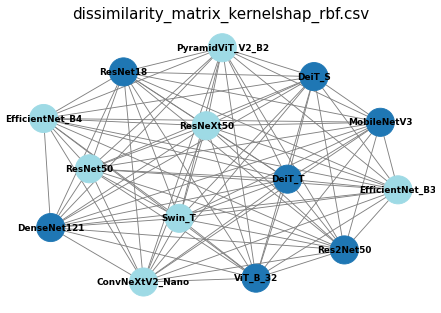

In [11]:
i_to_plot = 5
print(similarity_matriced_csvs[i_to_plot])
df = 1 - pd.read_csv("../20240620-gradcam-kernelshap-ig-128/" + similarity_matriced_csvs[i_to_plot], index_col=0)
np.fill_diagonal(df.values, 0)
G = nx.from_pandas_adjacency(df)
resolution = 1.075
communities = louvain_communities(G, resolution=resolution, seed=42)
plot_communities(communities, title=similarity_matriced_csvs[i_to_plot], dpi=64)

In [12]:
# communities = list(louvain_partitions(G, resolution=1, threshold=0.0000000001))
# for c in communities:
#     plot_communities(c, title="Louvain communities example")
# communities

In [13]:
explanation_name_mapping = {
    'integratedgradients': 'Integrated Gradients',
    'gradcam': 'GradCAM',
    'kernelshap': 'KernelSHAP',
}
similarity_name_mapping = {
    'cosine': 'Cosine similarity',
    'rbf': 'RBF similarity',
}

# for csv_name in similarity_matriced_csvs:
#     resolution = tweaked_csv_name_to_resolution_mapping[csv_name]
#     splitted = csv_name.split('_')
#     explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
#     title = f"Graph community detection, param={resolution}\n{explanation_name_mapping[explanation_method]}, {similarity_name_mapping[similarity_metric]}"
#     if "only_matching" in csv_name:
#         title += ", only matching predictions"
#         output_filename = f'graph_louvain_{explanation_method}_{similarity_metric}_only_matching.png'
#     else:
#         output_filename = f'graph_louvain_{explanation_method}_{similarity_metric}_all.png'


#     # loaded as dissimilarity, so we invert it to similarity by substracting it from 1
#     df = 1 - pd.read_csv(csv_name, index_col=0)
#     np.fill_diagonal(df.values, 0)
#     G = nx.from_pandas_adjacency(df)
#     communities = louvain_communities(G, resolution=resolution, seed=42)
#     plot_communities(communities, title=title, output_filename=output_filename)


# Hierarchical clustering

In [25]:
# loaded as dissimilarity, so we invert it to similarity by substracting it from 1
df = 1 - pd.read_csv("../20240620-gradcam-kernelshap-ig-128/" + similarity_matriced_csvs[0], index_col=0)
np.fill_diagonal(df.values, 1)
df

ConvNeXtV2_Nano    DeiT_S    DeiT_T  DenseNet121  \
ConvNeXtV2_Nano          1.000000  0.599930  0.568213     0.657019   
DeiT_S                   0.599930  1.000000  0.641363     0.681799   
DeiT_T                   0.568213  0.641363  1.000000     0.652122   
DenseNet121              0.657019  0.681799  0.652122     1.000000   
EfficientNet_B3          0.613485  0.647823  0.594399     0.825941   
EfficientNet_B4          0.619359  0.676879  0.645951     0.853042   
MobileNetV3              0.683292  0.696507  0.649050     0.824697   
PyramidViT_V2_B2         0.583949  0.636272  0.588126     0.843718   
Res2Net50                0.620026  0.663196  0.620469     0.918121   
ResNet18                 0.687006  0.679909  0.659140     0.868204   
ResNet50                 0.646588  0.676049  0.638804     0.856513   
ResNeXt50                0.551193  0.578016  0.539890     0.704172   
Swin_T                   0.630803  0.682245  0.630213     0.825378   
ViT_B_32                 0.426295  0.461861  0.413369     0.506774   

                  EfficientNet_B3  EfficientNet_B4  MobileNetV3  \
ConvNeXtV2_Nano          0.613485         0.619359     0.683292   
DeiT_S                   0.647823         0.676879     0.696507   
DeiT_T                   0.594399         0.645951     0.649050   
DenseNet121              0.825941         0.853042     0.824697   
EfficientNet_B3          1.000000         0.808741     0.791642   
EfficientNet_B4          0.808741         1.000000     0.793231   
MobileNetV3              0.791642         0.793231     1.000000   
PyramidViT_V2_B2         0.749762         0.812017     0.748199   
Res2Net50                0.836769         0.827458     0.810787   
ResNet18                 0.829367         0.842020     0.829311   
ResNet50                 0.840662         0.841749     0.838342   
ResNeXt50                0.737263         0.716915     0.693716   
Swin_T                   0.791190         0.820006     0.784606   
ViT_B_32                 0.492843         0.510442     0.507983   

                  PyramidViT_V2_B2  Res2Net50  ResNet18  ResNet50  ResNeXt50  \
ConvNeXtV2_Nano           0.583949   0.620026  0.687006  0.646588   0.551193   
DeiT_S                    0.636272   0.663196  0.679909  0.676049   0.578016   
DeiT_T                    0.588126   0.620469  0.659140  0.638804   0.539890   
DenseNet121               0.843718   0.918121  0.868204  0.856513   0.704172   
EfficientNet_B3           0.749762   0.836769  0.829367  0.840662   0.737263   
EfficientNet_B4           0.812017   0.827458  0.842020  0.841749   0.716915   
MobileNetV3               0.748199   0.810787  0.829311  0.838342   0.693716   
PyramidViT_V2_B2          1.000000   0.814430  0.757032  0.764426   0.658376   
Res2Net50                 0.814430   1.000000  0.830429  0.846412   0.715947   
ResNet18                  0.757032   0.830429  1.000000  0.870691   0.712357   
ResNet50                  0.764426   0.846412  0.870691  1.000000   0.738824   
ResNeXt50                 0.658376   0.715947  0.712357  0.738824   1.000000   
Swin_T                    0.791315   0.790748  0.821271  0.852434   0.702055   
ViT_B_32                  0.489674   0.496535  0.504220  0.496004   0.436989   

                    Swin_T  ViT_B_32  
ConvNeXtV2_Nano   0.630803  0.426295  
DeiT_S            0.682245  0.461861  
DeiT_T            0.630213  0.413369  
DenseNet121       0.825378  0.506774  
EfficientNet_B3   0.791190  0.492843  
EfficientNet_B4   0.820006  0.510442  
MobileNetV3       0.784606  0.507983  
PyramidViT_V2_B2  0.791315  0.489674  
Res2Net50         0.790748  0.496535  
ResNet18          0.821271  0.504220  
ResNet50          0.852434  0.496004  
ResNeXt50         0.702055  0.436989  
Swin_T            1.000000  0.503520  
ViT_B_32          0.503520  1.000000

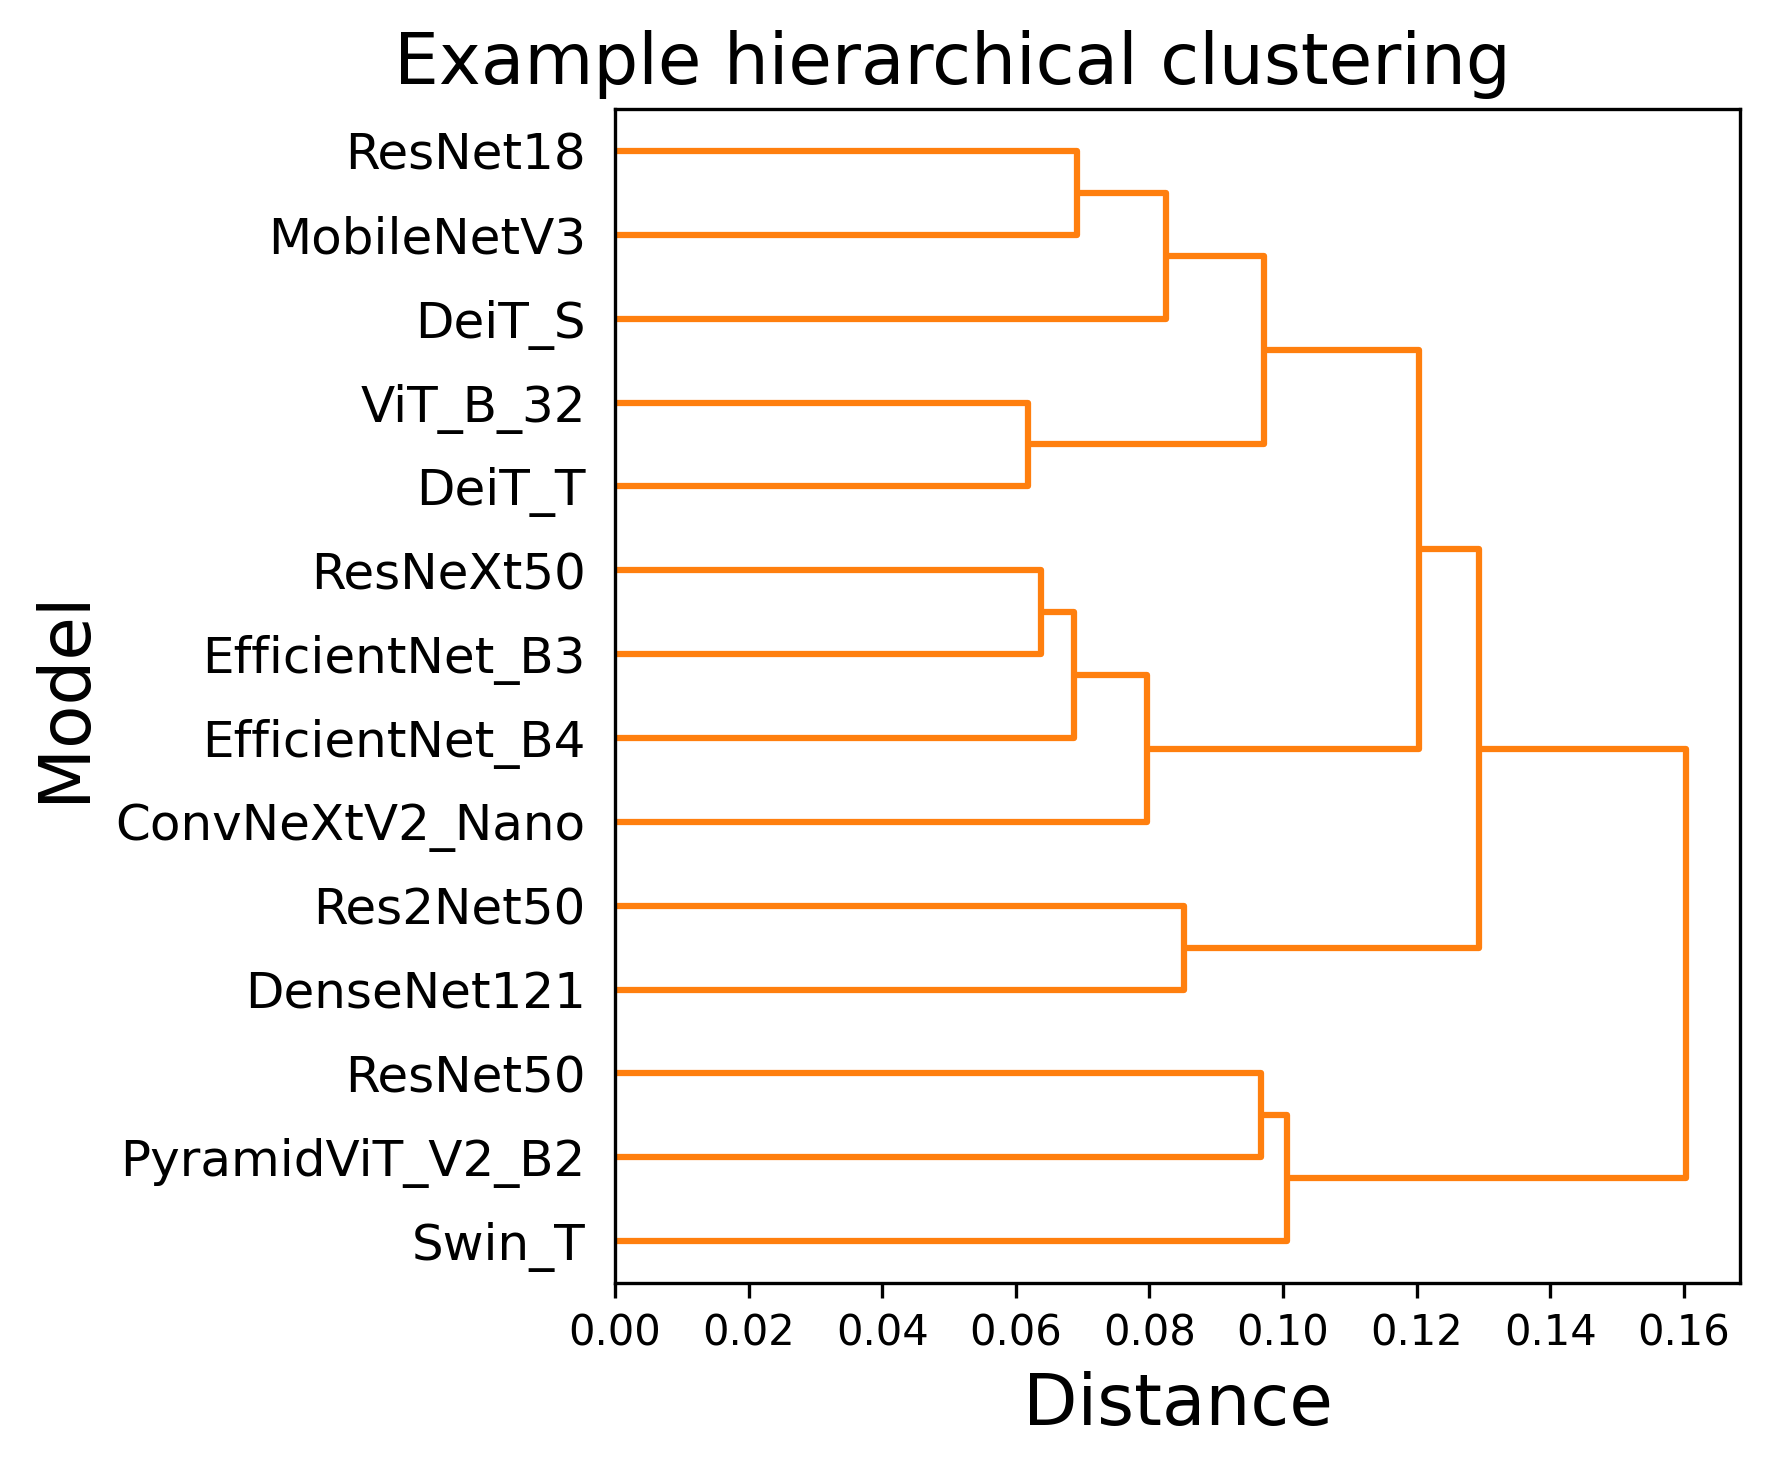

cluster
ConvNeXtV2_Nano         0
DeiT_S                  0
DeiT_T                  0
EfficientNet_B3         0
EfficientNet_B4         0
MobileNetV3             0
ResNet18                0
ResNeXt50               0
ViT_B_32                0
DenseNet121             1
Res2Net50               1
PyramidViT_V2_B2        2
ResNet50                2
Swin_T                  2

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

def hierarchical_clustering(df, title, output_filename=None, color_threshold=1.04, method='complete'):
    similarity_matrix = df.values
    # convert similarity to distance again
    distance_matrix = 1 - similarity_matrix
    # set diagonal to 0
    condensed_dist_matrix = squareform(distance_matrix)
    Z = linkage(condensed_dist_matrix, method=method)
    plt.figure(figsize=(6, 5), dpi=300)
    dendrogram(Z, labels=df.index, orientation='right', color_threshold=color_threshold) # threshold here matches 3 clusters
    plt.title(title, fontsize=17, x=0.3)
    # move title to be centered not above the plot but a bit to the left
    plt.ylabel('Model', fontsize=17)
    plt.xlabel('Distance', fontsize=17)
    plt.tight_layout()
    if output_filename:
        plt.savefig(output_filename)
    plt.show()
    
    # clusters
    clusters = cut_tree(Z, n_clusters=3)
    clusters_df = pd.DataFrame(clusters, index=df.index, columns=['cluster'])
    clusters_df = clusters_df.sort_values(by='cluster')
    
    return Z, clusters_df

Z, clusters = hierarchical_clustering(df, title="Example hierarchical clustering", method='complete')
clusters


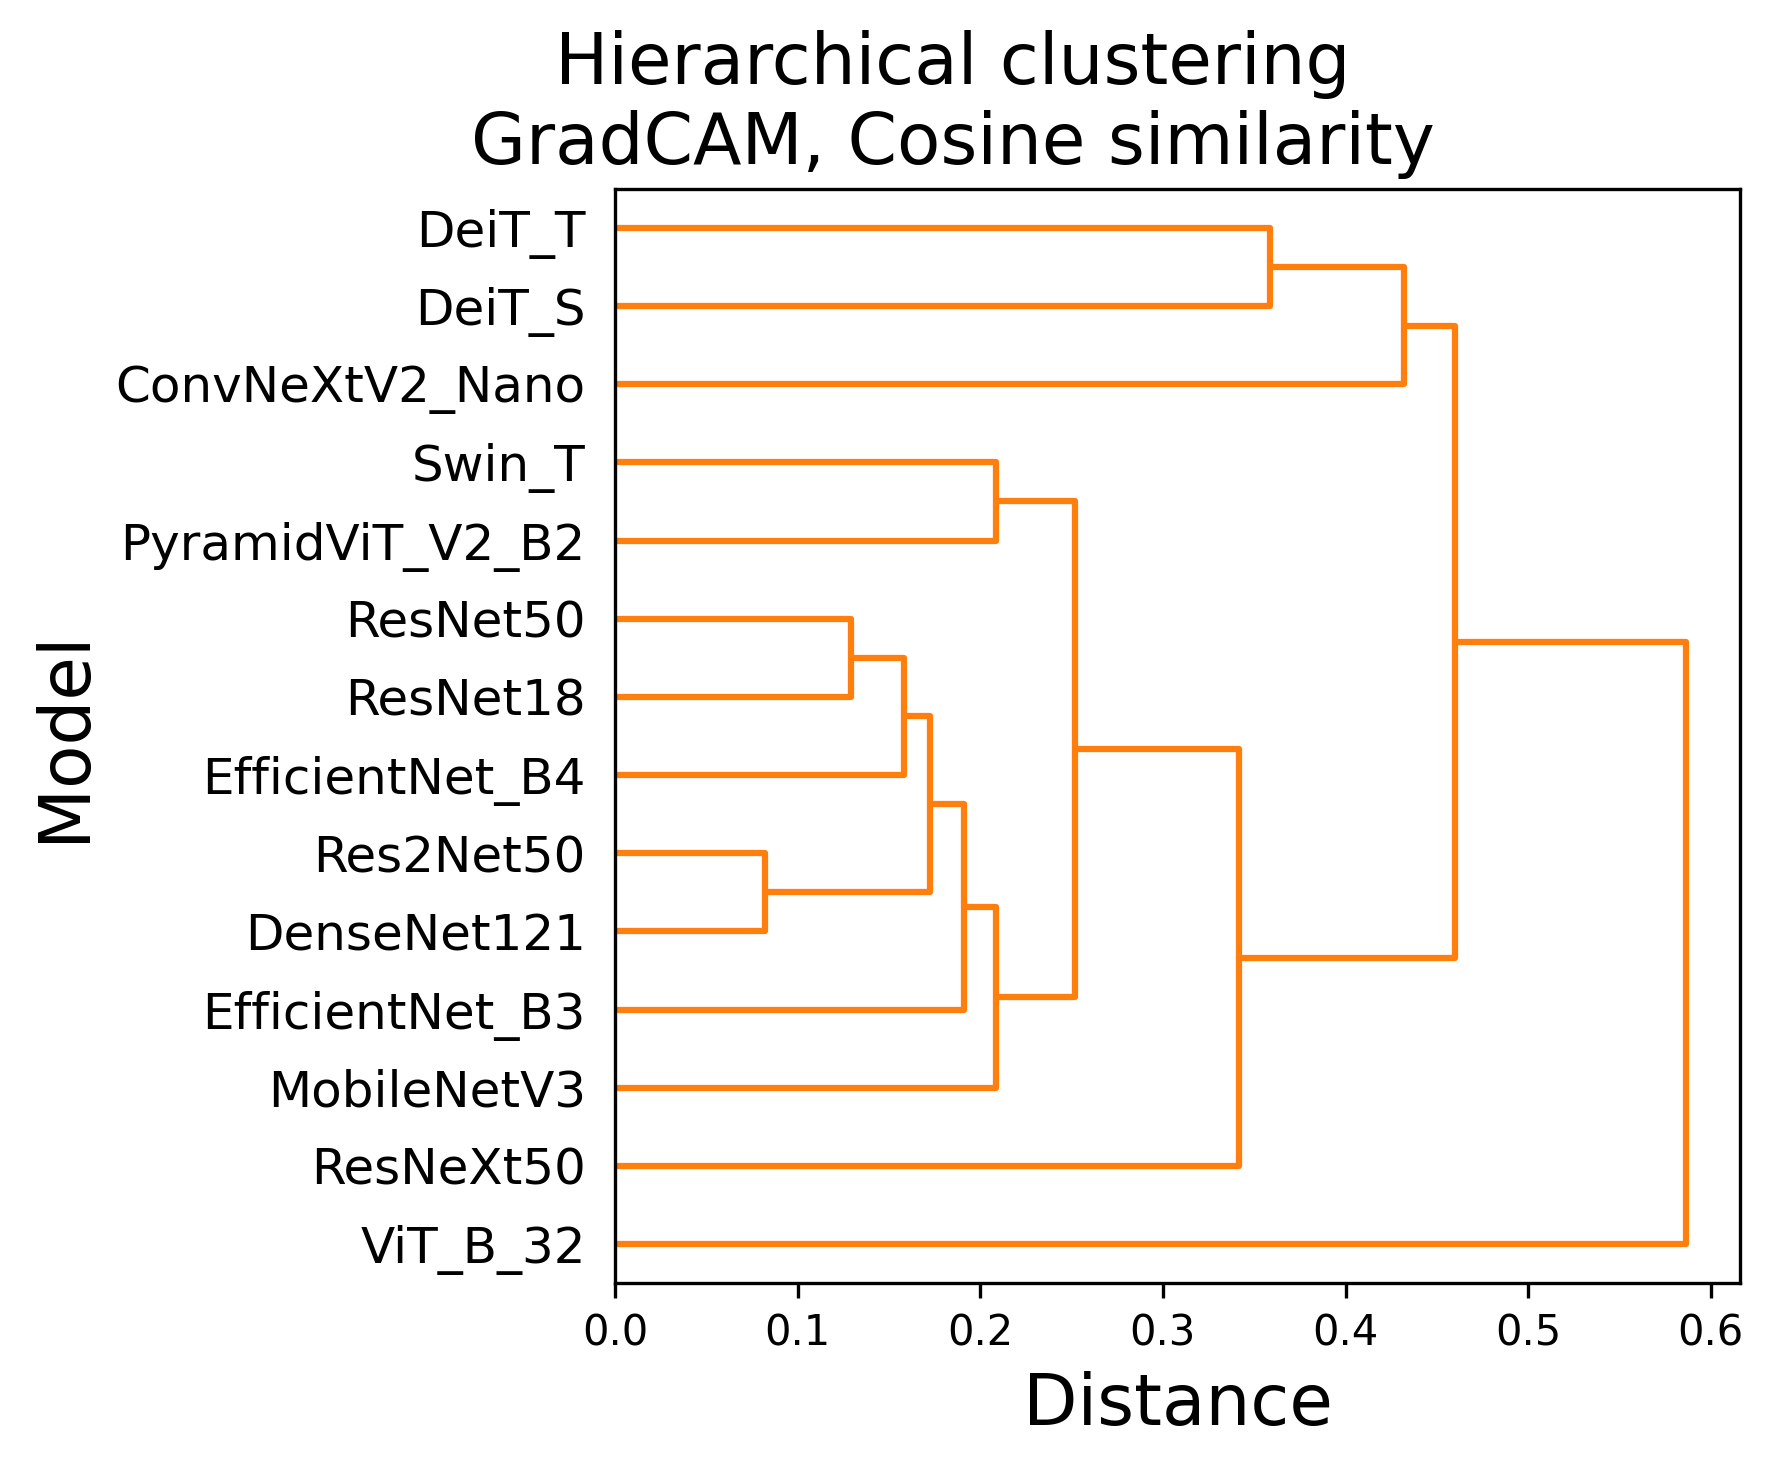

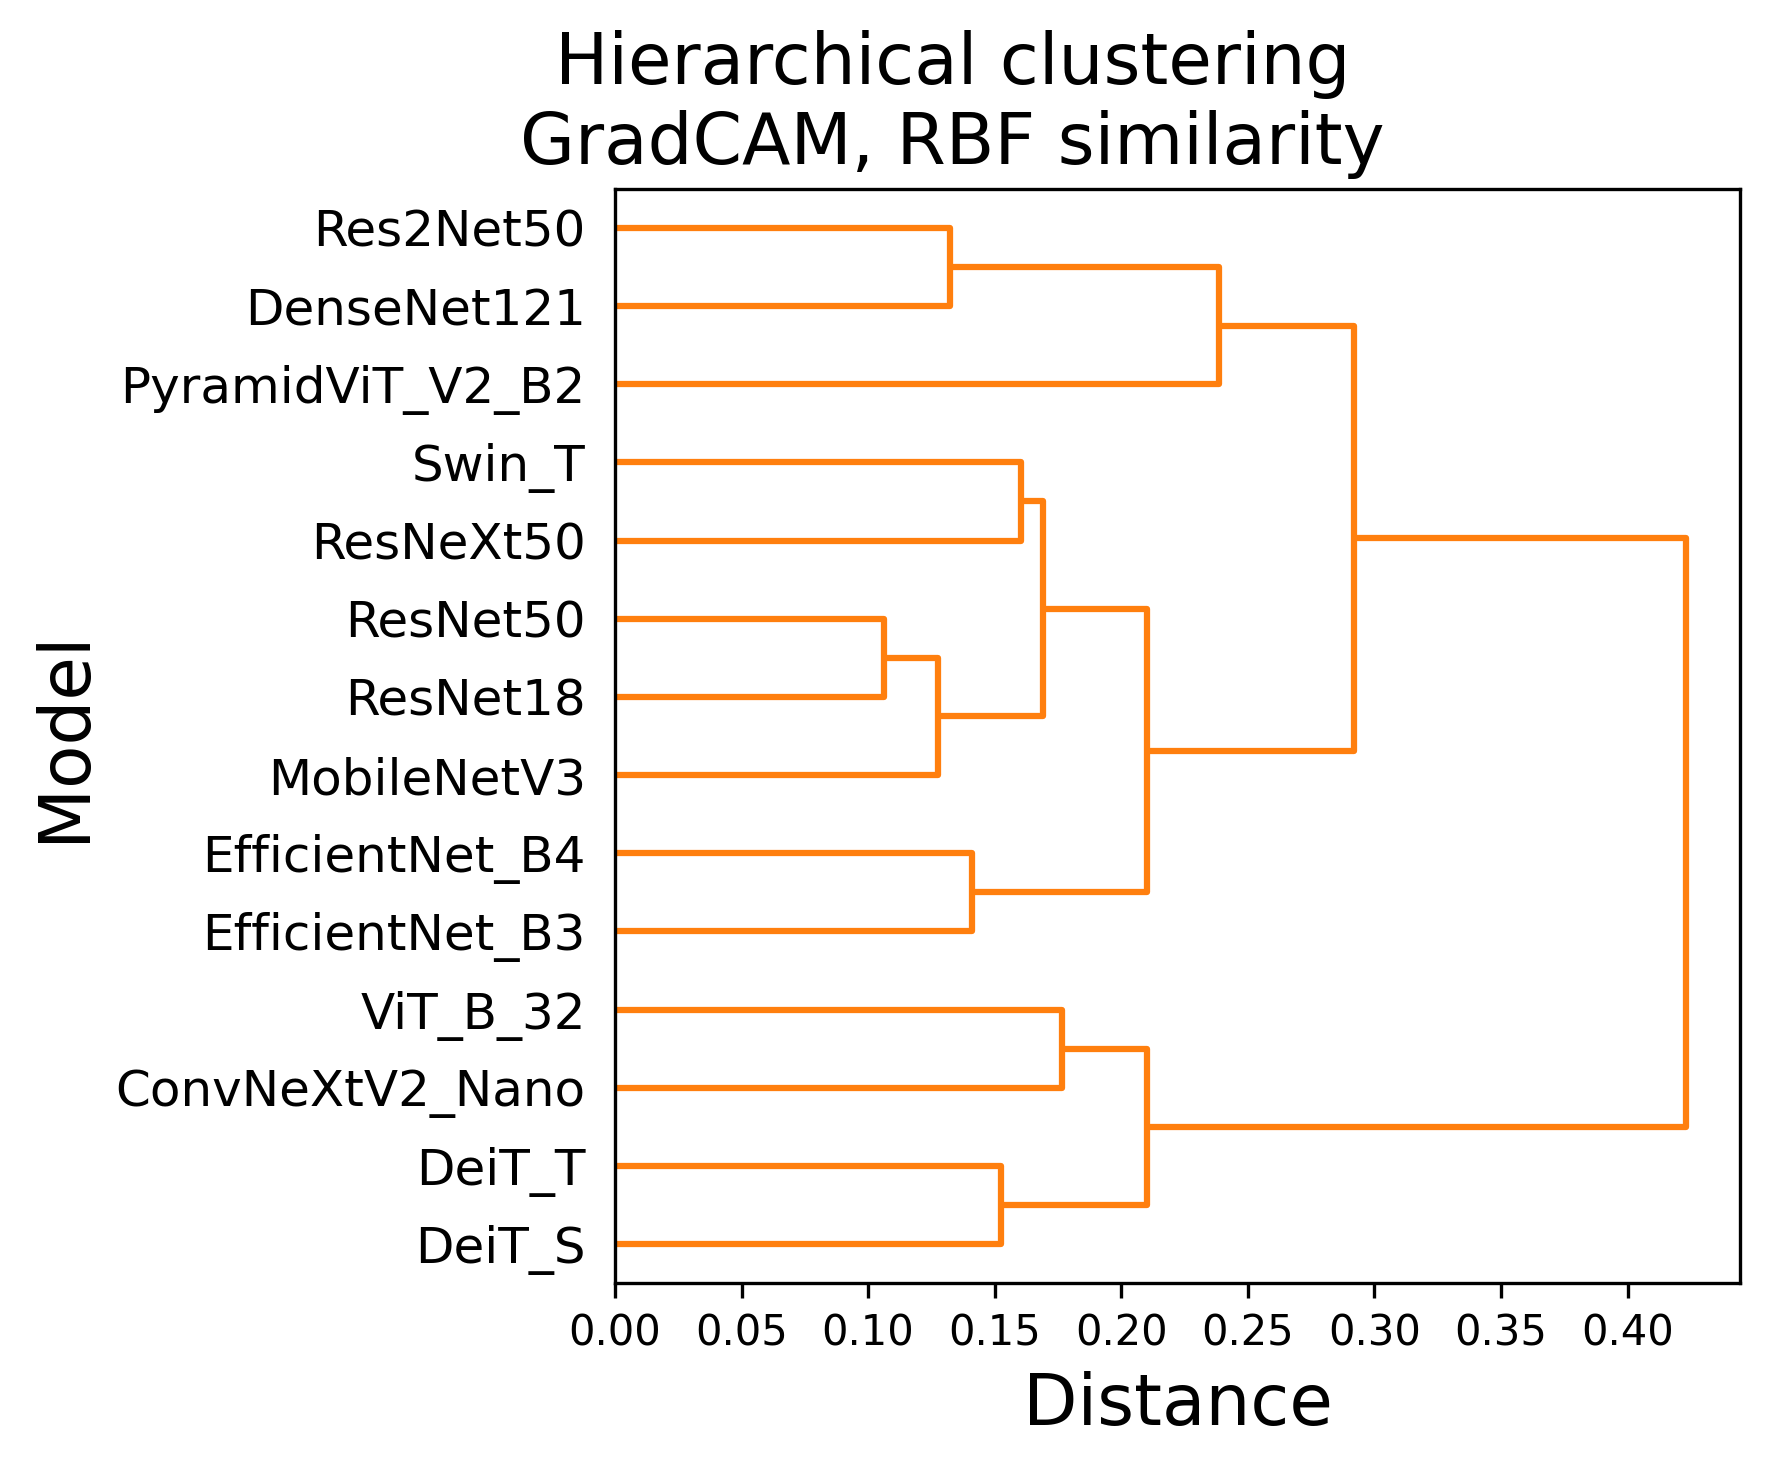

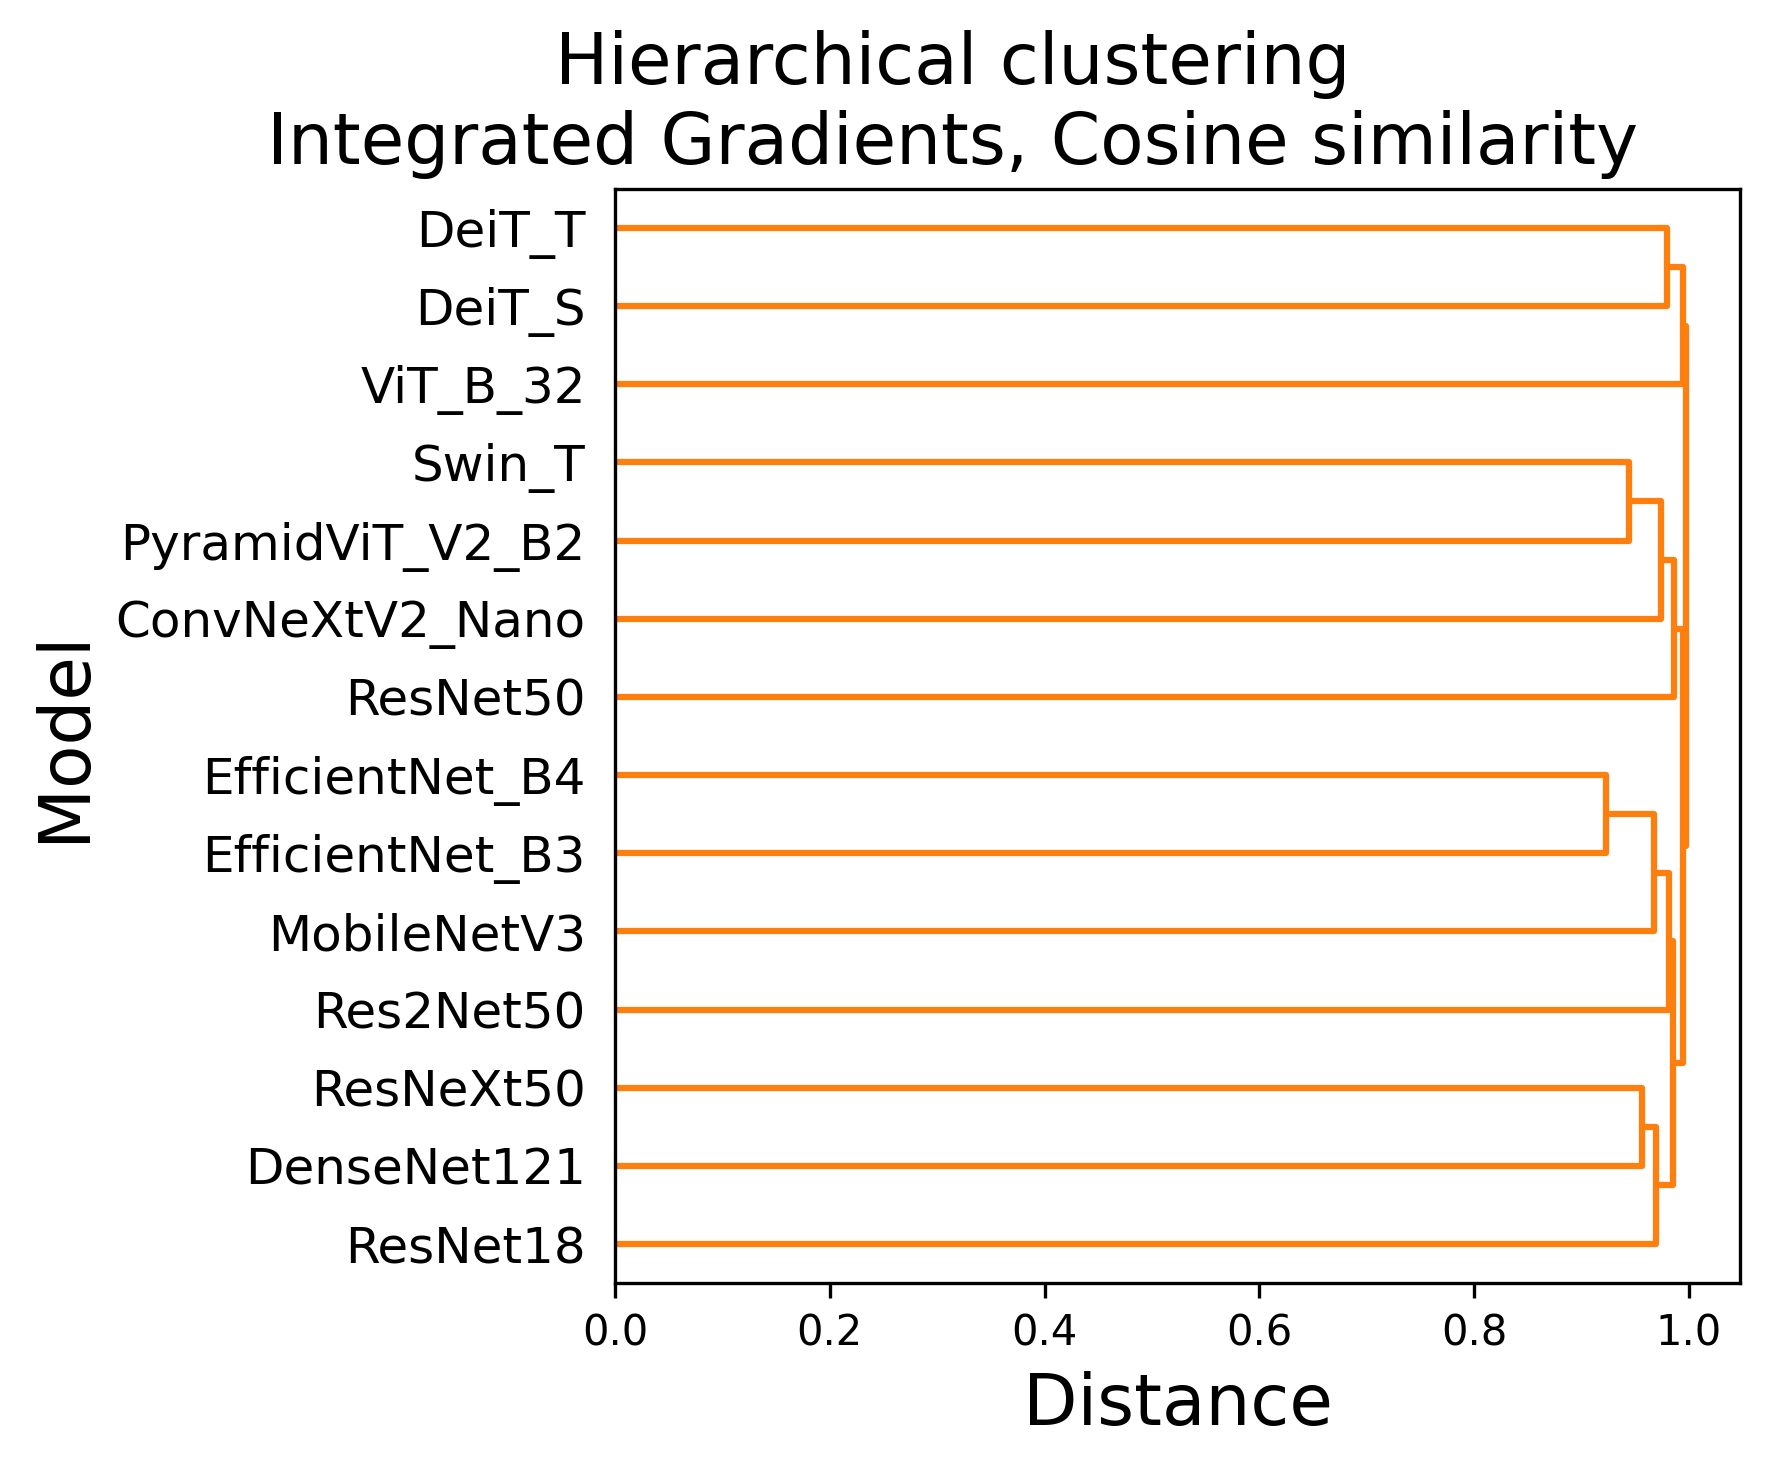

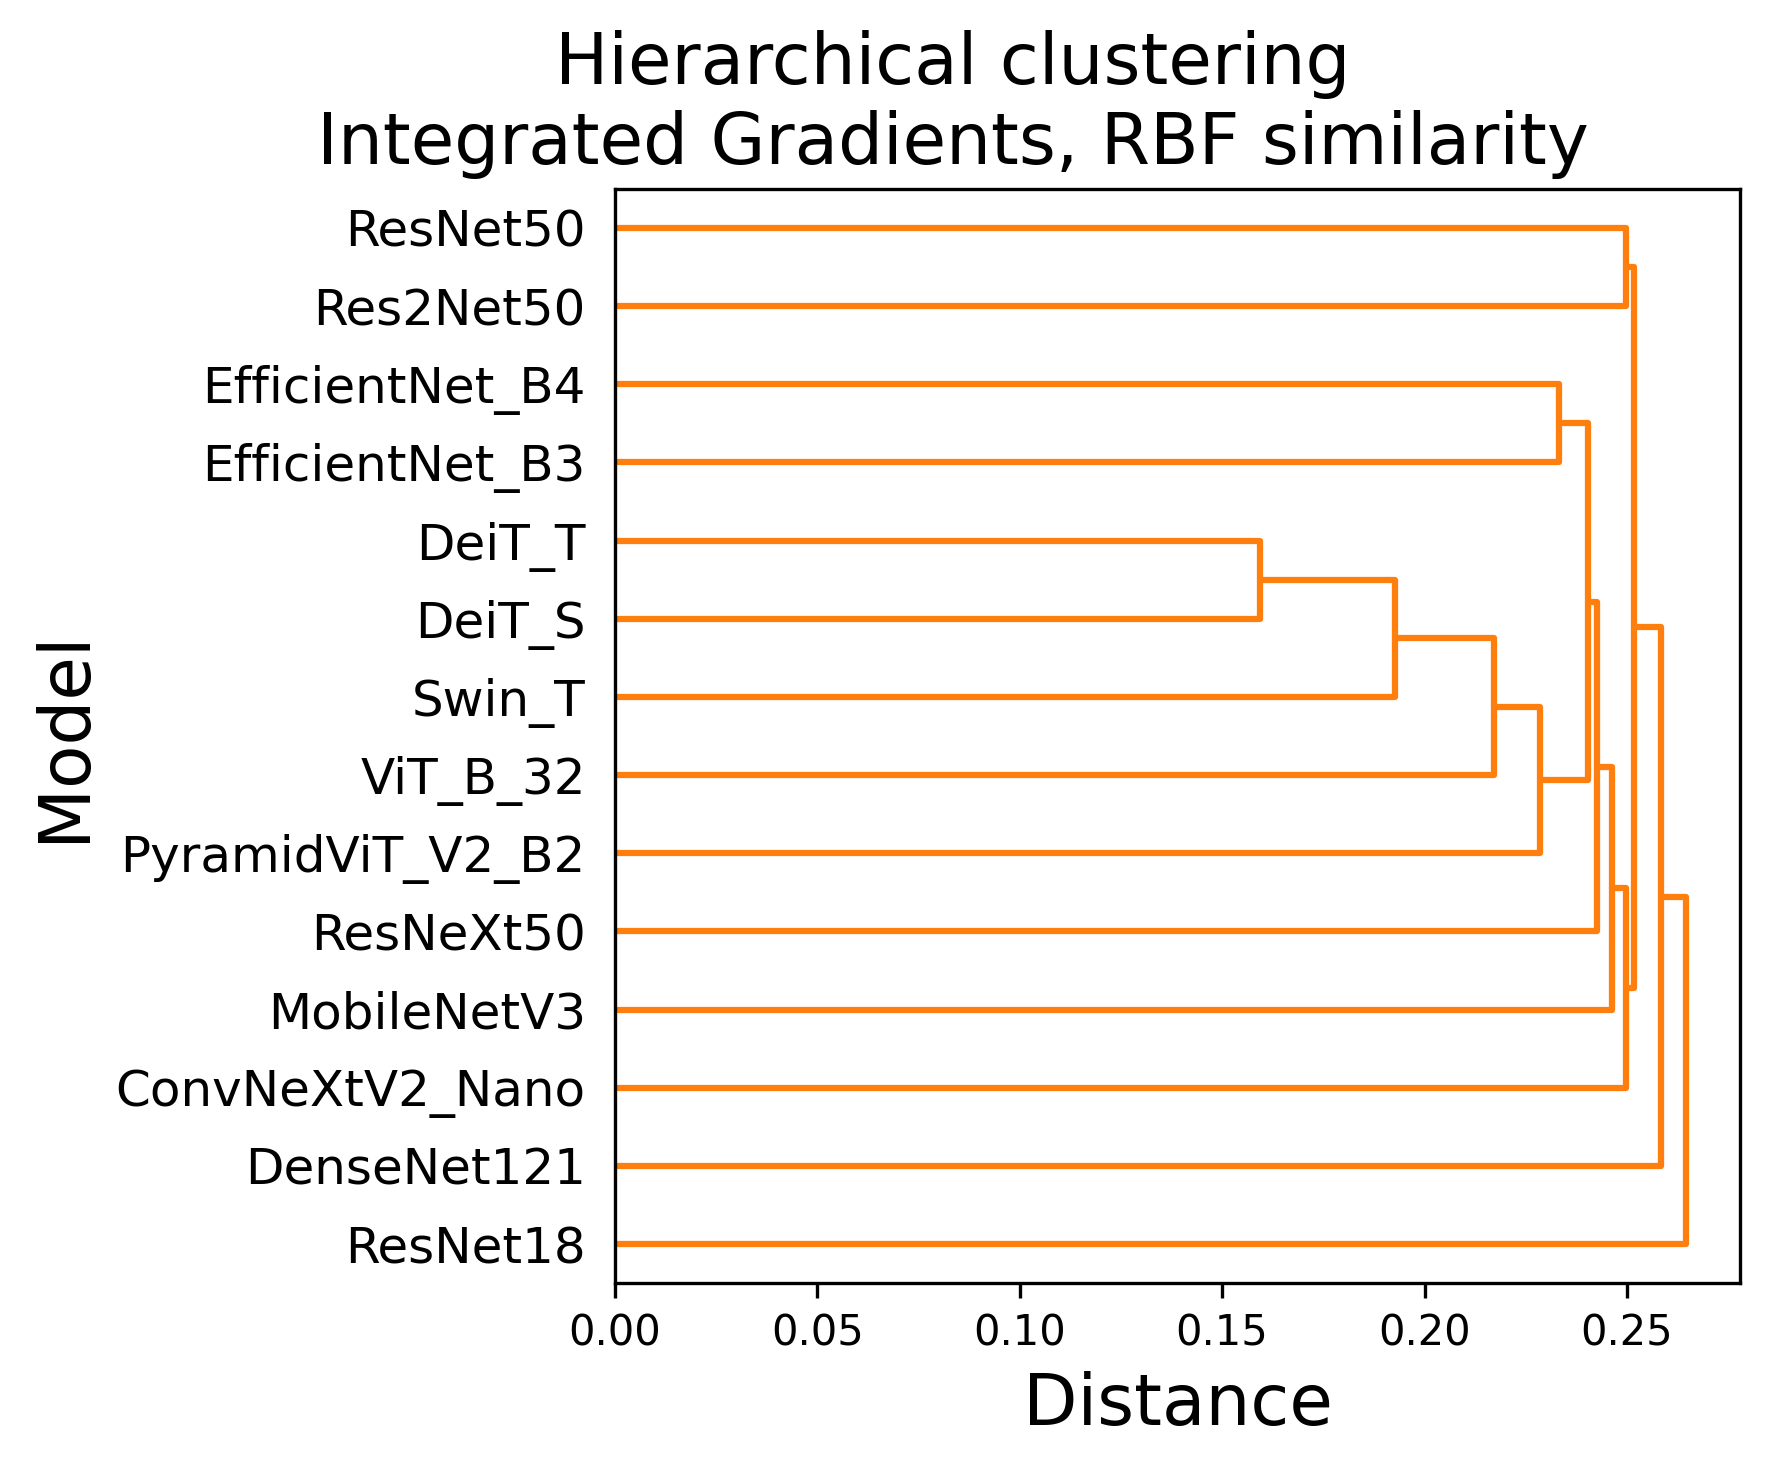

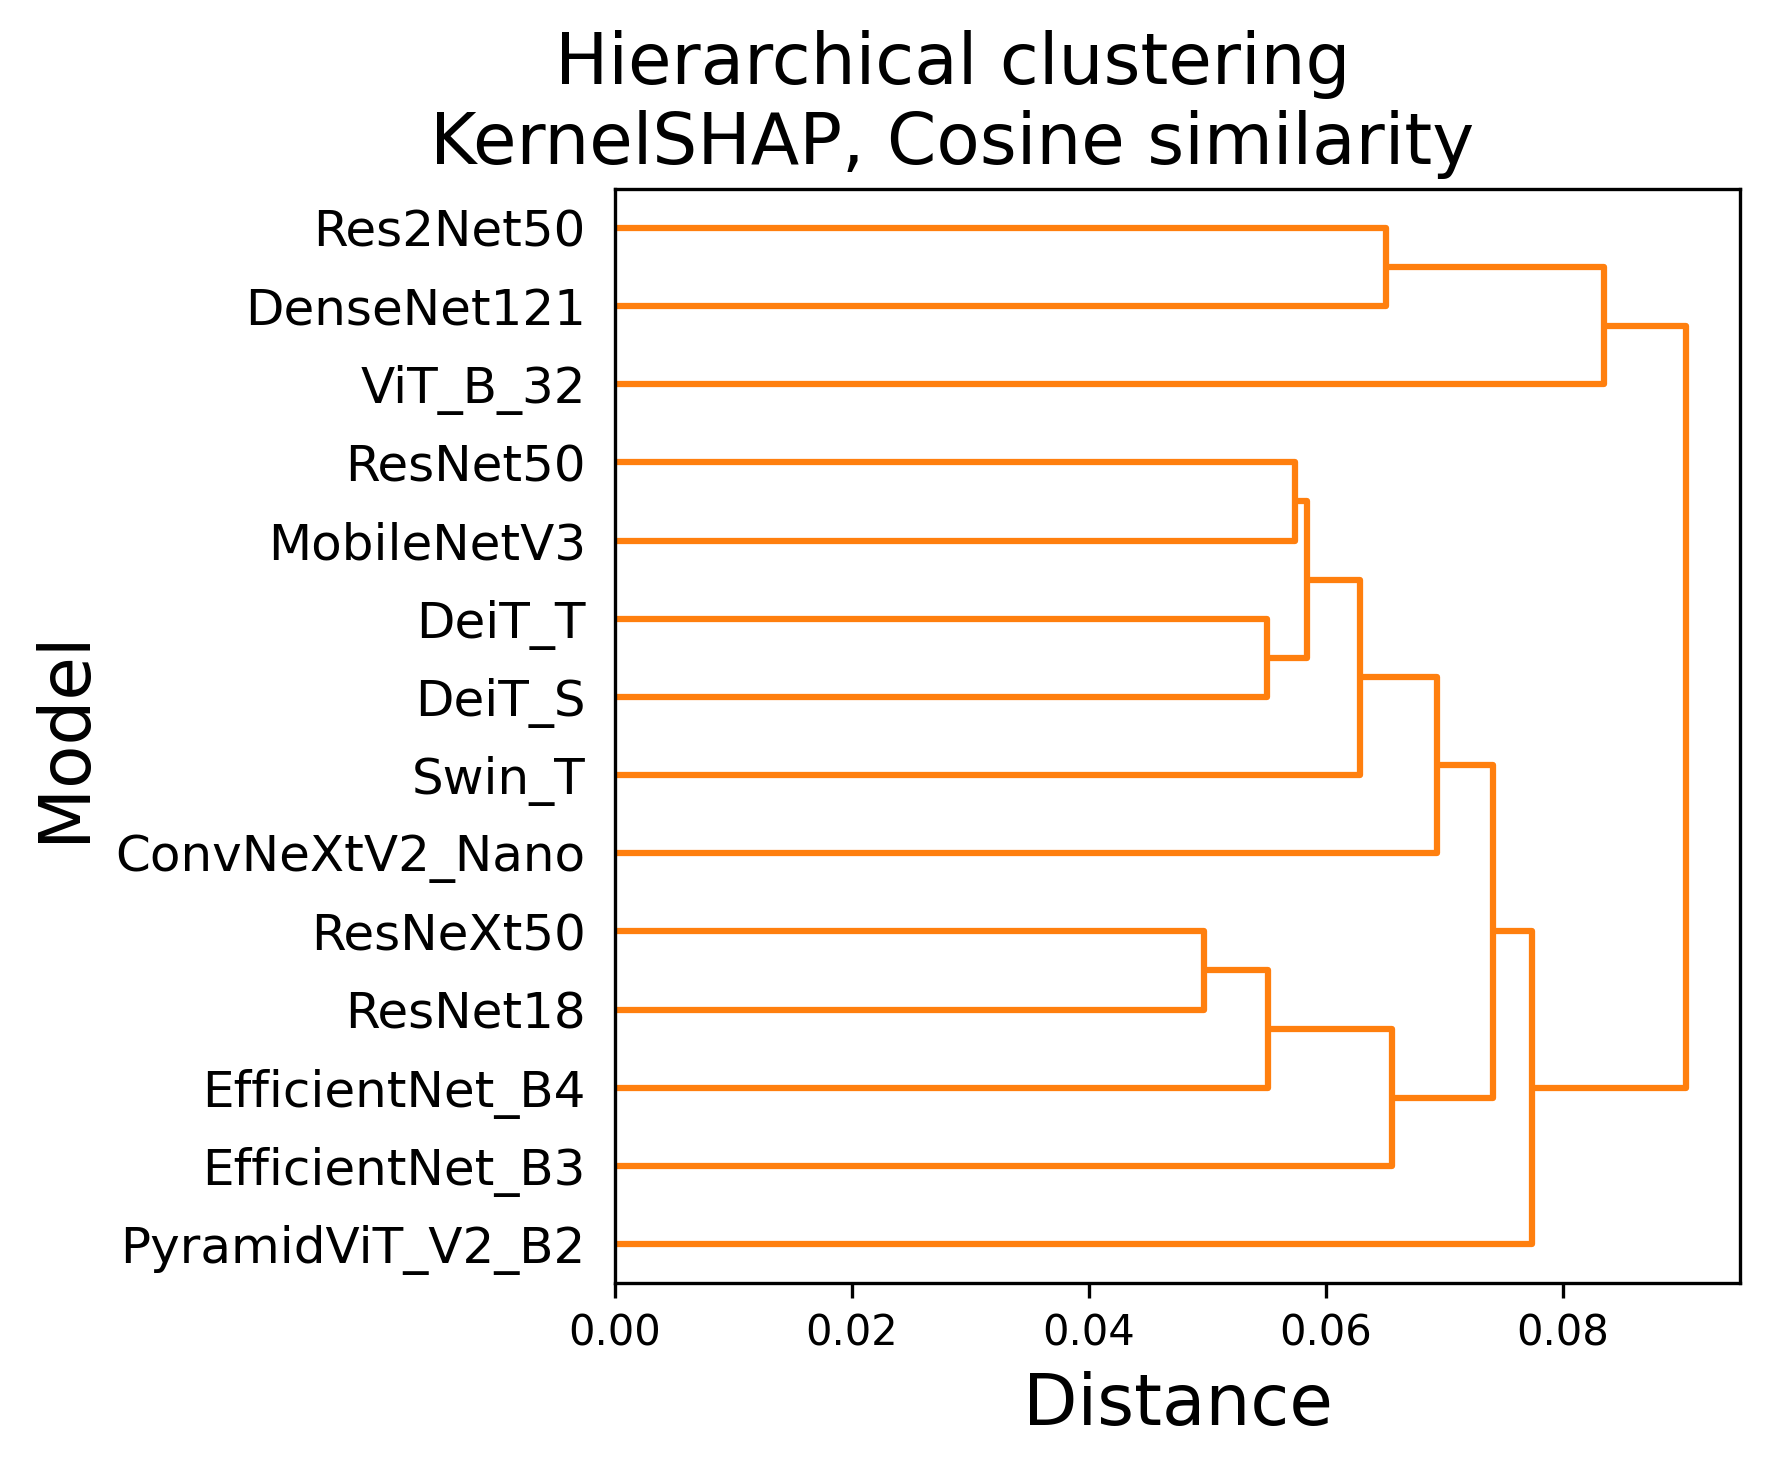

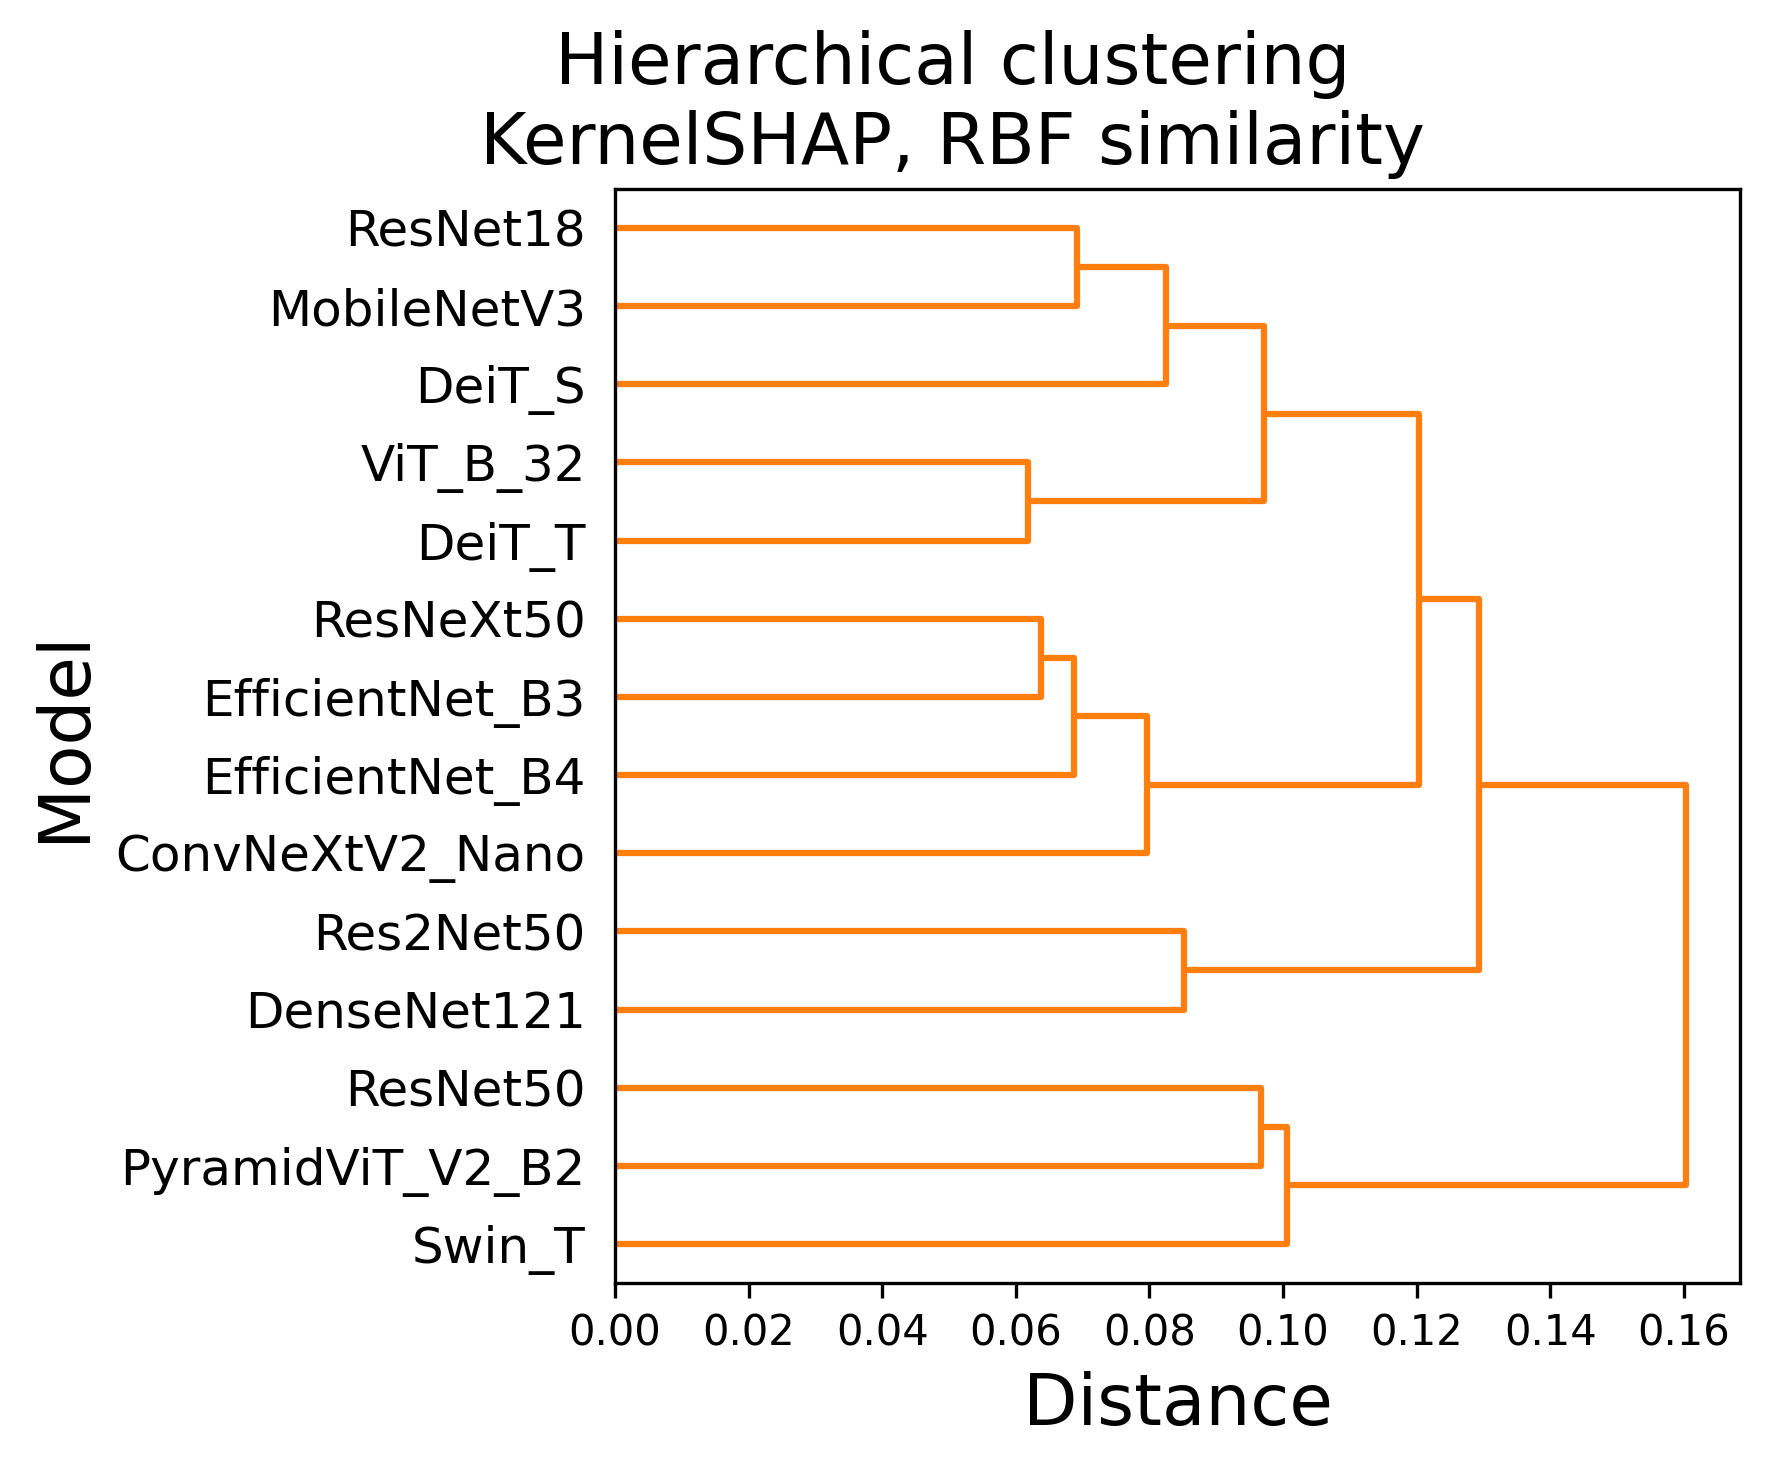

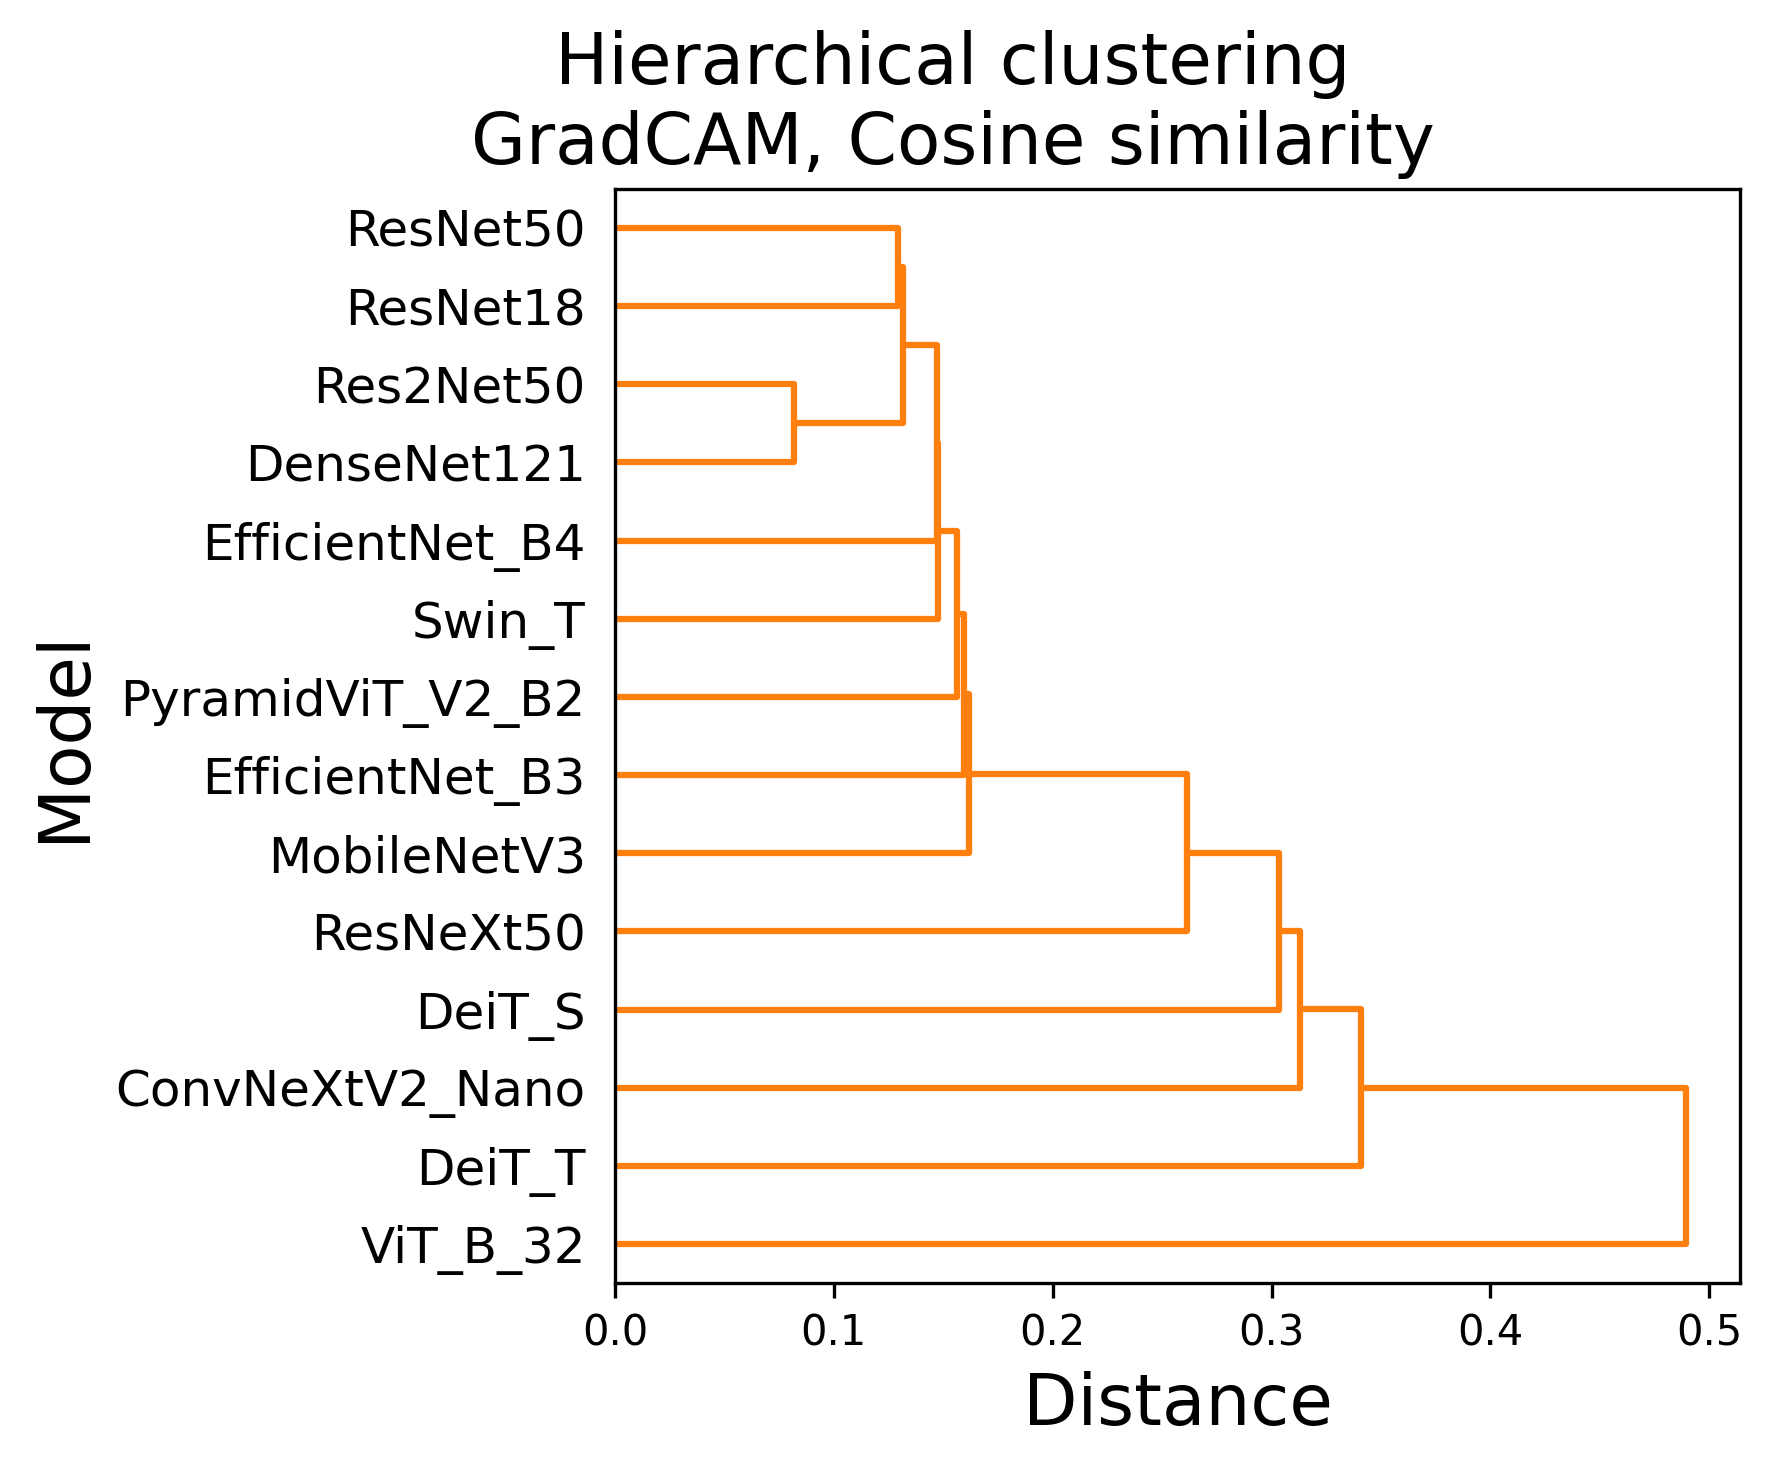

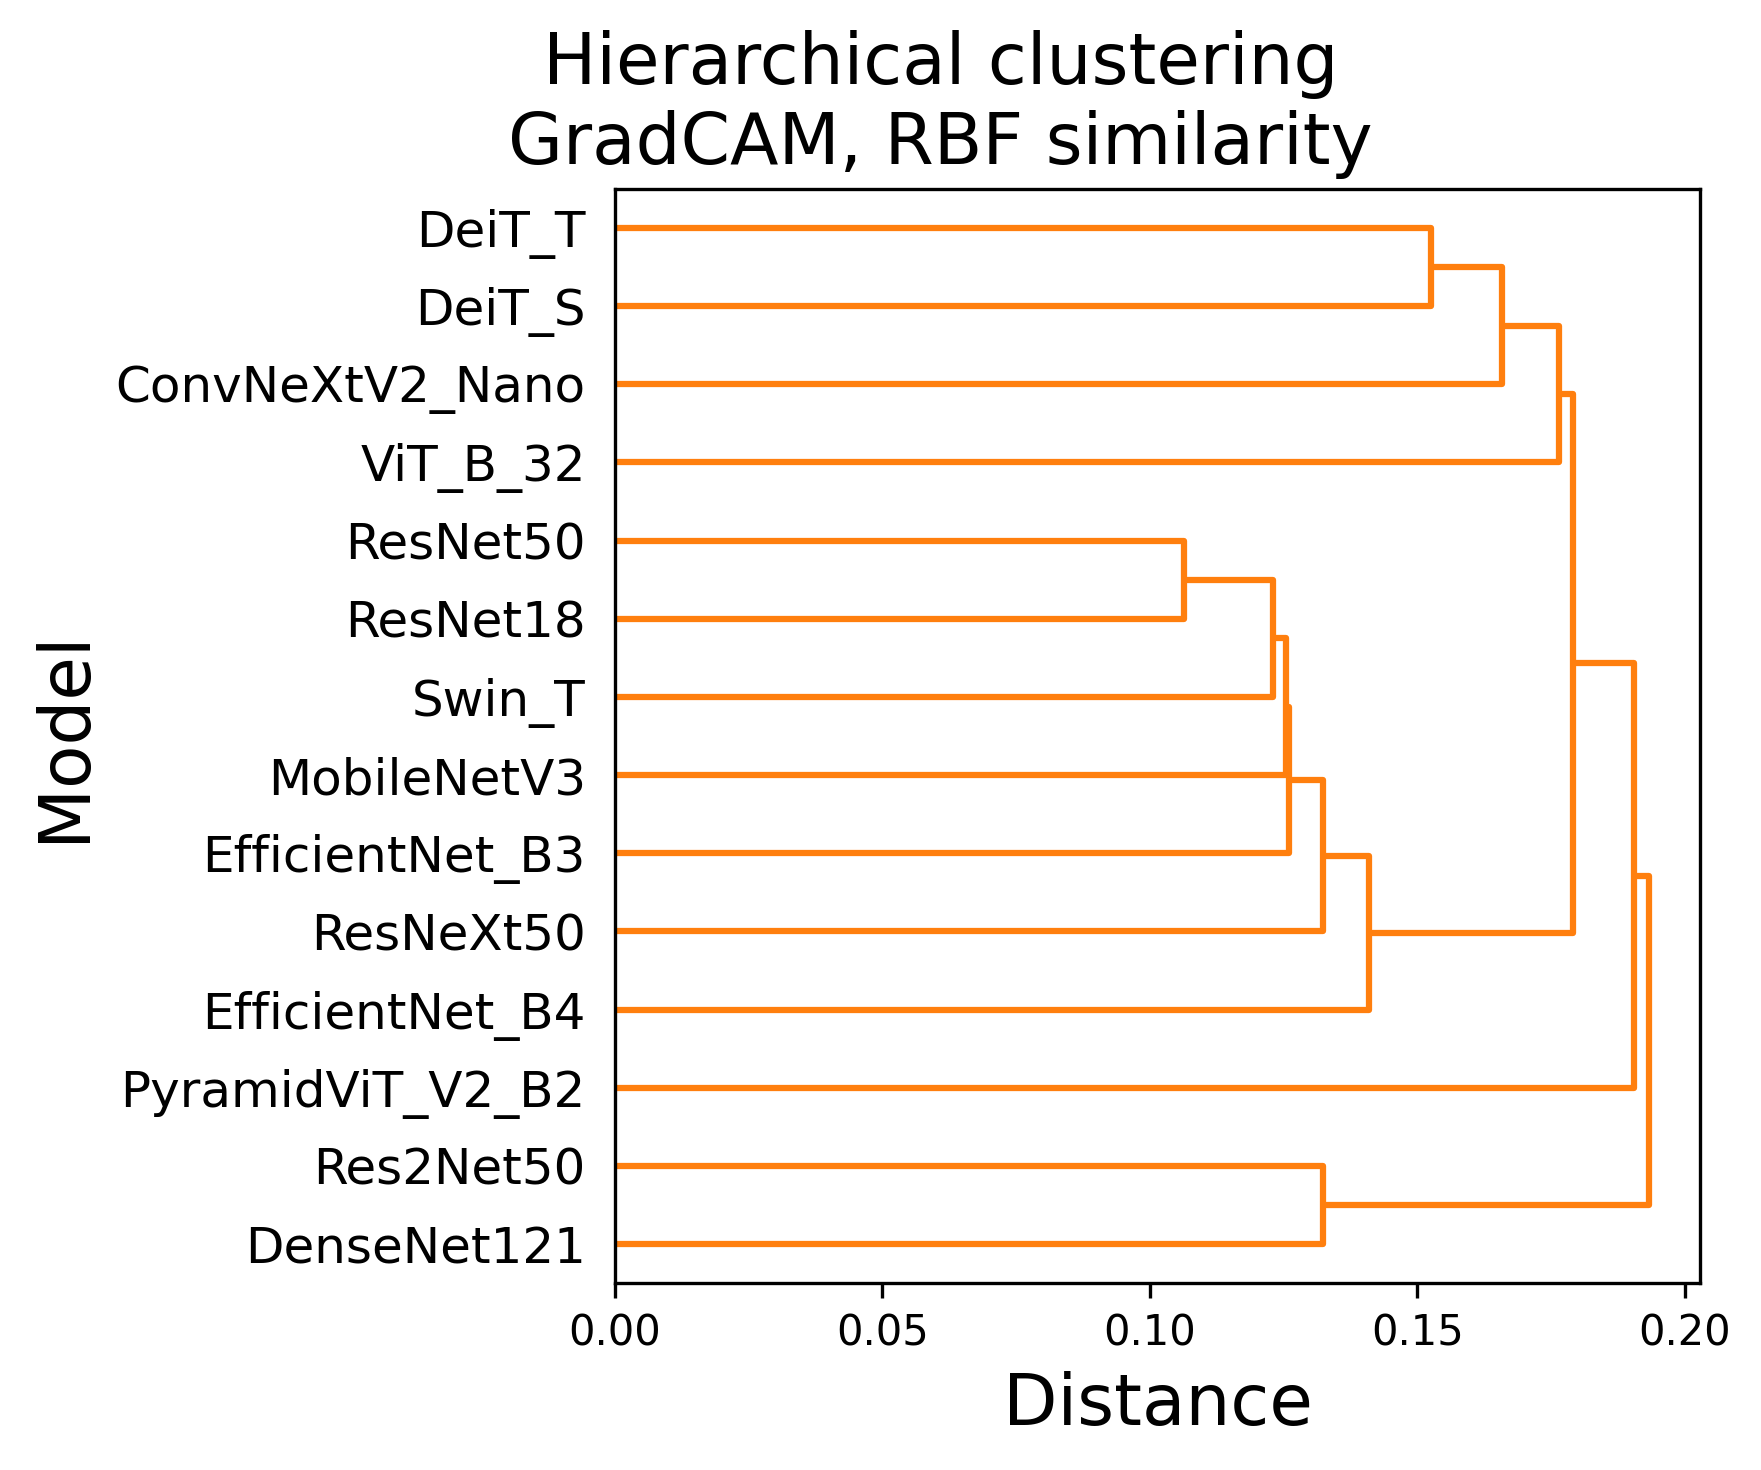

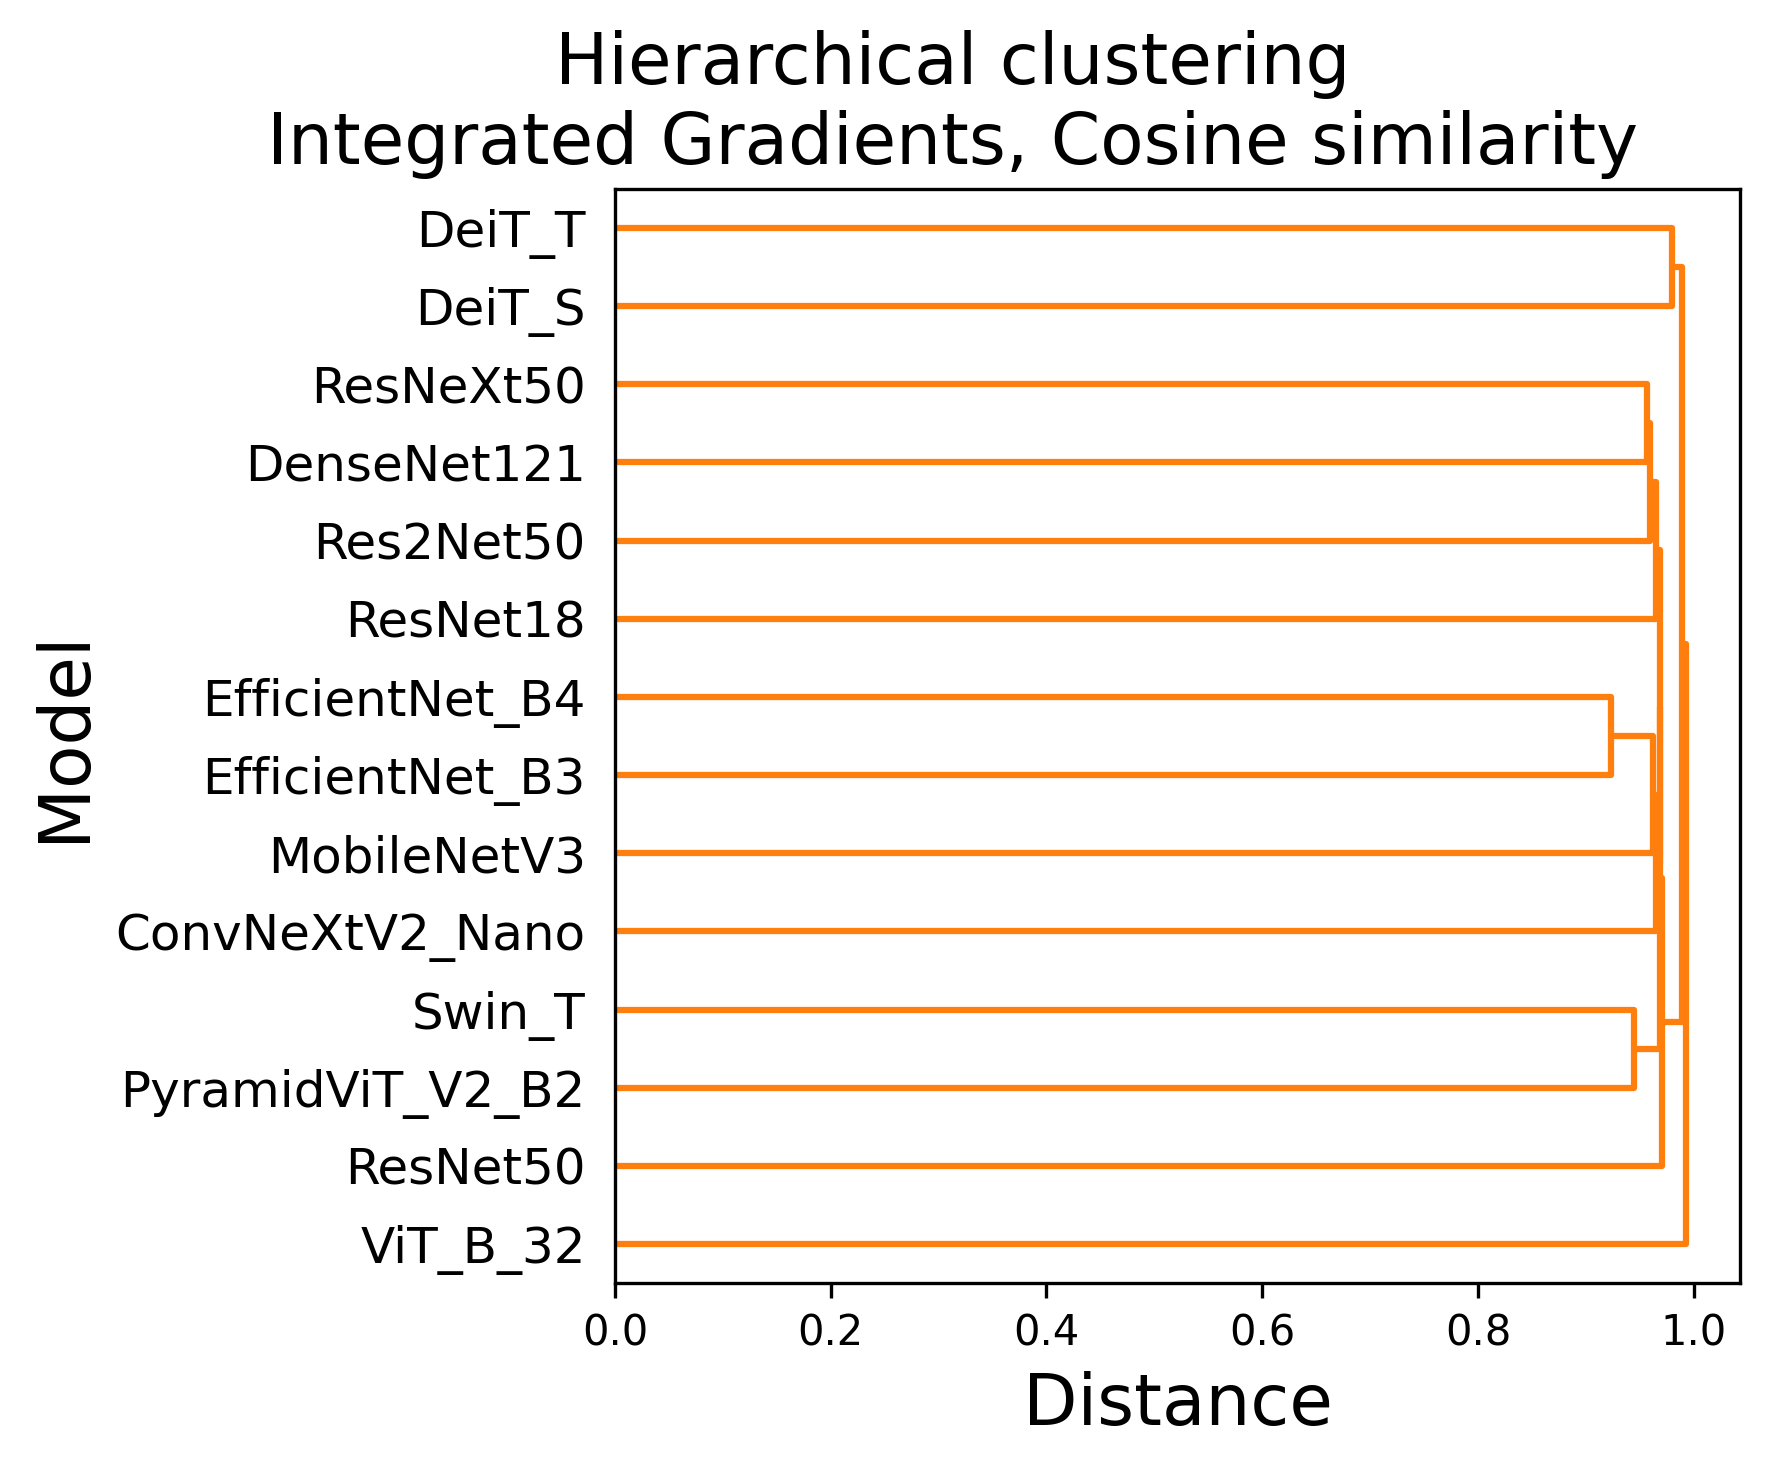

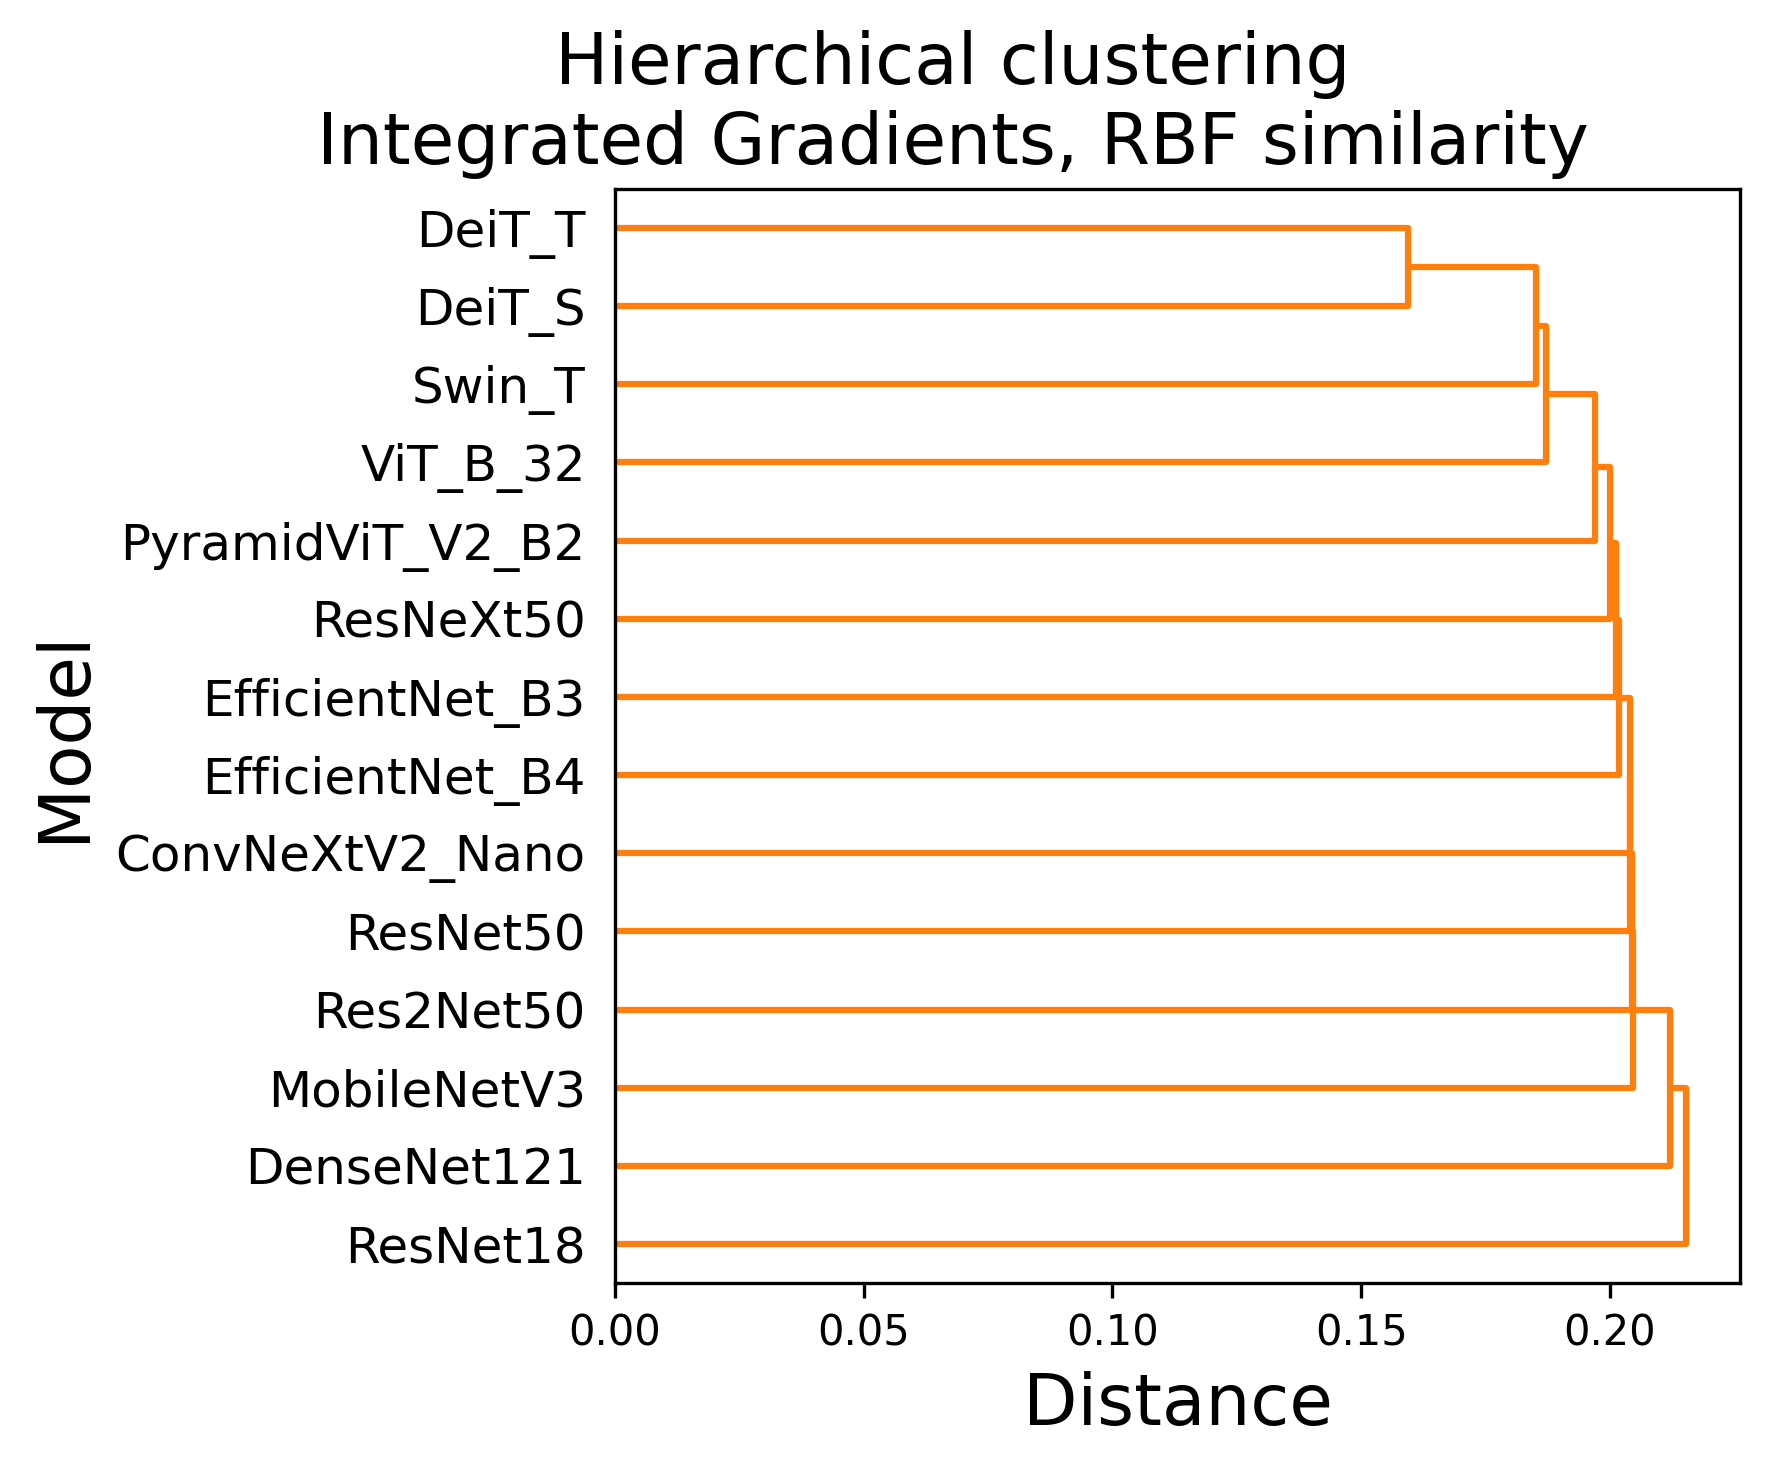

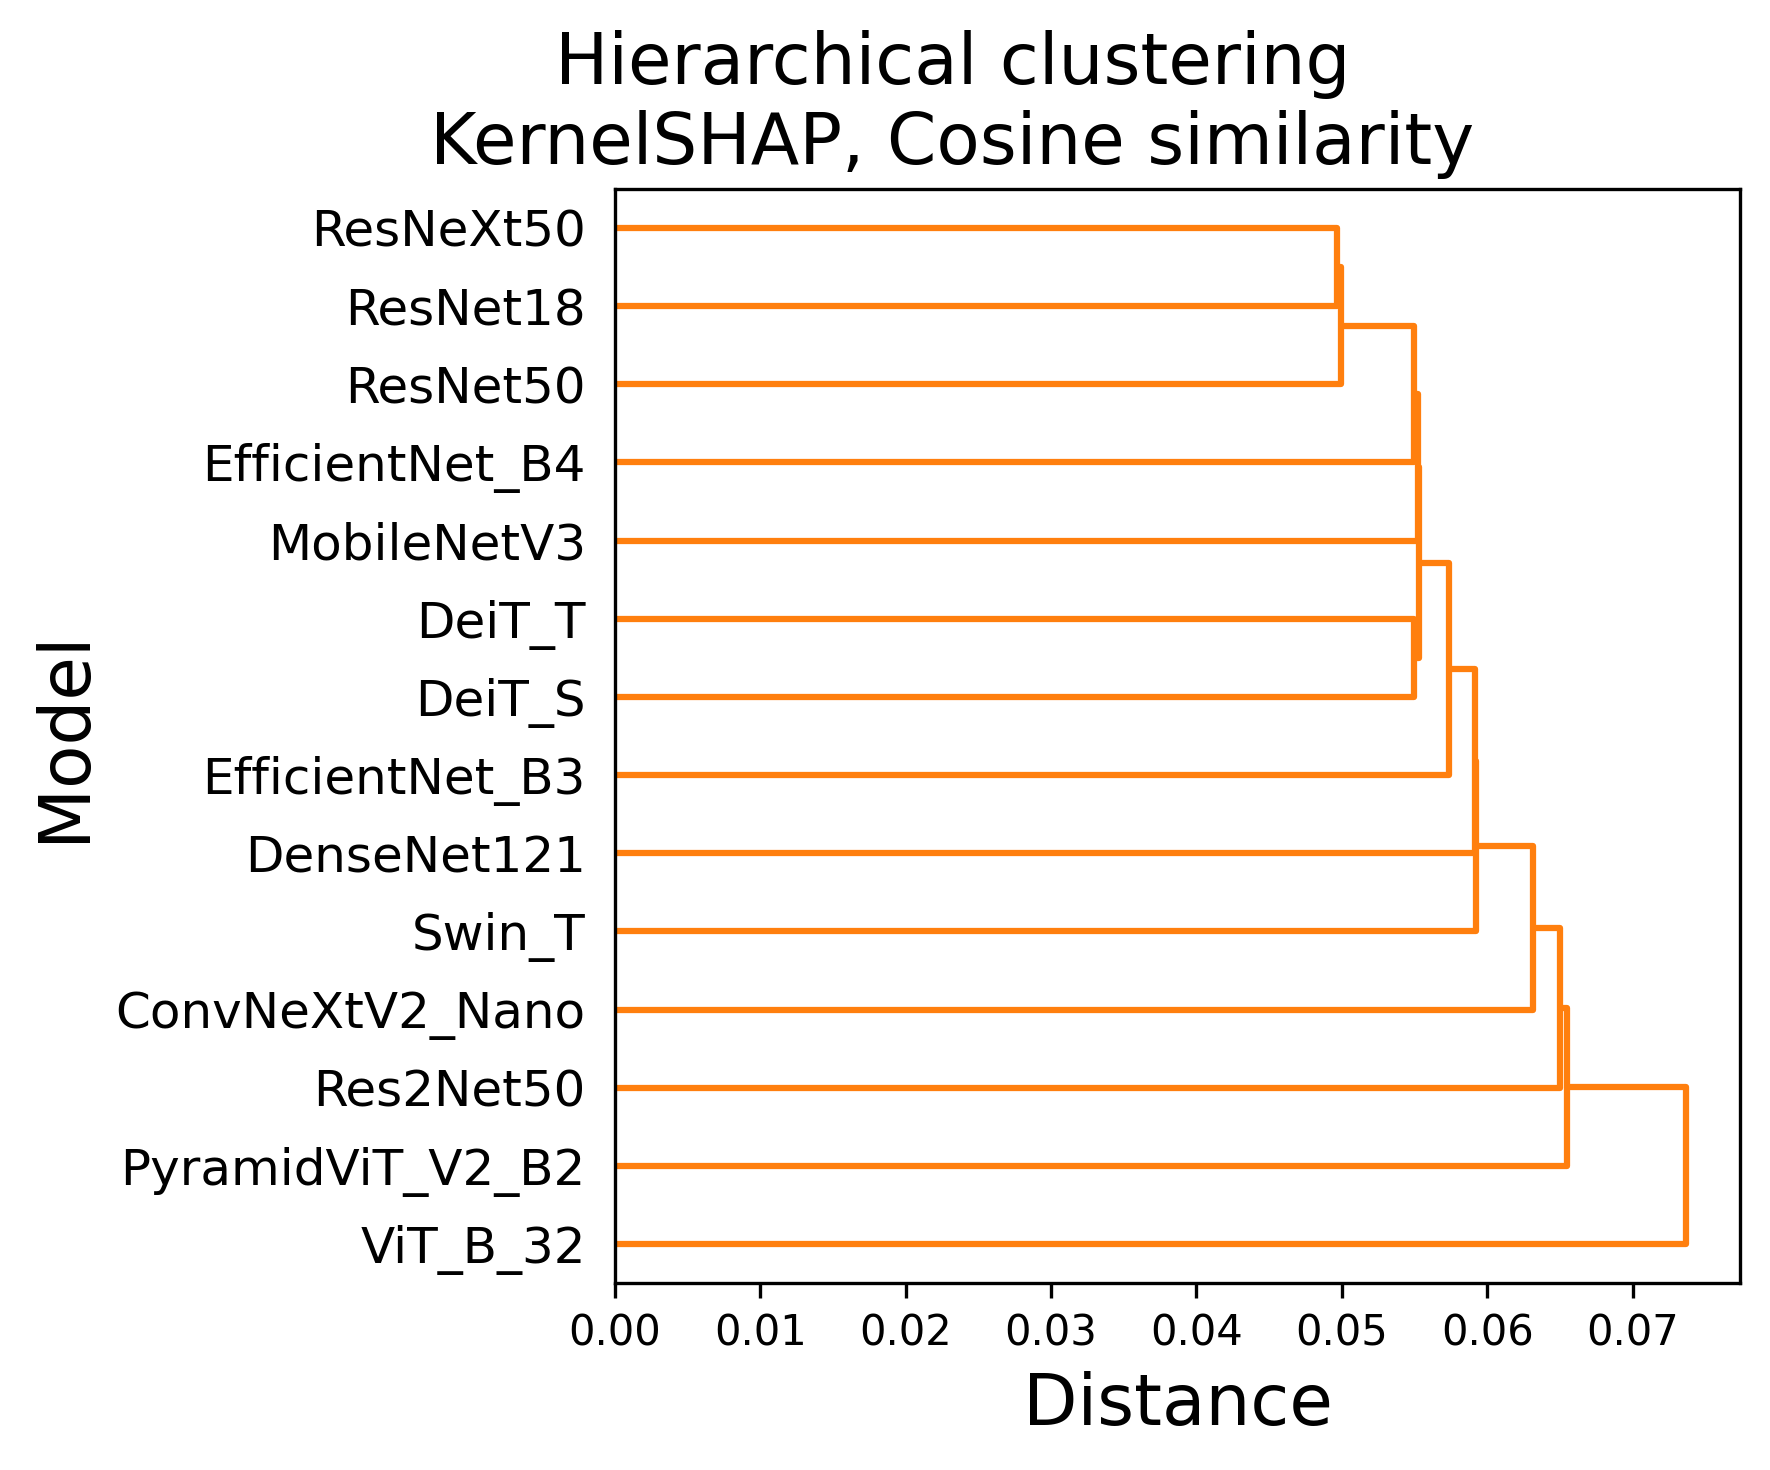

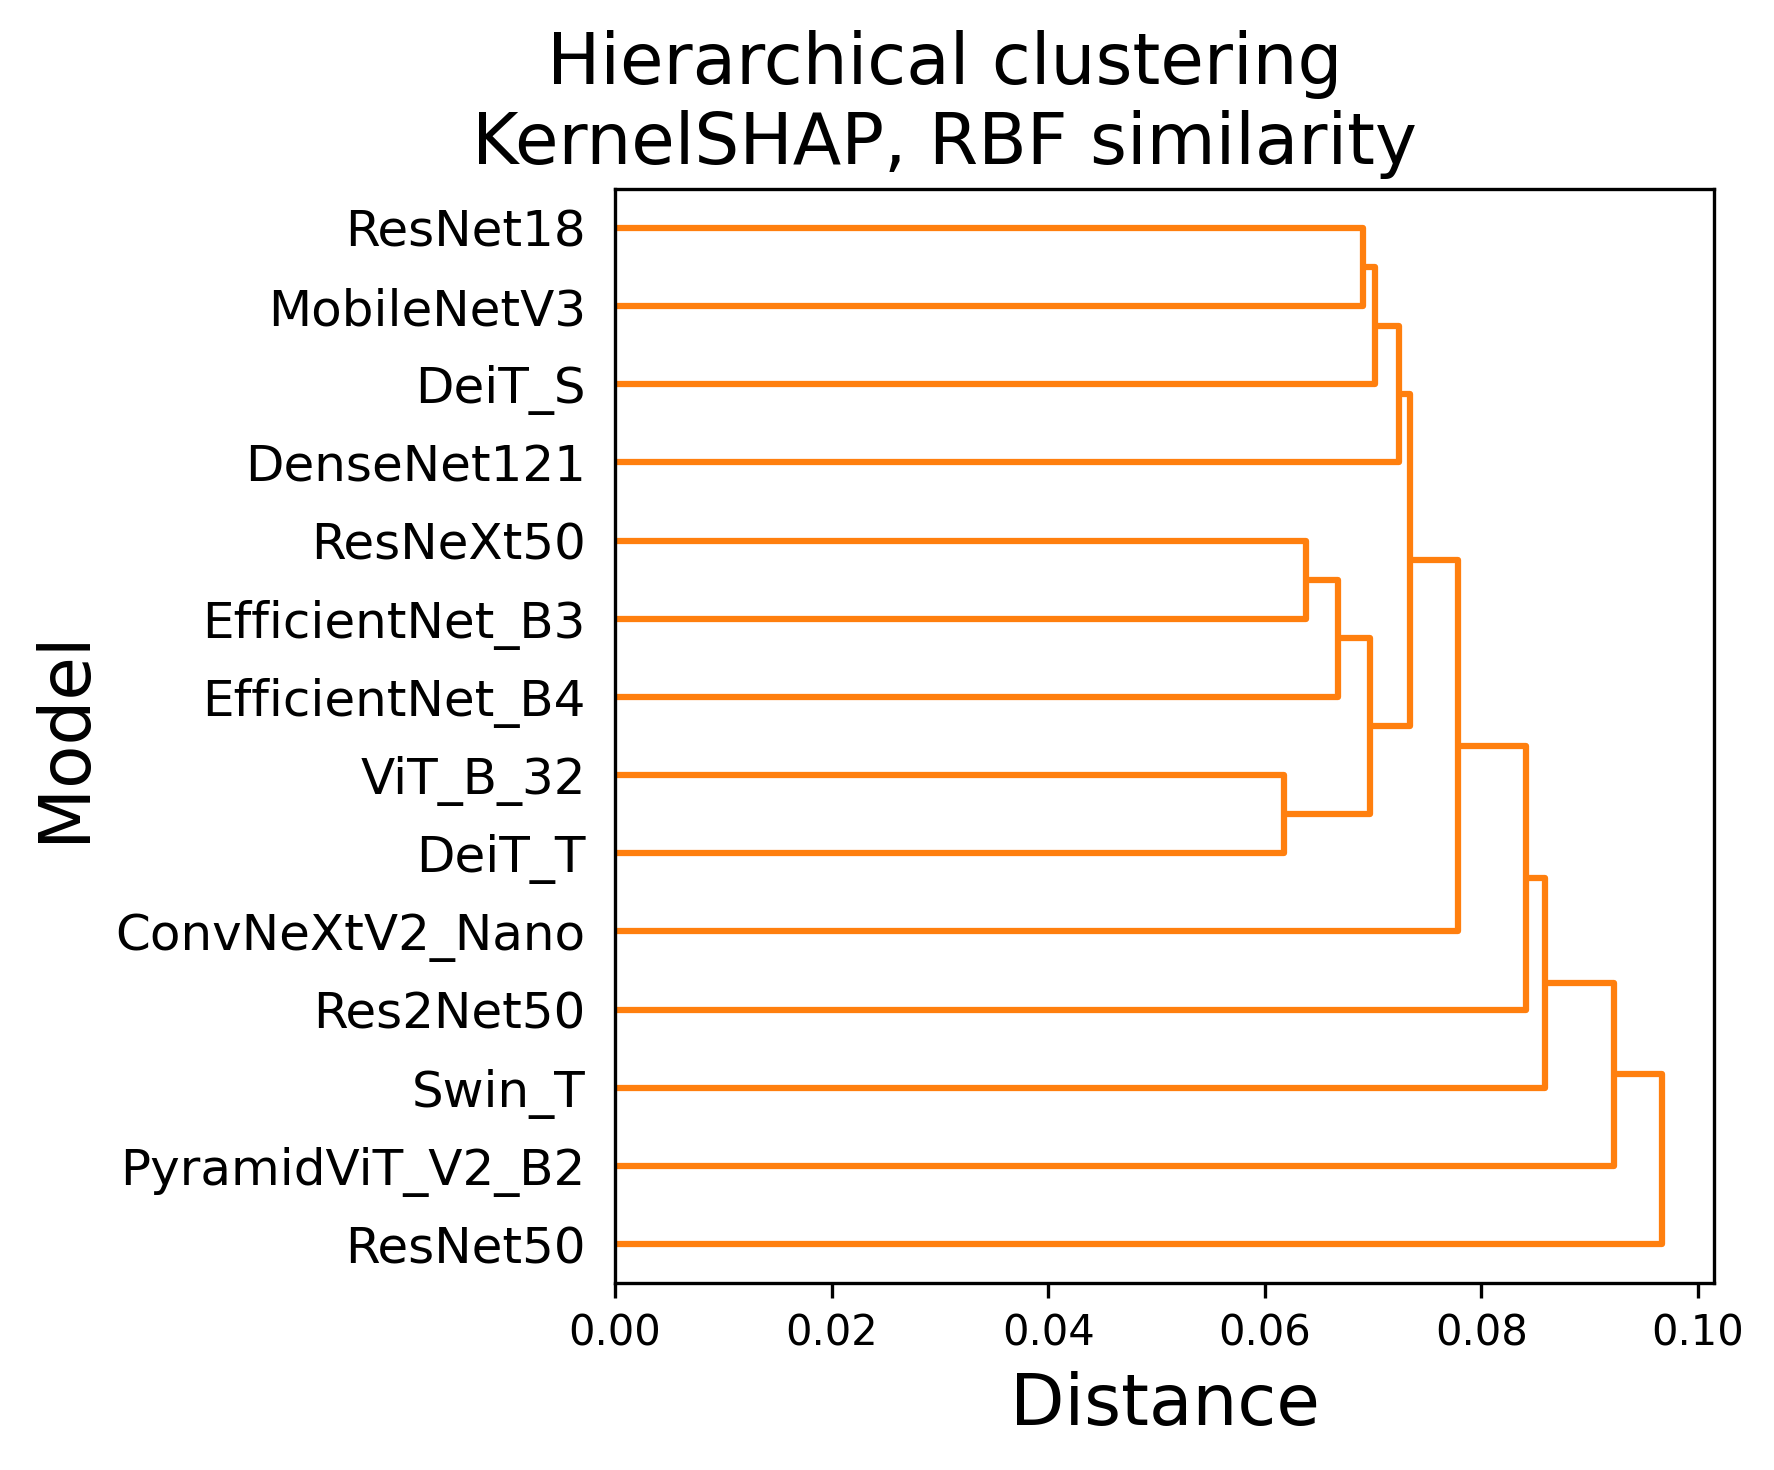

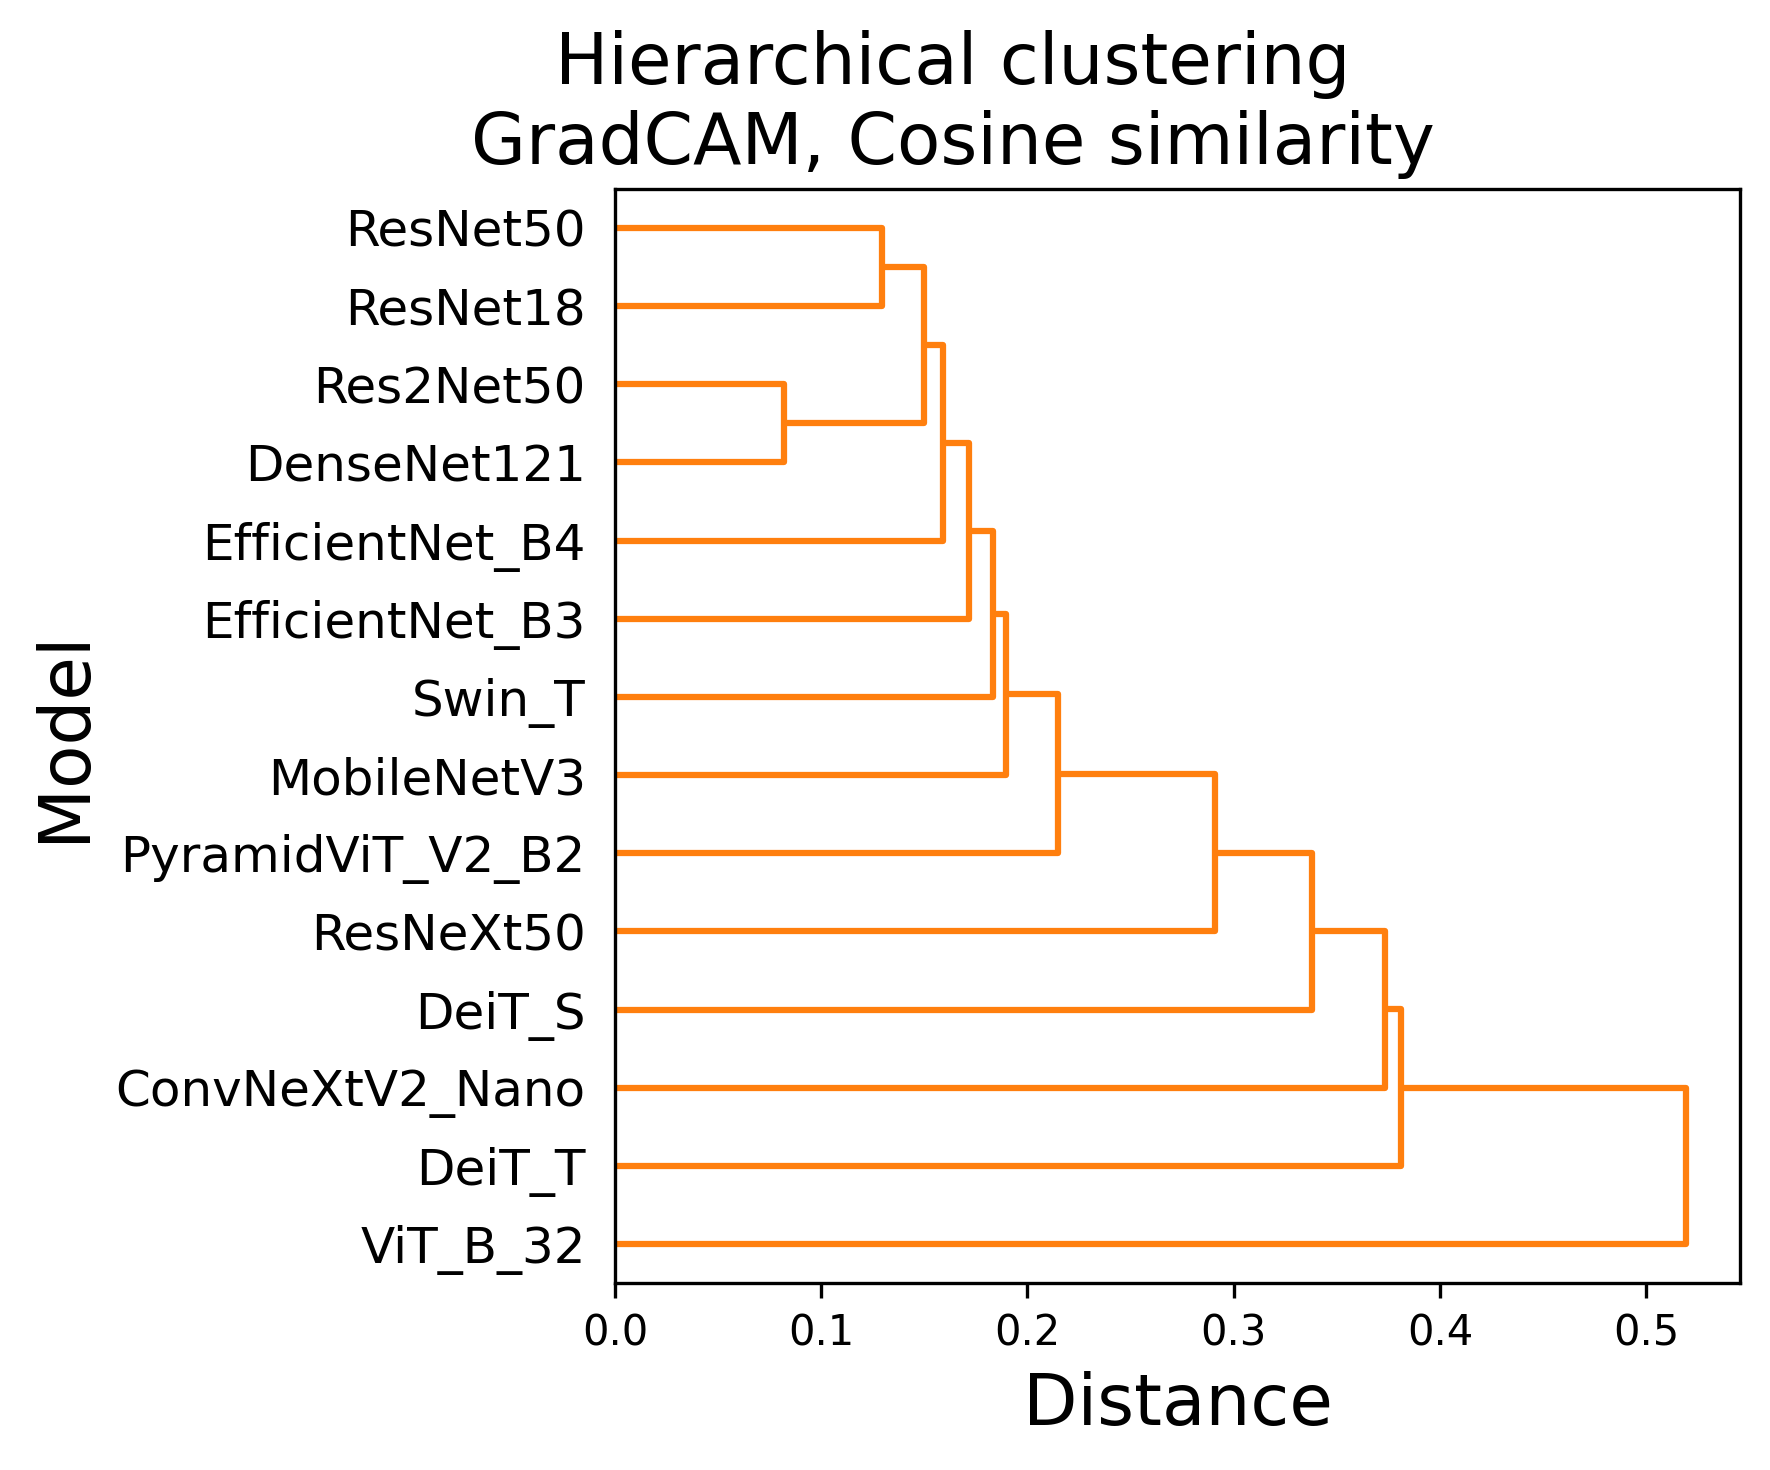

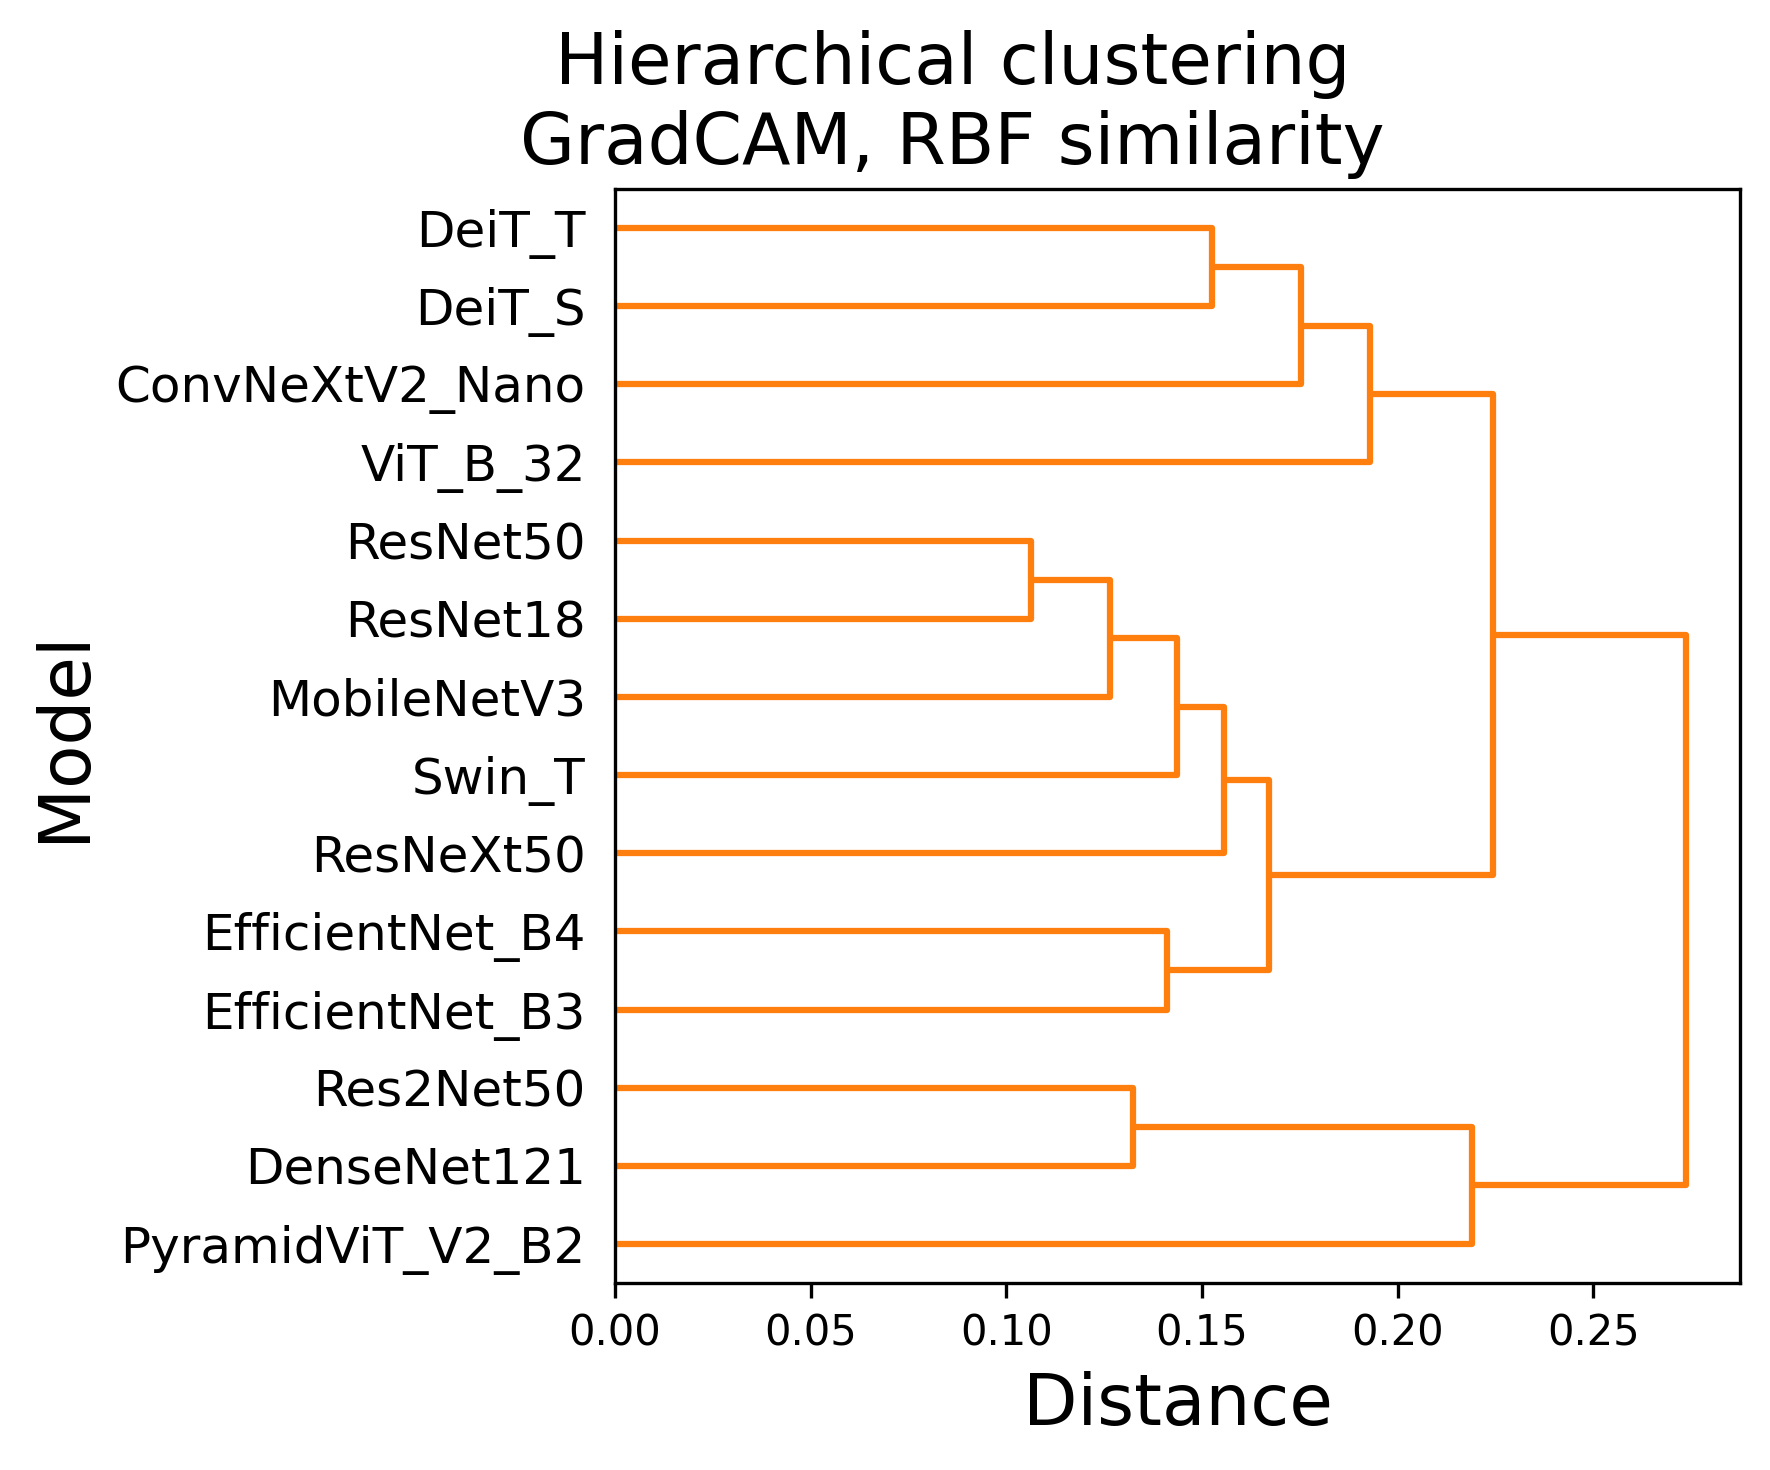

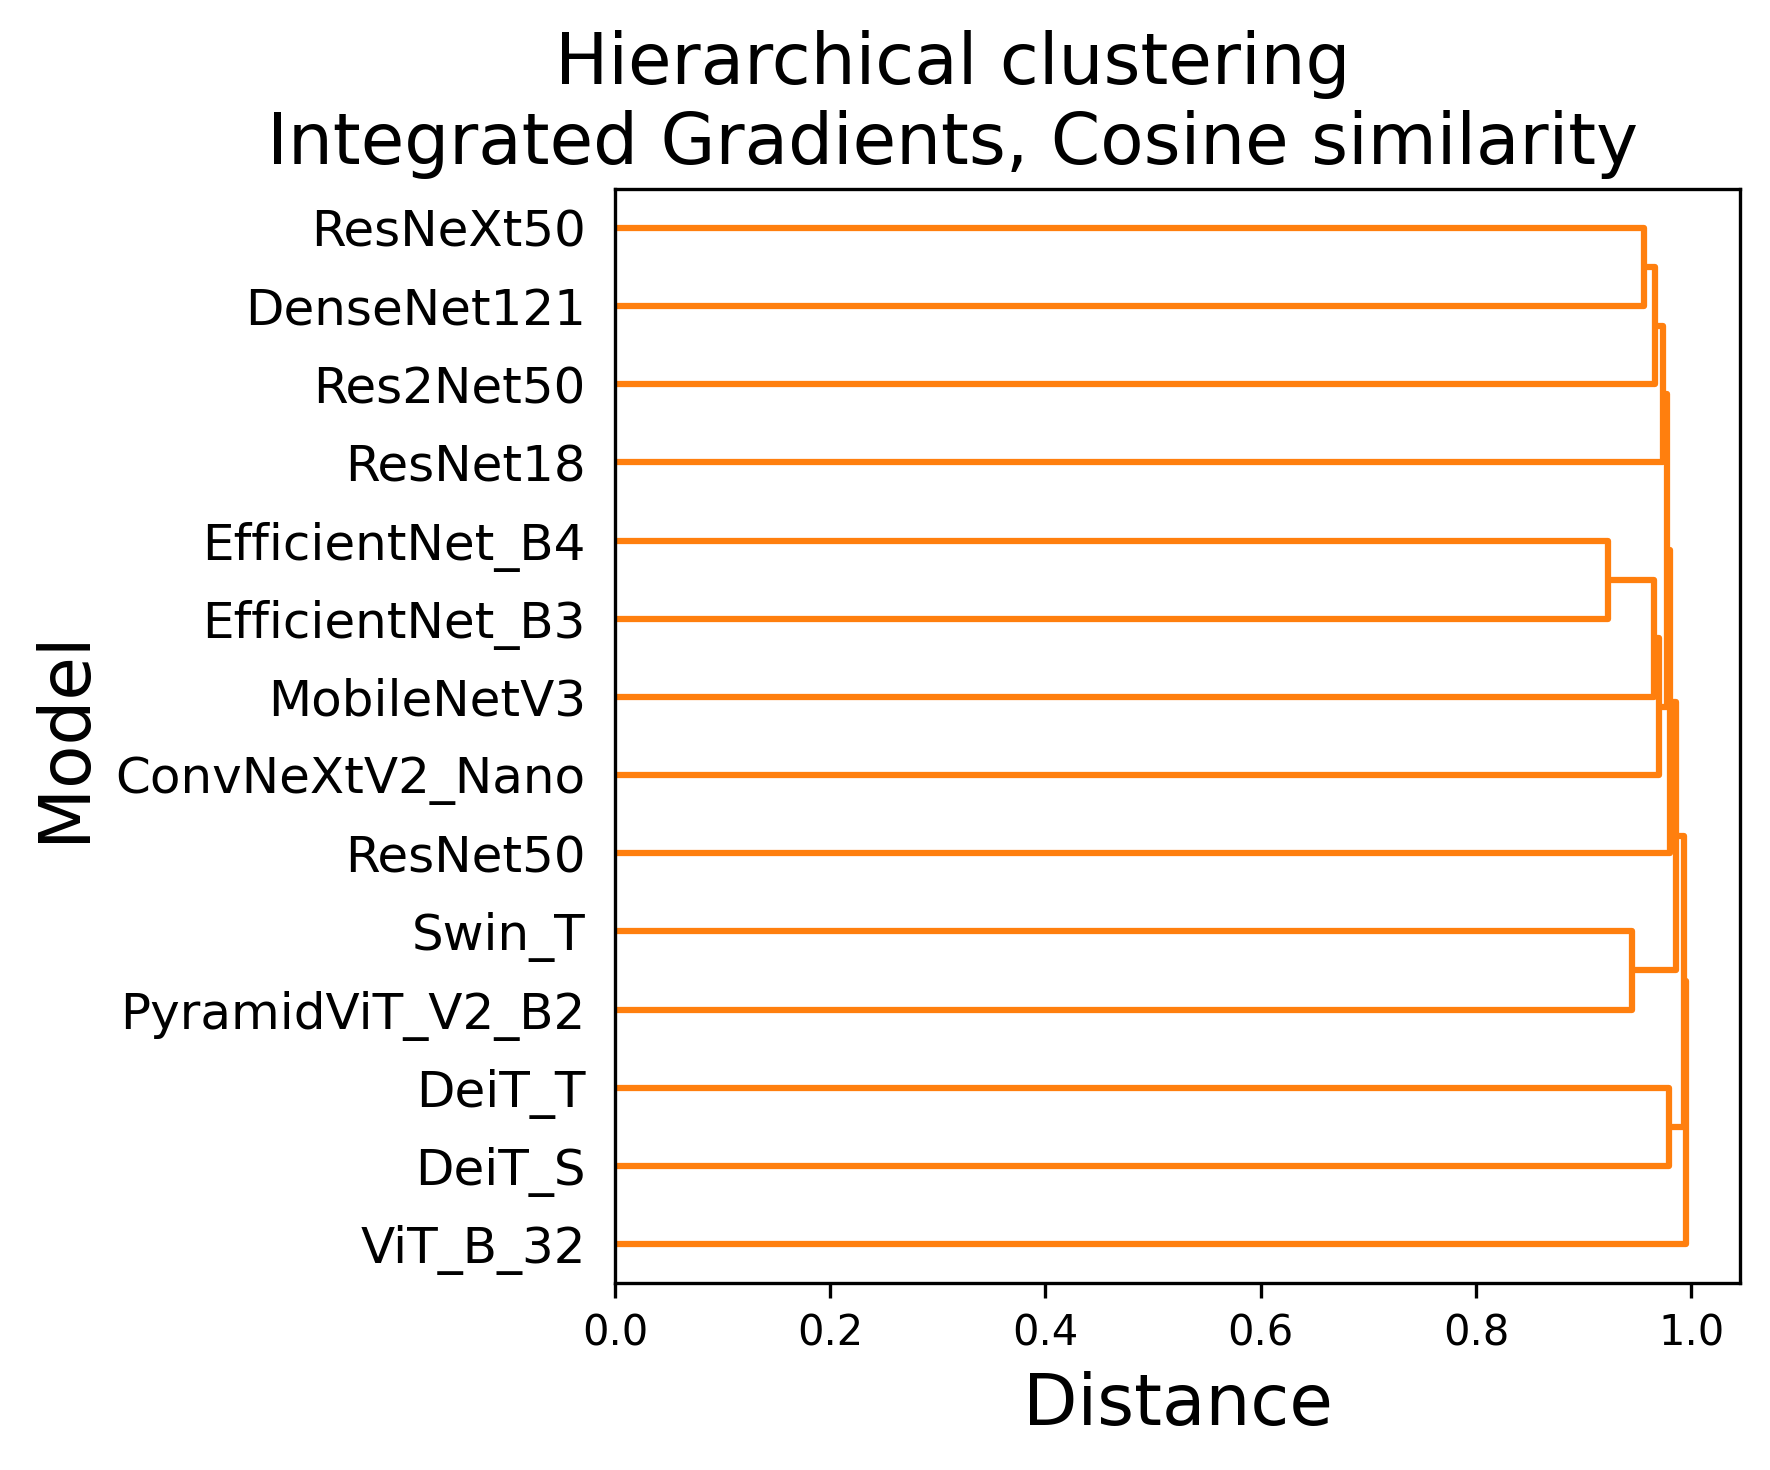

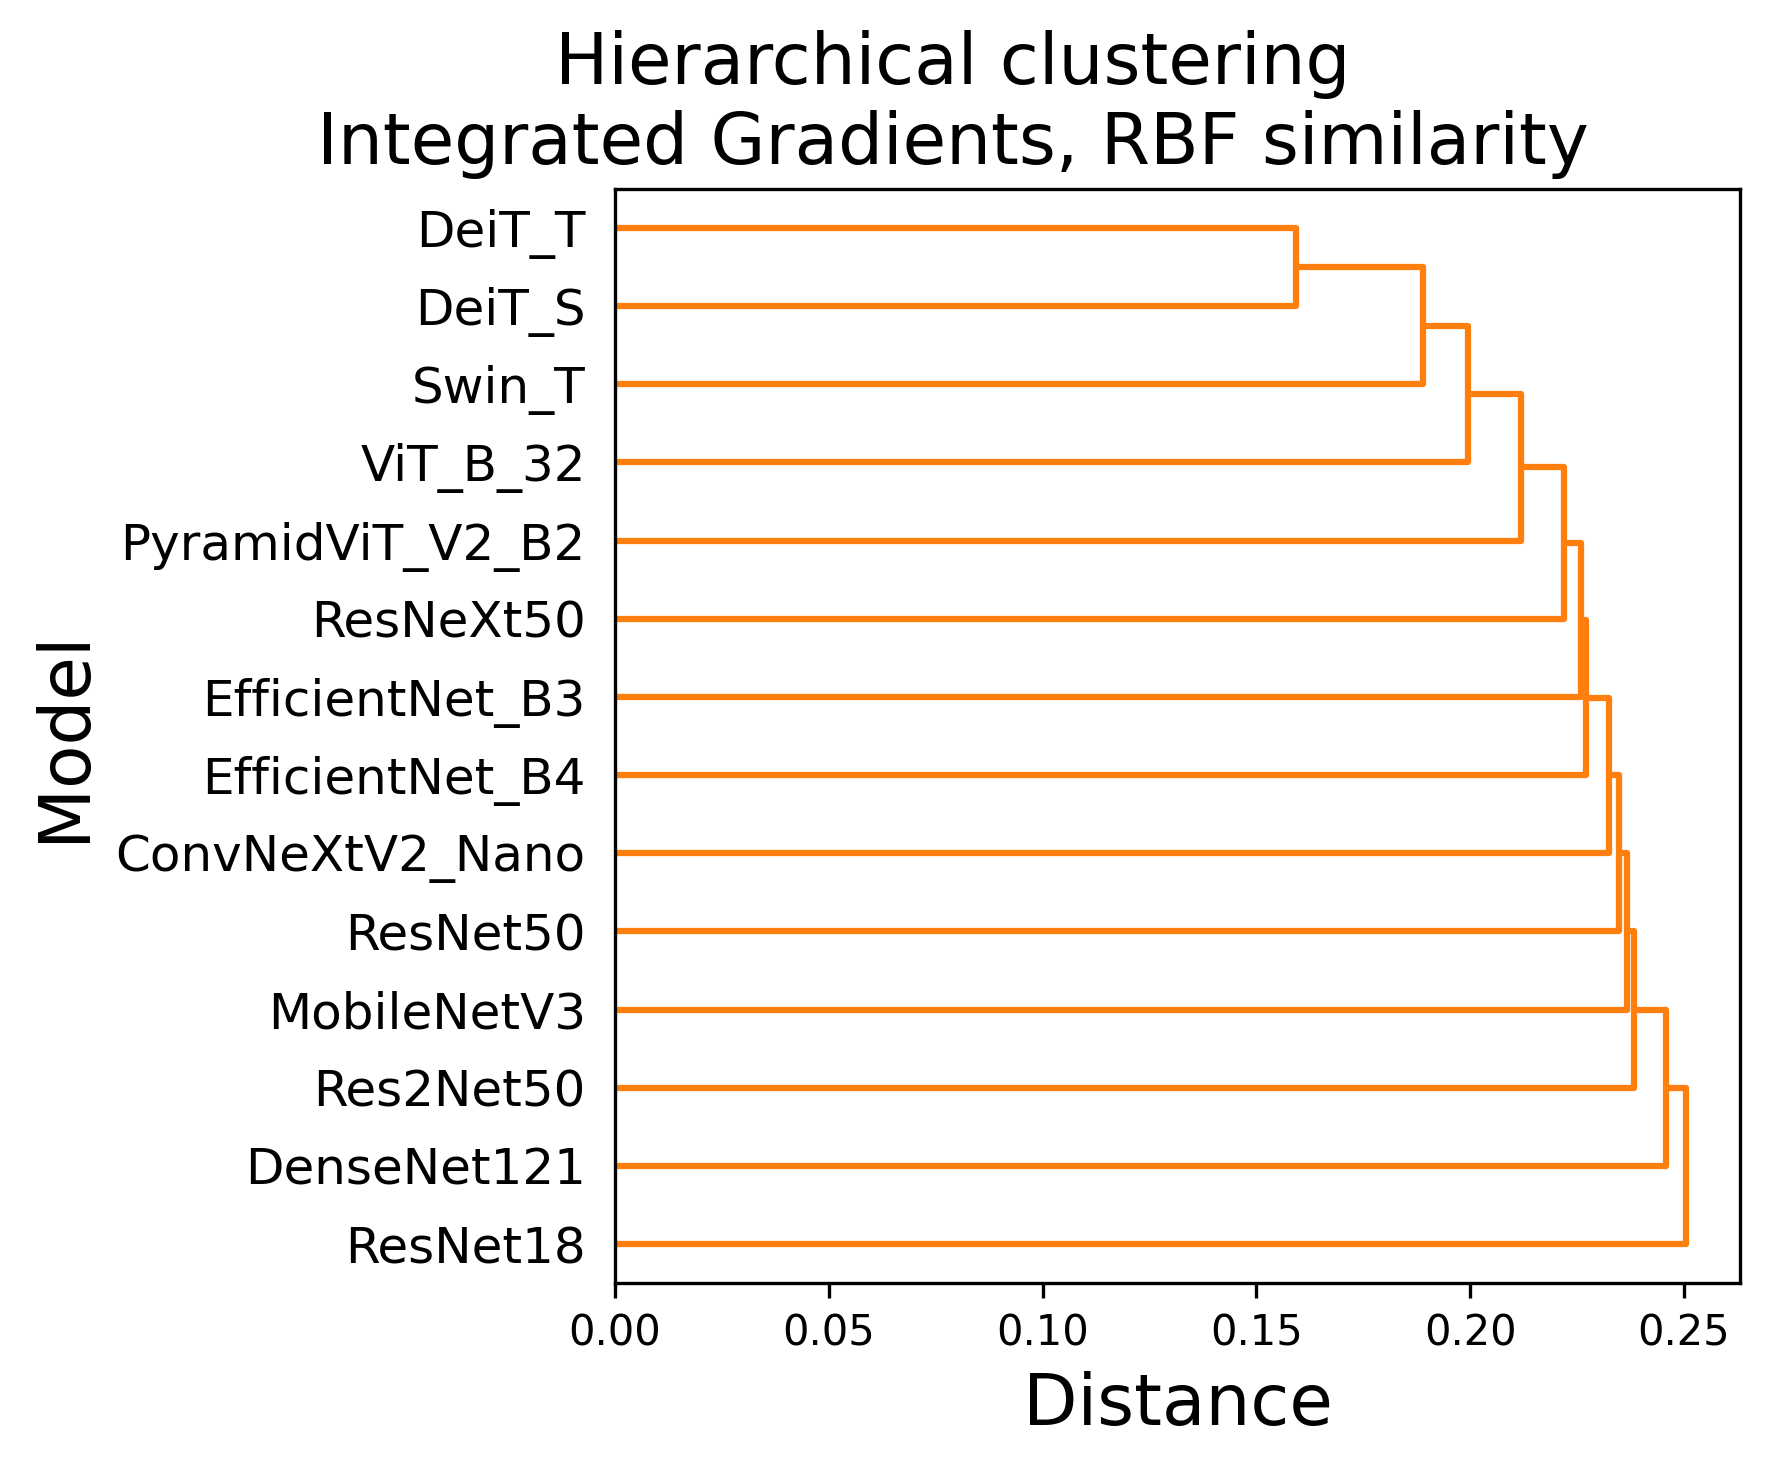

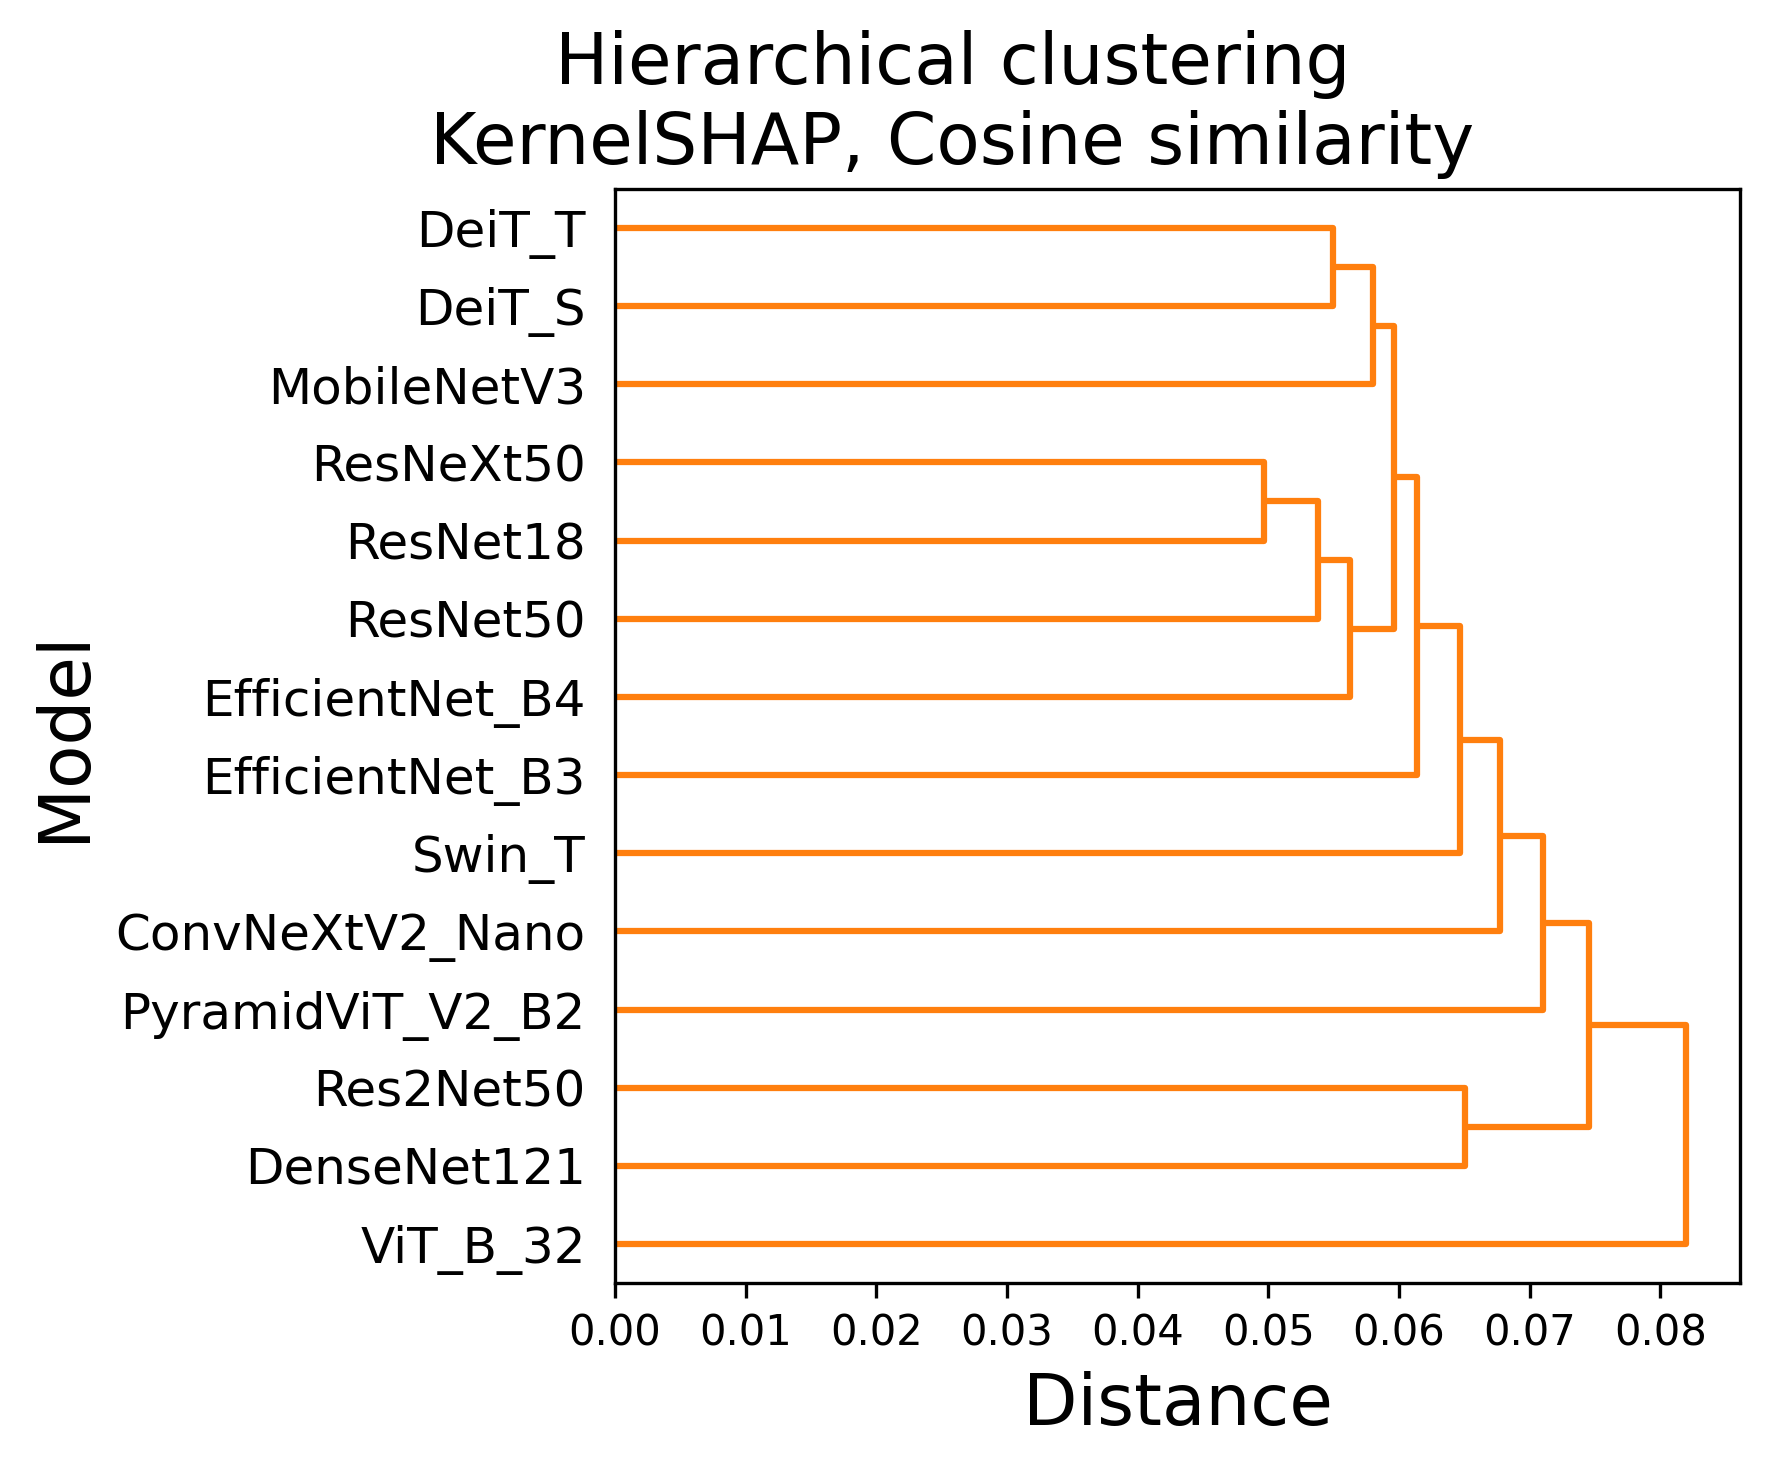

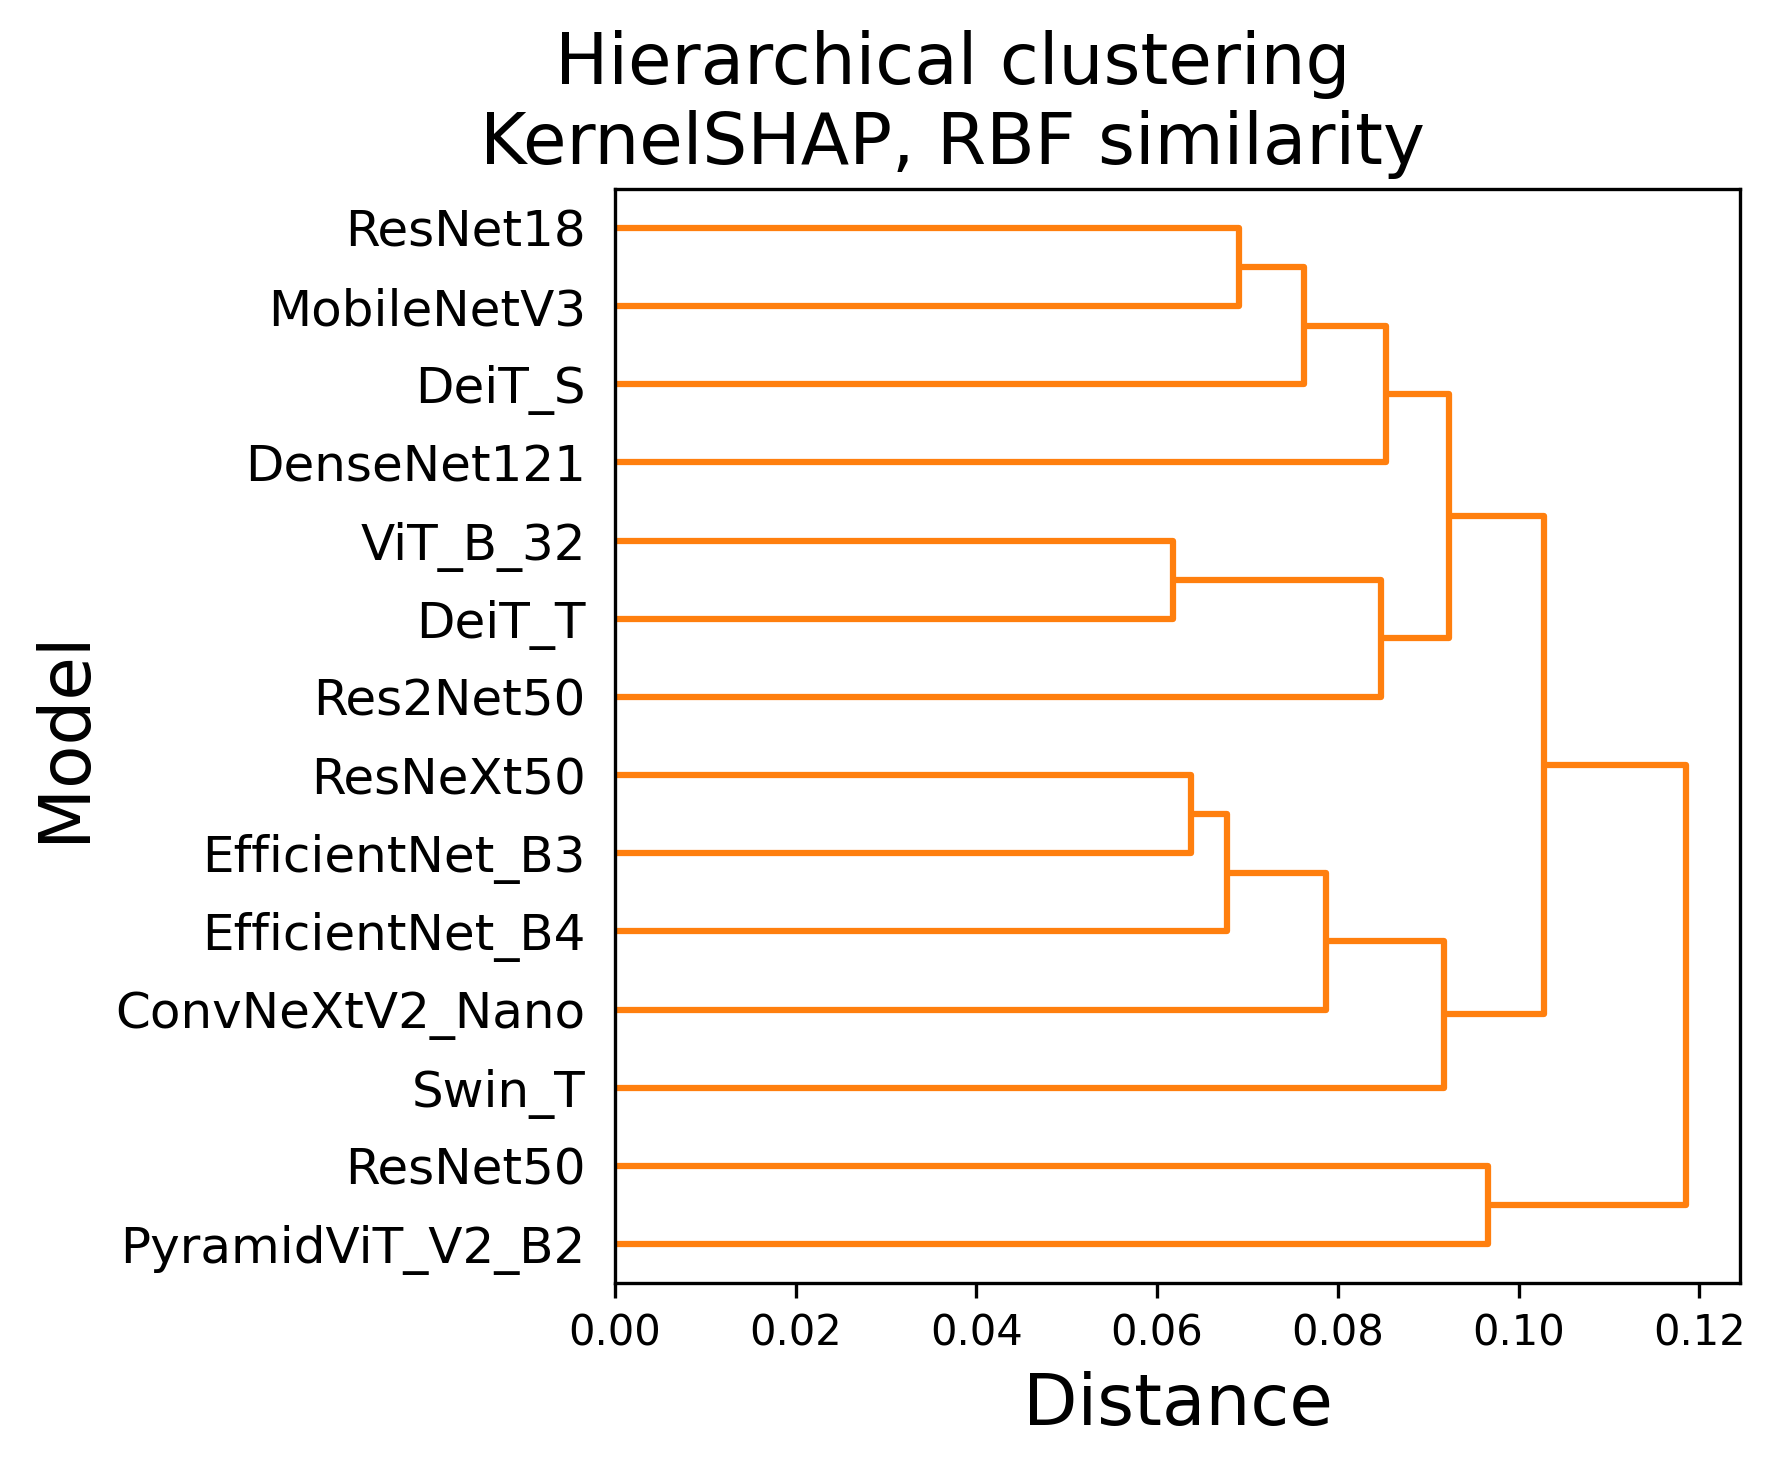

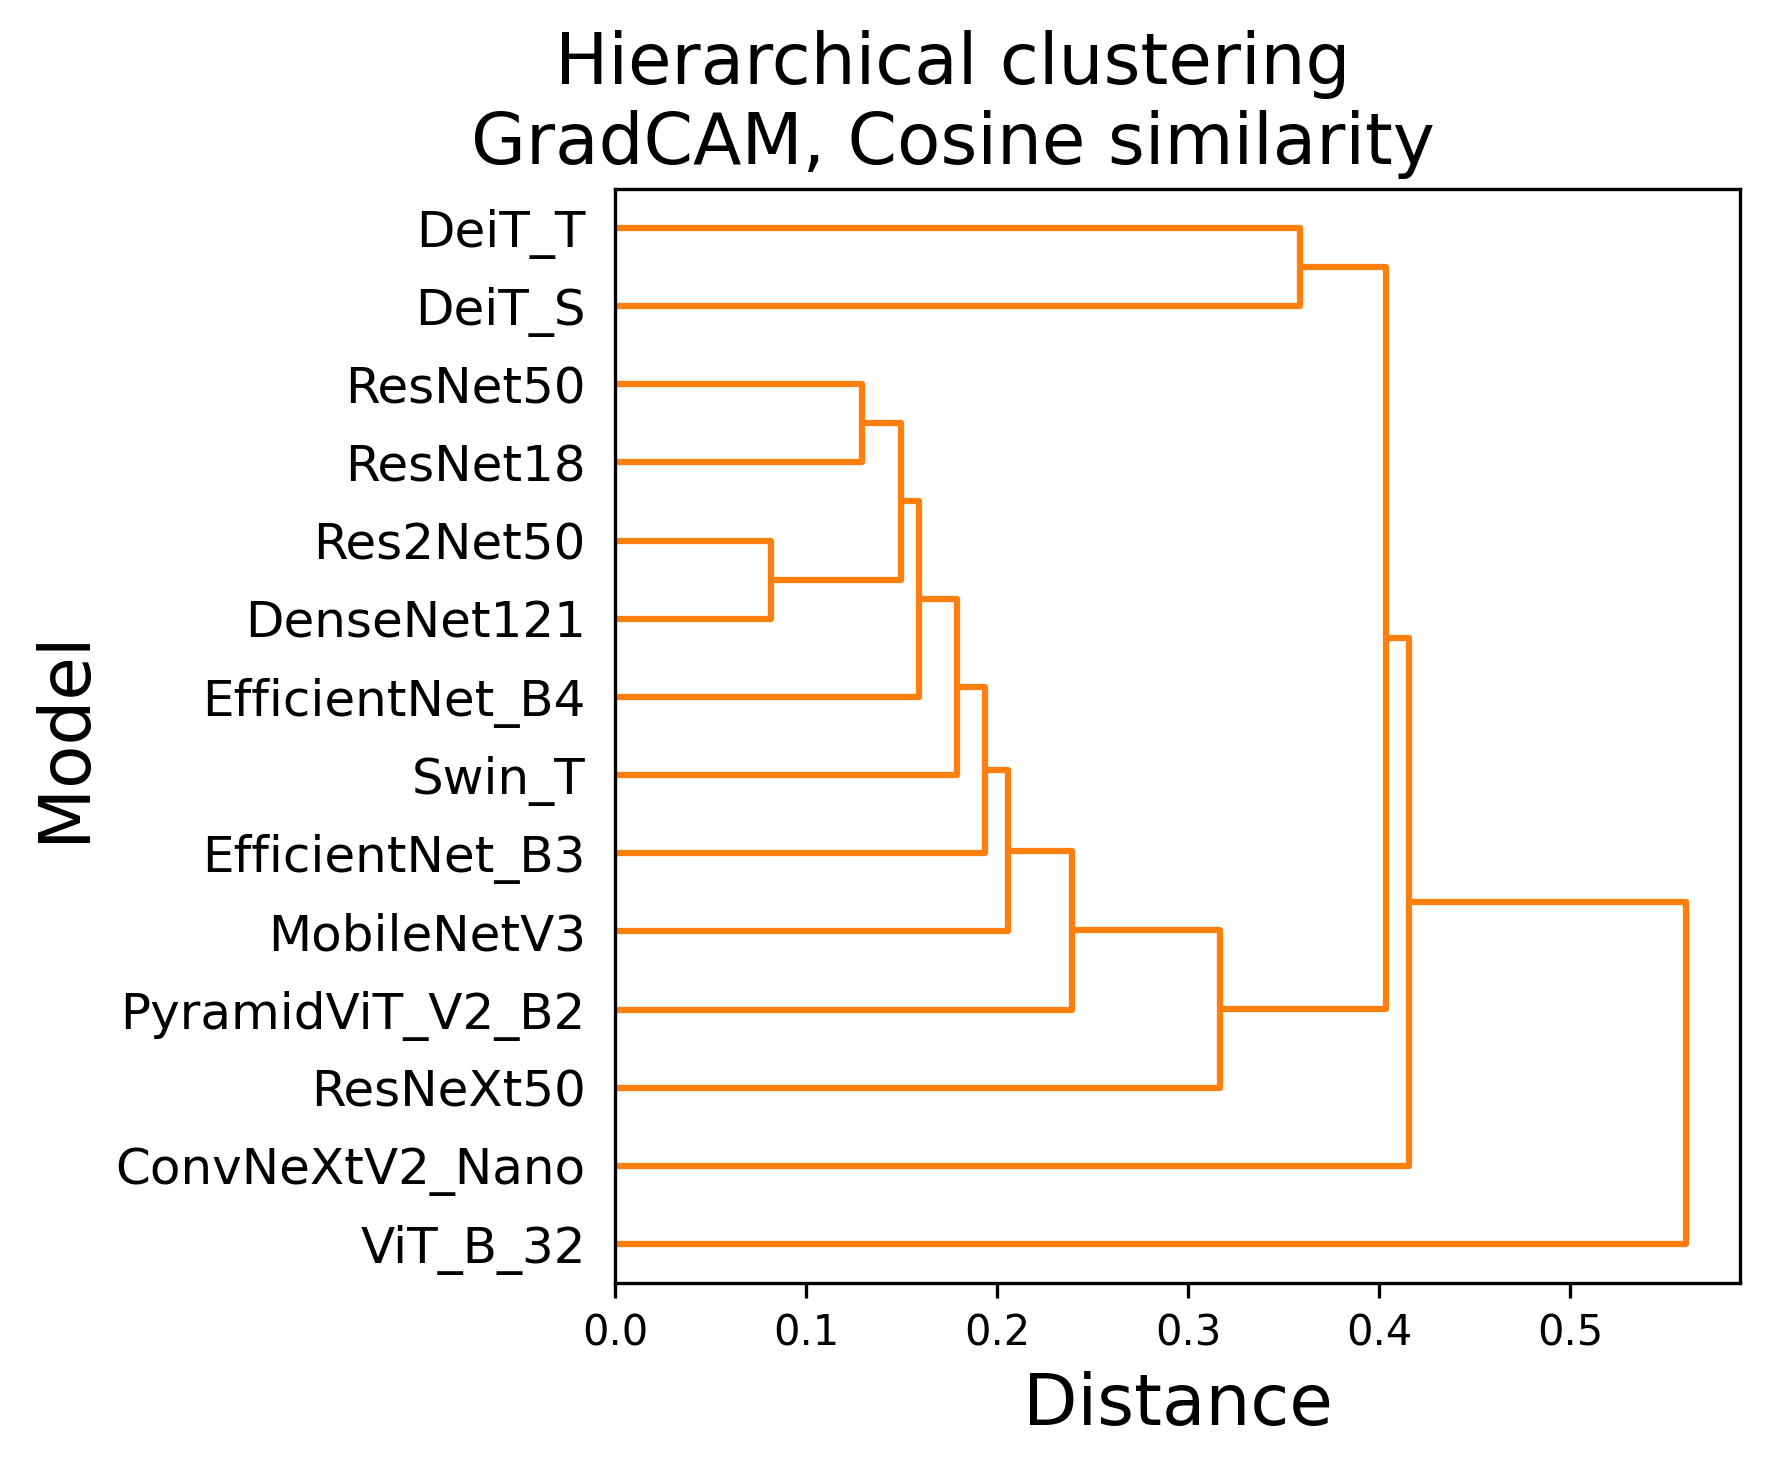

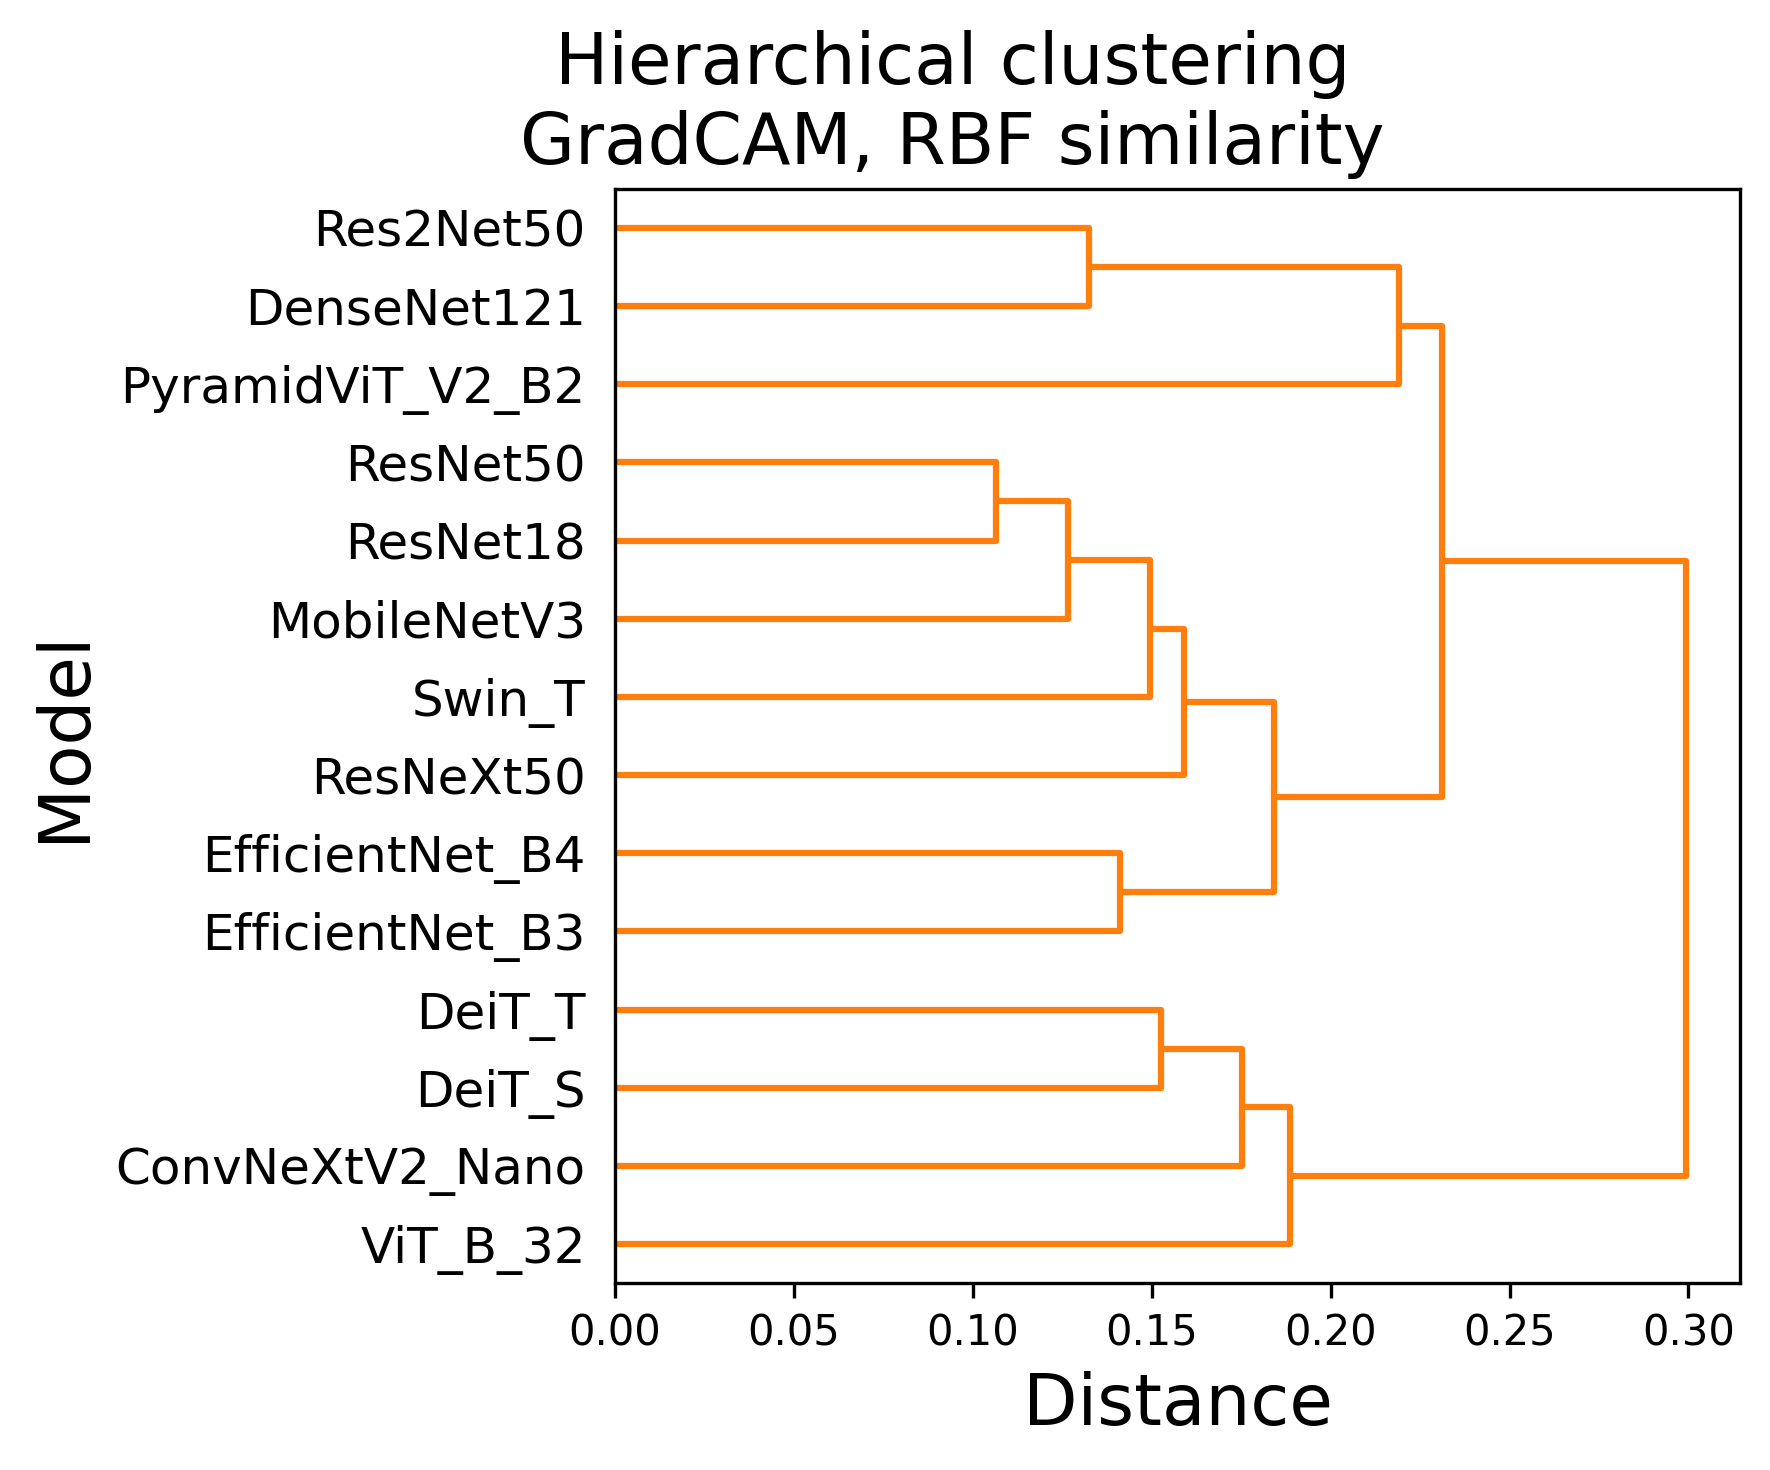

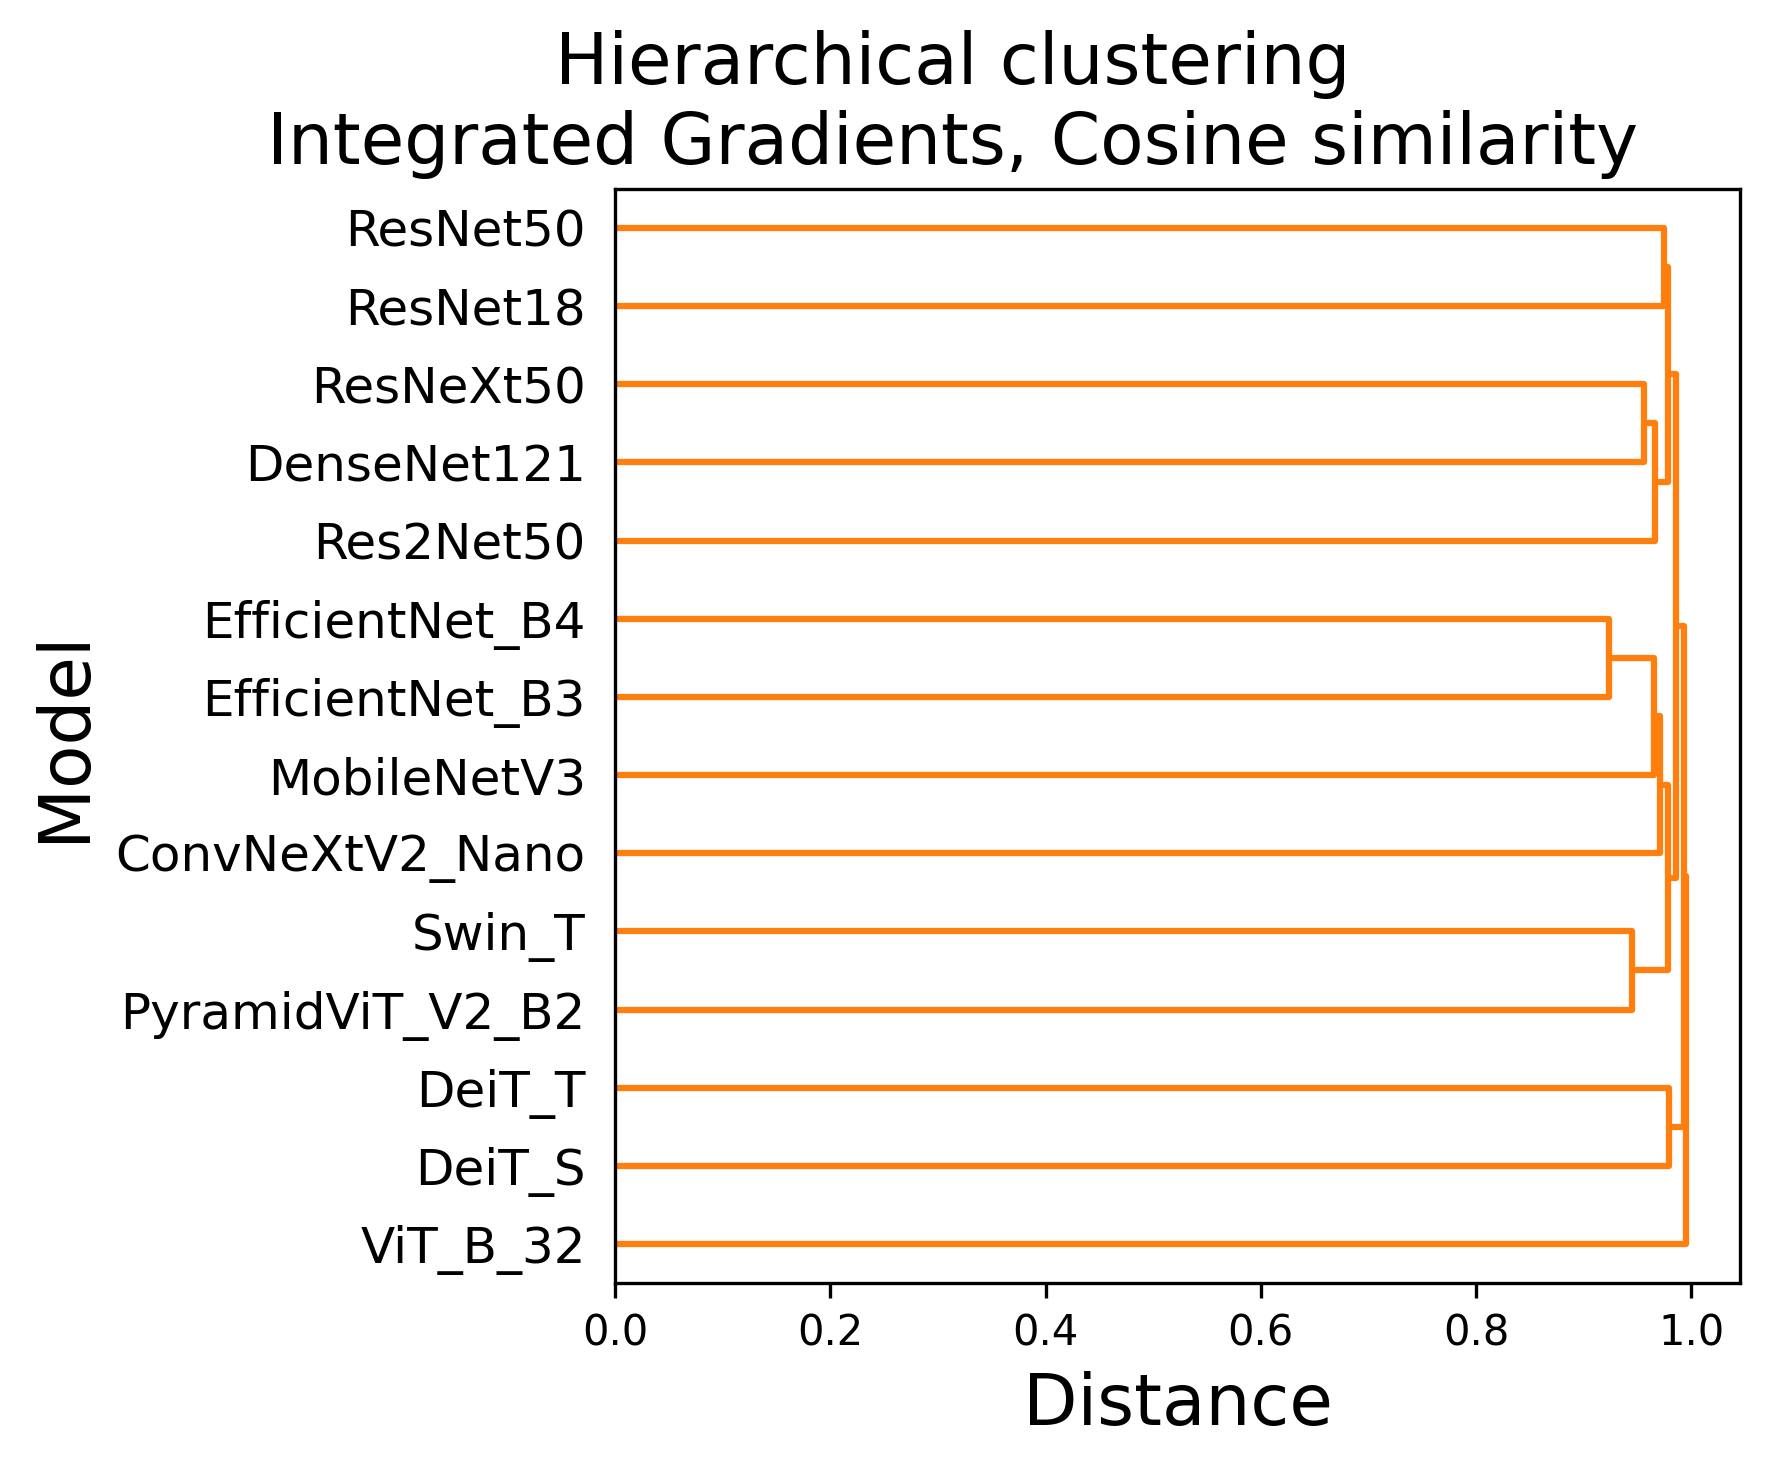

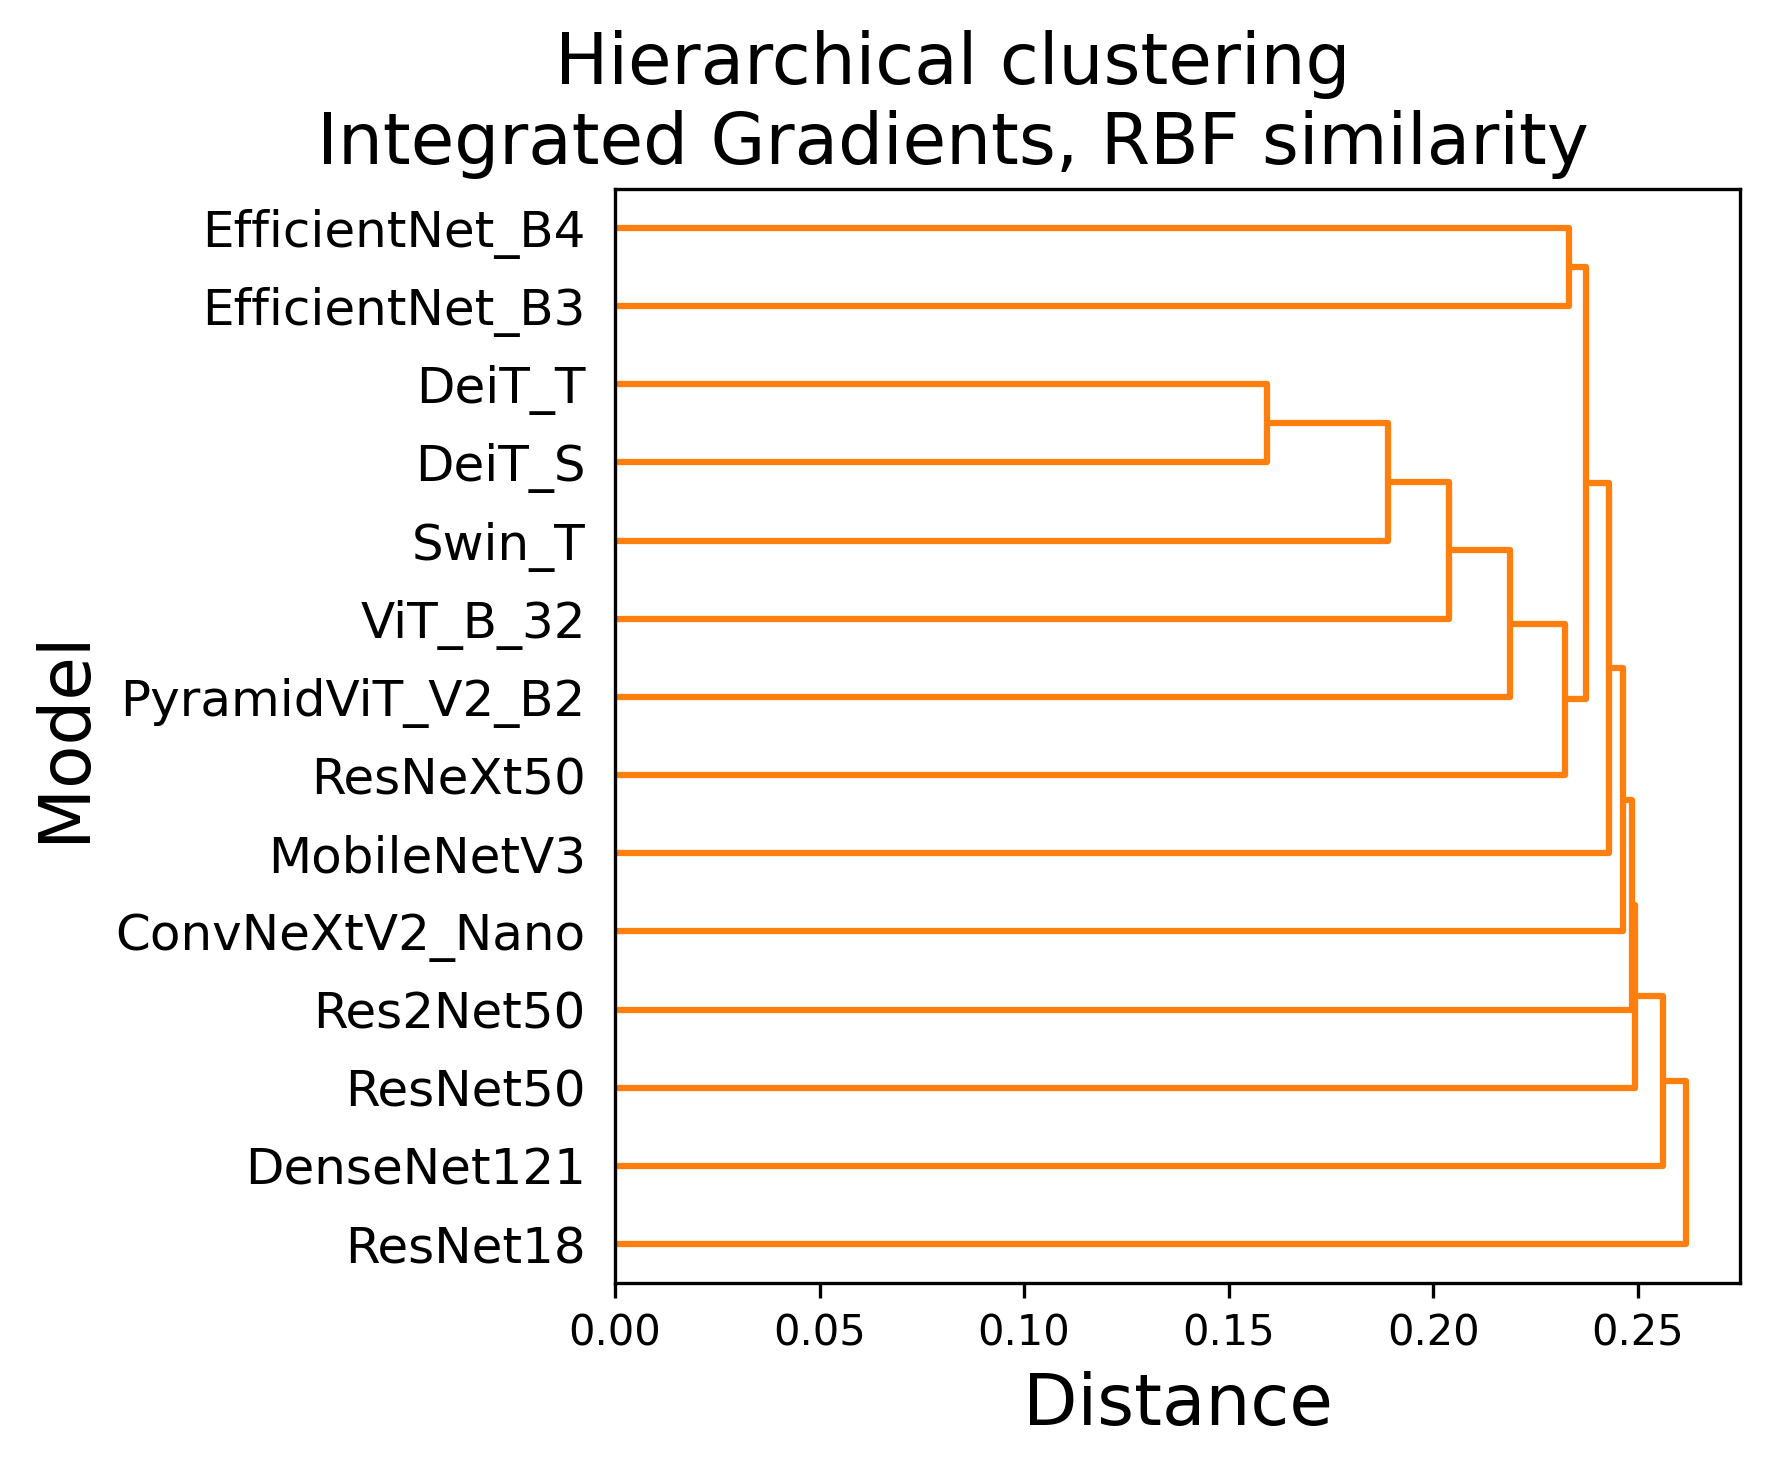

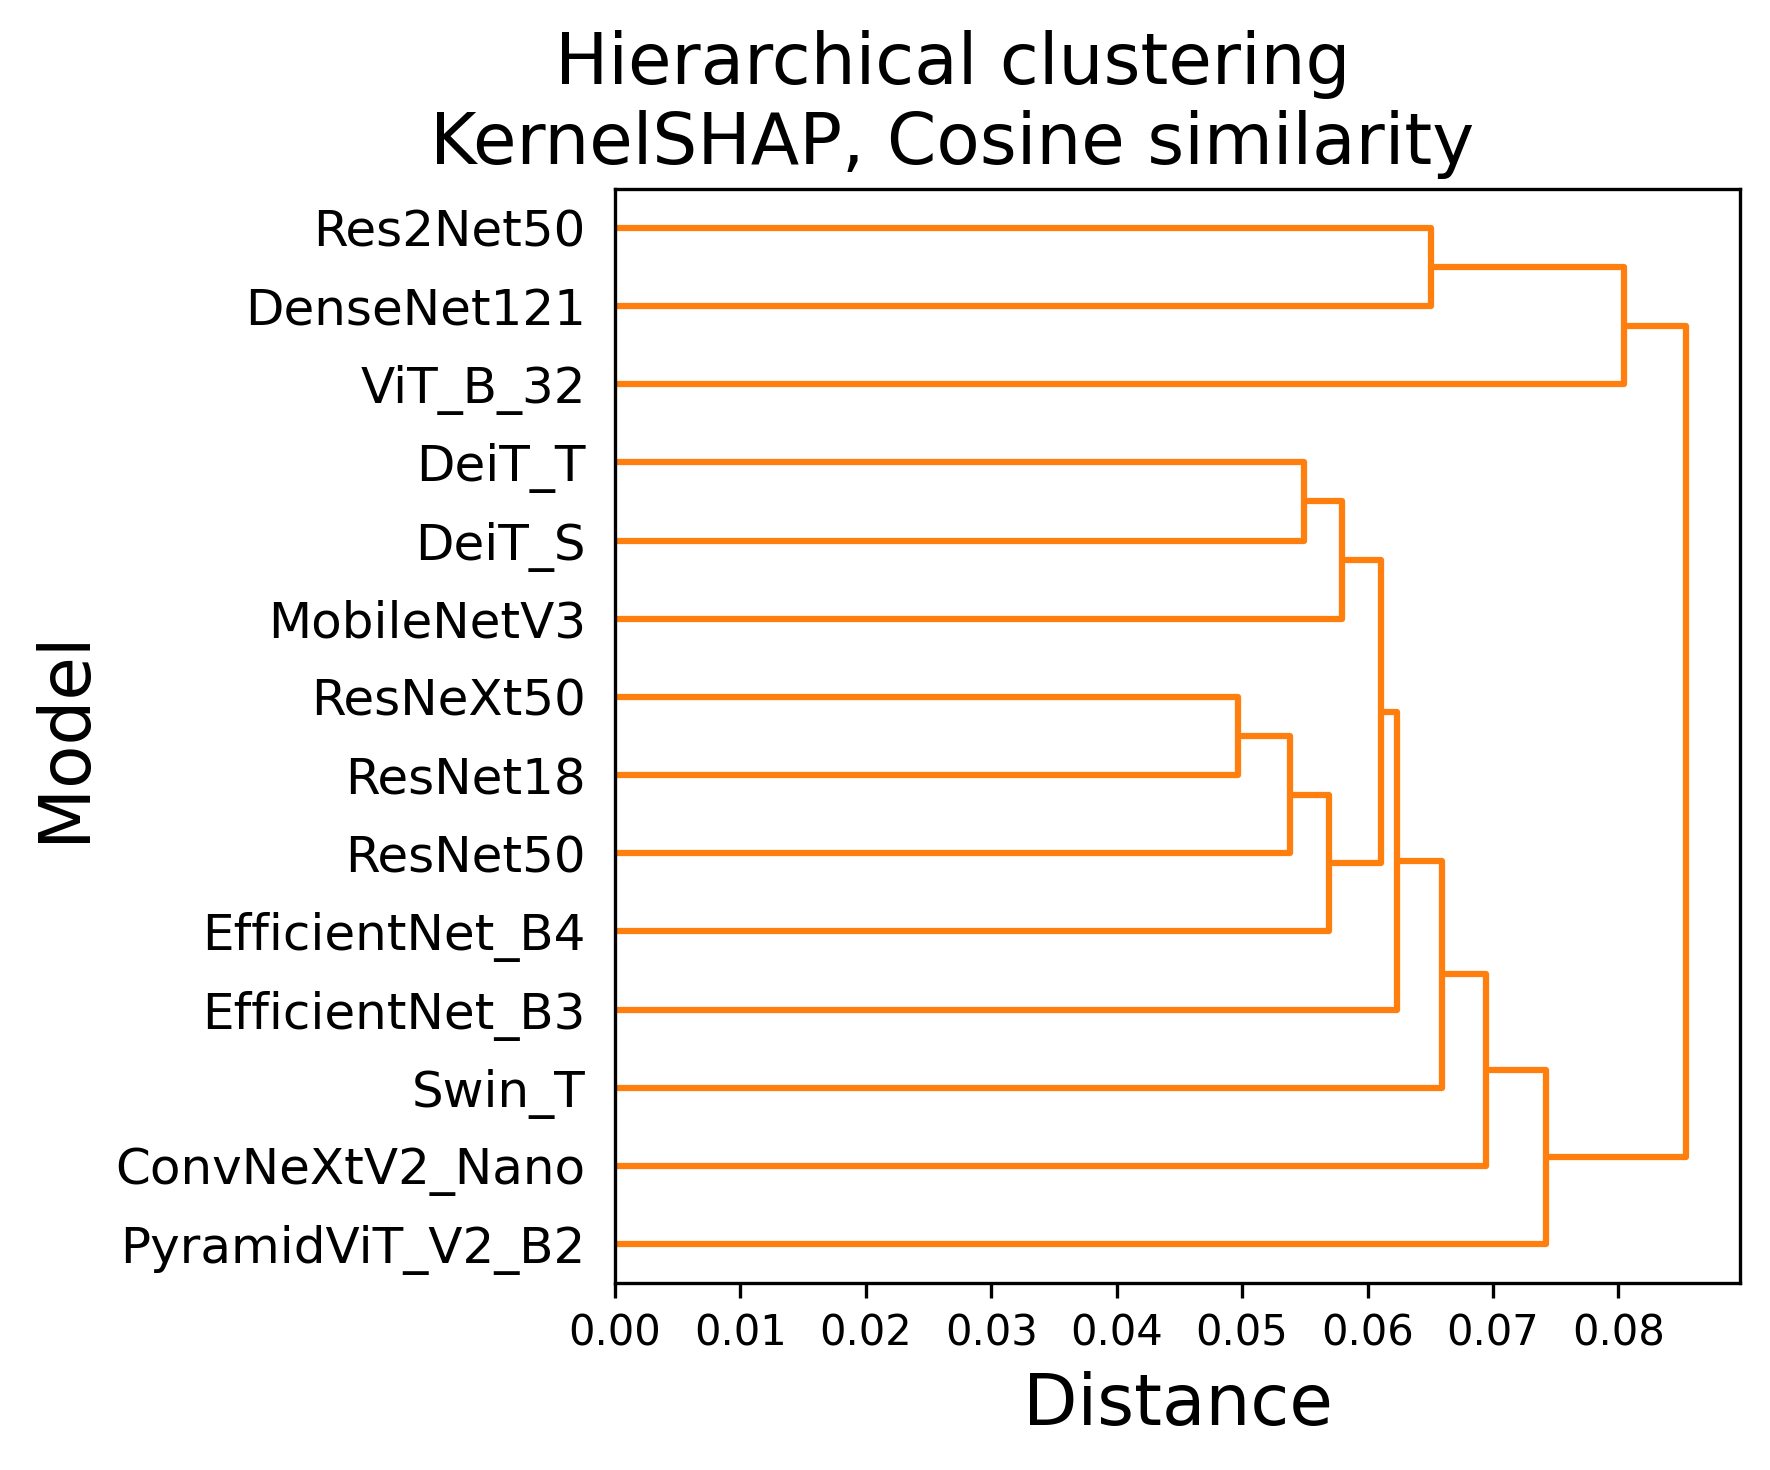

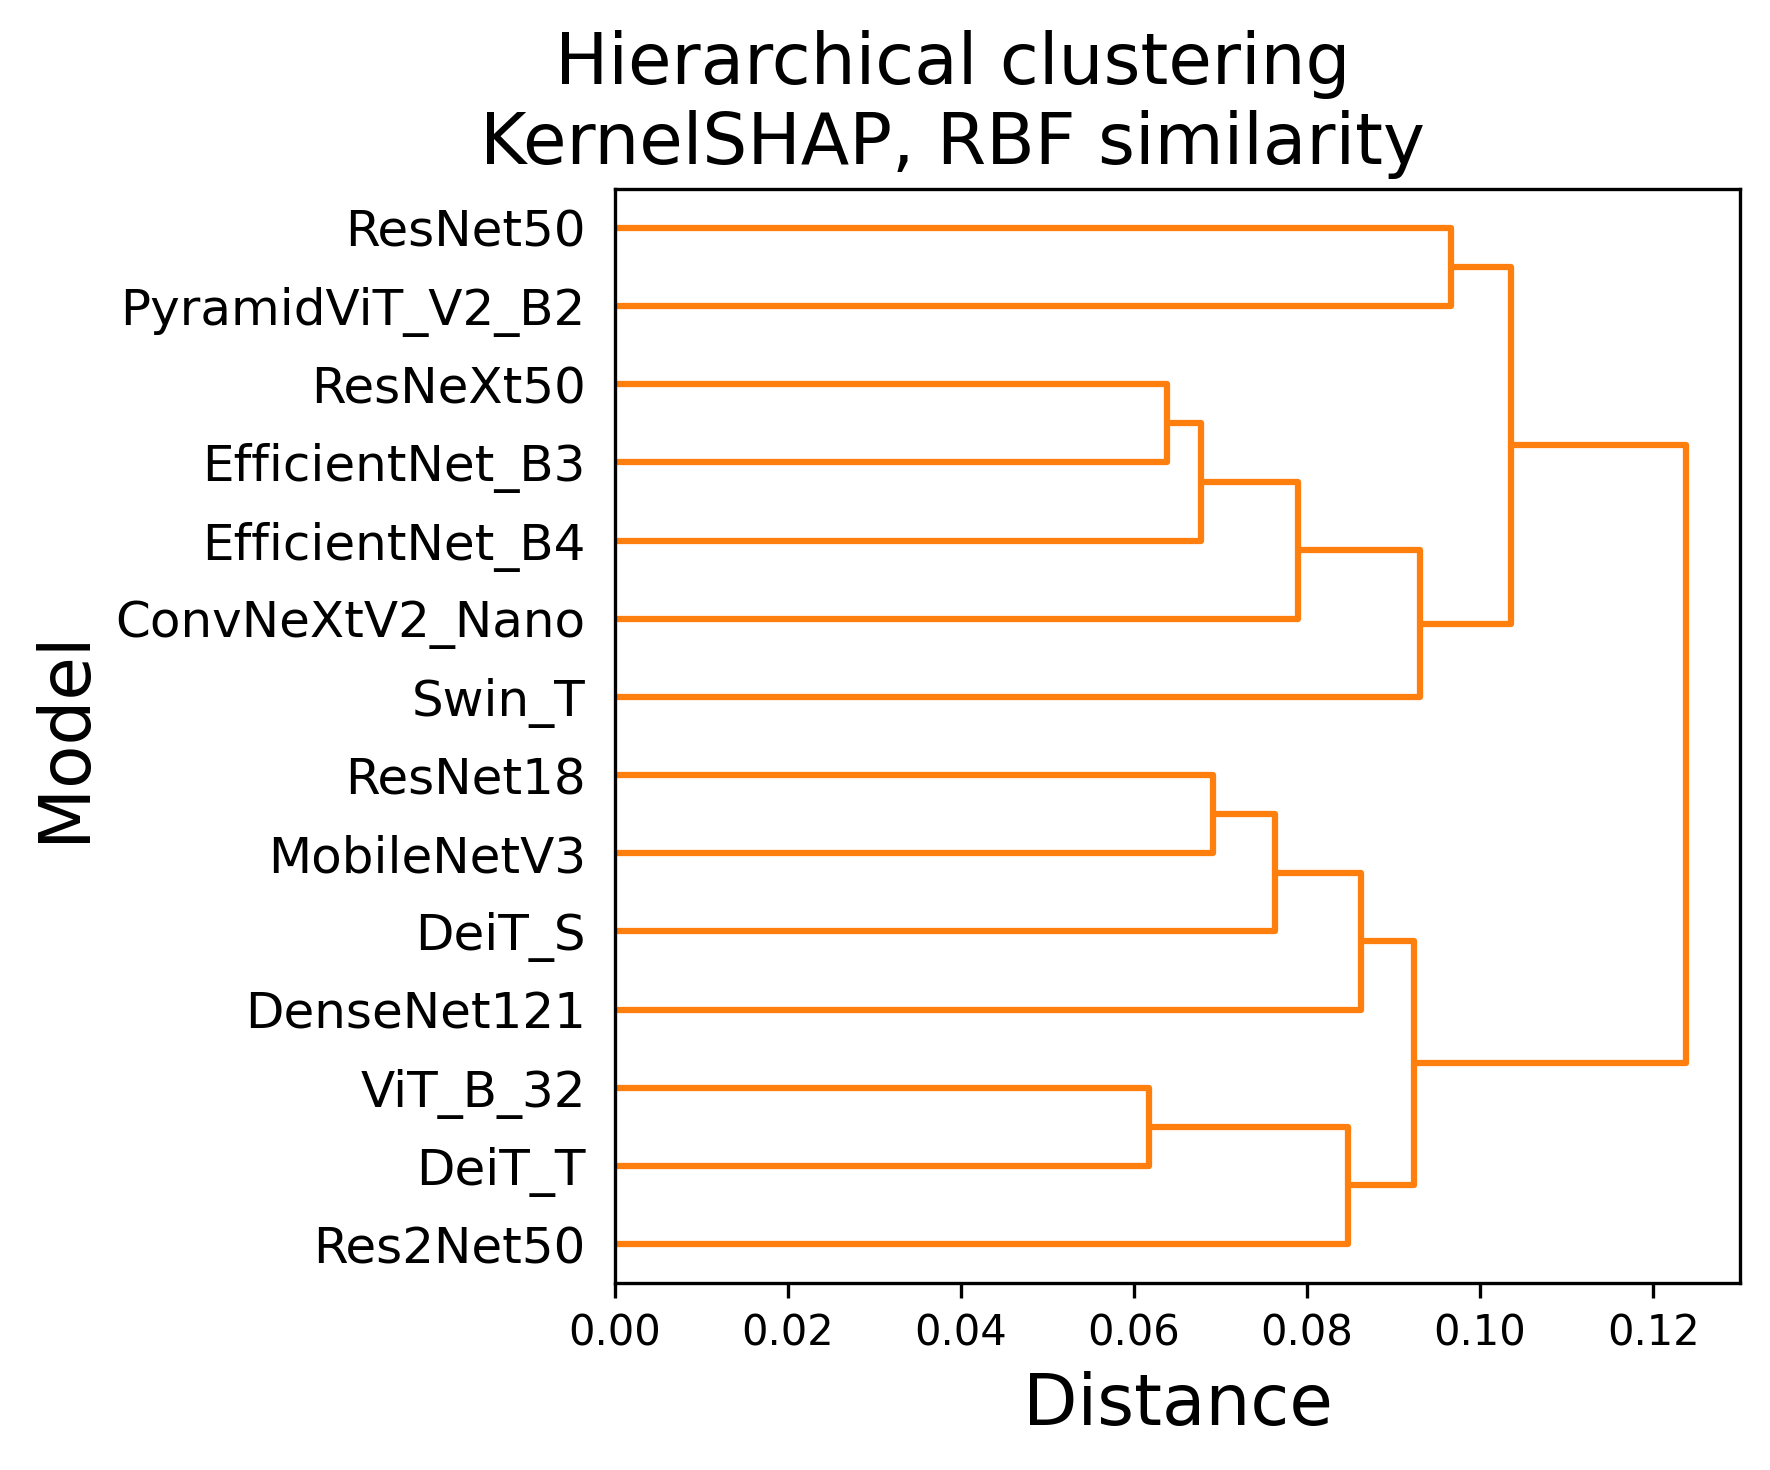

In [43]:
explanation_name_mapping = {
    'integratedgradients': 'Integrated Gradients',
    'gradcam': 'GradCAM',
    'kernelshap': 'KernelSHAP',
}
similarity_name_mapping = {
    'cosine': 'Cosine similarity',
    'rbf': 'RBF similarity',
}

methods = ['complete', 'single', 'average', 'weighted']

for method in methods:
    for csv_name in similarity_matriced_csvs:
        splitted = csv_name.split('_')
        explanation_method, similarity_metric = splitted[2], splitted[3].split('.')[0]
        title = f"Hierarchical clustering\n{explanation_name_mapping[explanation_method]}, {similarity_name_mapping[similarity_metric]}"
        if "only_matching" in csv_name:
            title += ", only matching predictions"
            output_filename = f'dendrogram_hierarchical_{method}_{explanation_method}_{similarity_metric}_only_matching.png'
        else:
            output_filename = f'dendrogram_hierarchical_{method}_{explanation_method}_{similarity_metric}_all.png'

        # loaded as dissimilarity, so we invert it to similarity by substracting it from 1
        df = 1-pd.read_csv("../20240620-gradcam-kernelshap-ig-128/" + csv_name, index_col=0)
        np.fill_diagonal(df.values, 1)
        Z, clusters = hierarchical_clustering(df, title=title, output_filename=output_filename, method=method,
                                            color_threshold=2) # 2 makes all same color